In [2]:
# Importamos librerias necesarias
import charset_normalizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install missingno
import missingno as msno # Esta sirve para verificar valores faltantes / nulls
from itertools import combinations # Sirve para generar todas las combinaciones posibles sin repeticion de un conjunto de elementos
import re

# Comprobar encoding de los dataset
with open('athletes.csv', 'rb') as rawdata:
    rawdata1 = charset_normalizer.detect(rawdata.read(10000))
print(rawdata1) # {'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}

with open('olympic_games_results.csv', 'rb') as rawdata:
    rawdata2 = charset_normalizer.detect(rawdata.read(10000))
print(rawdata2) # {'encoding': 'utf-8', 'language': 'French', 'confidence': 1.0}



{'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}
{'encoding': 'utf-8', 'language': 'French', 'confidence': 1.0}


In [3]:
# Cargamos las dos bases de datos en dataframes
athletes_df = pd.read_csv('athletes.csv', encoding='utf-8')
olympic_df = pd.read_csv('olympic_games_results.csv', encoding='utf-8')

athletes_df.shape # shape nos devuelve info sobre el nº de filas y columnas

(145500, 10)

In [4]:
olympic_df.shape 

(308408, 11)

In [5]:
# IMPORTANTE - Unimos ambas bases de datos en un solo dataframe

merged_df = pd.merge(olympic_df, athletes_df, on='athlete_id', how='inner')
merged_df.sample(10) # sample nos devuelve X registro del dataframe al azar

year    type               discipline  \
284045  2014.0  Summer      Swimming (Aquatics)   
46435   1992.0  Summer      Football (Football)   
307855  2022.0  Winter  Speed Skating (Skating)   
112215  1952.0  Summer      Swimming (Aquatics)   
261705  2012.0  Summer                 Shooting   
81224   1952.0  Summer                   Rowing   
185823  2004.0  Summer                Athletics   
16365   1972.0  Summer  Canoe Sprint (Canoeing)   
212714  1972.0  Winter     Ski Jumping (Skiing)   
9017    1980.0  Summer  Basketball (Basketball)   

                                                    event  \
284045                   200 metres Freestyle, Boys (YOG)   
46435                             Football, Men (Olympic)   
307855                        500 metres, Women (Olympic)   
112215      4 × 200 metres Freestyle Relay, Men (Olympic)   
261705  Small-Bore Rifle, Prone, 50 metres, Men (Olympic)   
81224                        Coxless Fours, Men (Olympic)   
185823                            Shot Put, Men (Olympic)   
16365            Kayak Fours, 1,000 metres, Men (Olympic)   
212714             Normal Hill, Individual, Men (Olympic)   
9017                          Basketball, Women (Olympic)   

                           as  athlete_id  noc        team  place   tied  \
284045         Marcelo Acosta      133626  ESA         NaN   17.0  False   
46435           Steve Refenes       24018  AUS   Australia    4.0  False   
307855          Jutta Leerdam      148673  NED         NaN    5.0  False   
112215        Lars Svantesson       50476  SWE      Sweden    4.0  False   
261705            Anton Rizov      121636  BUL         NaN   42.0  False   
81224   Jean-Jacques Guissart       36981  FRA      France    2.0  False   
185823          Bahadur Singh       87039  IND         NaN    1.0  False   
16365             Tore Berger       10391  NOR      Norway    3.0  False   
212714      Anatoly Zheglanov       99108  URS         NaN   21.0  False   
9017      Biljana Majstorović        5354  YUG  Yugoslavia    3.0  False   

         medal                   name   born_date           born_city  \
284045     NaN         Marcelo Acosta  1996-07-11                 NaN   
46435      NaN          Steve Refenes  1970-02-19                 NaN   
307855     NaN          Jutta Leerdam  1998-12-30                 NaN   
112215     NaN        Lars Svantesson  1933-02-16               Borås   
261705     NaN            Anton Rizov  1987-12-29           Sandanski   
81224   Silver  Jean-Jacques Guissart  1927-08-05    Nogent-sur-Marne   
185823     NaN          Bahadur Singh  1973-05-07                 NaN   
16365   Bronze            Tore Berger  1944-11-11               Asker   
212714     NaN      Anatoly Zheglanov  1946-05-14           Hnarovske   
9017    Bronze    Biljana Majstorović  1959-12-31  Beograd (Belgrade)   

            born_region born_country           NOC  height_cm  weight_kg  \
284045              NaN          NaN   El Salvador      185.0       63.0   
46435               NaN          NaN     Australia        NaN        NaN   
307855              NaN          NaN   Netherlands        NaN        NaN   
112215  Västra Götaland          SWE        Sweden        NaN        NaN   
261705      Blagoevgrad          BUL      Bulgaria      170.0       75.0   
81224      Val-de-Marne          FRA        France        NaN        NaN   
185823              NaN          NaN         India      191.0      123.0   
16365             Viken          NOR        Norway      186.0       76.0   
212714     Zaporizhzhia          UKR  Soviet Union      178.0       78.0   
9017            Beograd          SRB    Yugoslavia      191.0       75.0   

         died_date  
284045         NaN  
46435          NaN  
307855         NaN  
112215  2023-11-06  
261705         NaN  
81224   2008-09-14  
185823         NaN  
16365          NaN  
212714  1999-06-28  
9017           NaN

In [6]:
merged_df.head(10)

year    type discipline                     event                     as  \
0  1912.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
1  1912.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   
2  1920.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
3  1920.0  Summer     Tennis  Doubles, Mixed (Olympic)  Jean-François Blanchy   
4  1920.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   
5  1996.0  Summer     Tennis    Singles, Men (Olympic)         Arnaud Boetsch   
6  1996.0  Summer     Tennis    Doubles, Men (Olympic)         Arnaud Boetsch   
7  1924.0  Summer     Tennis    Singles, Men (Olympic)           Jean Borotra   
8  1924.0  Summer     Tennis  Doubles, Mixed (Olympic)           Jean Borotra   
9  1924.0  Summer     Tennis    Doubles, Men (Olympic)           Jean Borotra   

   athlete_id  noc                team  place   tied   medal  \
0           1  FRA                 NaN   17.0   True     NaN   
1           1  FRA      Jean Montariol    NaN  False     NaN   
2           1  FRA                 NaN   32.0   True     NaN   
3           1  FRA     Jeanne Vaussard    8.0   True     NaN   
4           1  FRA     Jacques Brugnon    4.0  False     NaN   
5           2  FRA                 NaN   17.0   True     NaN   
6           2  FRA     Guillaume Raoux   17.0   True     NaN   
7           3  FRA                 NaN    4.0  False     NaN   
8           3  FRA  Marguerite Billout   15.0   True     NaN   
9           3  FRA        René Lacoste    3.0  False  Bronze   

                    name   born_date born_city           born_region  \
0  Jean-François Blanchy  1886-12-12  Bordeaux               Gironde   
1  Jean-François Blanchy  1886-12-12  Bordeaux               Gironde   
2  Jean-François Blanchy  1886-12-12  Bordeaux               Gironde   
3  Jean-François Blanchy  1886-12-12  Bordeaux               Gironde   
4  Jean-François Blanchy  1886-12-12  Bordeaux               Gironde   
5         Arnaud Boetsch  1969-04-01    Meulan              Yvelines   
6         Arnaud Boetsch  1969-04-01    Meulan              Yvelines   
7           Jean Borotra  1898-08-13  Biarritz  Pyrénées-Atlantiques   
8           Jean Borotra  1898-08-13  Biarritz  Pyrénées-Atlantiques   
9           Jean Borotra  1898-08-13  Biarritz  Pyrénées-Atlantiques   

  born_country     NOC  height_cm  weight_kg   died_date  
0          FRA  France        NaN        NaN  1960-10-02  
1          FRA  France        NaN        NaN  1960-10-02  
2          FRA  France        NaN        NaN  1960-10-02  
3          FRA  France        NaN        NaN  1960-10-02  
4          FRA  France        NaN        NaN  1960-10-02  
5          FRA  France      183.0       76.0         NaN  
6          FRA  France      183.0       76.0         NaN  
7          FRA  France      183.0       76.0  1994-07-17  
8          FRA  France      183.0       76.0  1994-07-17  
9          FRA  France      183.0       76.0  1994-07-17

In [7]:
merged_df.shape

(308408, 20)

In [8]:
merged_df.describe()

year     athlete_id          place      height_cm  \
count  305807.000000  308408.000000  283193.000000  236910.000000   
mean     1982.239223   72624.097125      16.102764     175.349989   
std        30.983982   41285.940841      19.322611      10.450750   
min      1896.000000       1.000000       1.000000     127.000000   
25%      1964.000000   34412.000000       5.000000     168.000000   
50%      1992.000000   73739.500000       9.000000     175.000000   
75%      2008.000000  107168.000000      20.000000     183.000000   
max      2022.000000  148986.000000     185.000000     226.000000   

           weight_kg  
count  227290.000000  
mean       70.554525  
std        14.163273  
min        25.000000  
25%        60.000000  
50%        70.000000  
75%        79.000000  
max       198.000000

In [9]:
merged_df.describe(include='all')

year    type discipline                    event  \
count   305807.000000  305807     308407                   308408   
unique            NaN       2         93                     1191   
top               NaN  Summer  Athletics  Football, Men (Olympic)   
freq              NaN  241298      45916                     6135   
mean      1982.239223     NaN        NaN                      NaN   
std         30.983982     NaN        NaN                      NaN   
min       1896.000000     NaN        NaN                      NaN   
25%       1964.000000     NaN        NaN                      NaN   
50%       1992.000000     NaN        NaN                      NaN   
75%       2008.000000     NaN        NaN                      NaN   
max       2022.000000     NaN        NaN                      NaN   

                       as     athlete_id     noc           team  \
count              308408  308408.000000  308407         121714   
unique             144005            NaN     230          19413   
top     Heikki Savolainen            NaN     USA  United States   
freq                   39            NaN   21353           6149   
mean                  NaN   72624.097125     NaN            NaN   
std                   NaN   41285.940841     NaN            NaN   
min                   NaN       1.000000     NaN            NaN   
25%                   NaN   34412.000000     NaN            NaN   
50%                   NaN   73739.500000     NaN            NaN   
75%                   NaN  107168.000000     NaN            NaN   
max                   NaN  148986.000000     NaN            NaN   

                place    tied   medal               name   born_date  \
count   283193.000000  308408   44139             308408      305692   
unique            NaN       2       3             142547       41257   
top               NaN   False  Bronze  Heikki Savolainen  1931-01-01   
freq              NaN  262468   14810                 39         130   
mean        16.102764     NaN     NaN                NaN         NaN   
std         19.322611     NaN     NaN                NaN         NaN   
min          1.000000     NaN     NaN                NaN         NaN   
25%          5.000000     NaN     NaN                NaN         NaN   
50%          9.000000     NaN     NaN                NaN         NaN   
75%         20.000000     NaN     NaN                NaN         NaN   
max        185.000000     NaN     NaN                NaN         NaN   

       born_city born_region born_country            NOC      height_cm  \
count     246890      246890       246890         308408  236910.000000   
unique     22337        2554          236            696            NaN   
top     Budapest     England          USA  United States            NaN   
freq        3638        9860        19802          21223            NaN   
mean         NaN         NaN          NaN            NaN     175.349989   
std          NaN         NaN          NaN            NaN      10.450750   
min          NaN         NaN          NaN            NaN     127.000000   
25%          NaN         NaN          NaN            NaN     168.000000   
50%          NaN         NaN          NaN            NaN     175.000000   
75%          NaN         NaN          NaN            NaN     183.000000   
max          NaN         NaN          NaN            NaN     226.000000   

            weight_kg   died_date  
count   227290.000000       73521  
unique            NaN       20007  
top               NaN  1968-01-01  
freq              NaN         117  
mean        70.554525         NaN  
std         14.163273         NaN  
min         25.000000         NaN  
25%         60.000000         NaN  
50%         70.000000         NaN  
75%         79.000000         NaN  
max        198.000000         NaN

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  float64
 1   type          305807 non-null  object 
 2   discipline    308407 non-null  object 
 3   event         308408 non-null  object 
 4   as            308408 non-null  object 
 5   athlete_id    308408 non-null  int64  
 6   noc           308407 non-null  object 
 7   team          121714 non-null  object 
 8   place         283193 non-null  float64
 9   tied          308408 non-null  bool   
 10  medal         44139 non-null   object 
 11  name          308408 non-null  object 
 12  born_date     305692 non-null  object 
 13  born_city     246890 non-null  object 
 14  born_region   246890 non-null  object 
 15  born_country  246890 non-null  object 
 16  NOC           308408 non-null  object 
 17  height_cm     236910 non-null  float64
 18  weig

In [11]:
print(merged_df.isnull().sum())

year              2601
type              2601
discipline           1
event                0
as                   0
athlete_id           0
noc                  1
team            186694
place            25215
tied                 0
medal           264269
name                 0
born_date         2716
born_city        61518
born_region      61518
born_country     61518
NOC                  0
height_cm        71498
weight_kg        81118
died_date       234887
dtype: int64


In [12]:
print((merged_df.isnull().mean() * 100).sort_values(ascending=False))

medal           85.688114
died_date       76.161124
team            60.534746
weight_kg       26.302171
height_cm       23.182927
born_country    19.946953
born_region     19.946953
born_city       19.946953
place            8.175858
born_date        0.880652
year             0.843363
type             0.843363
discipline       0.000324
noc              0.000324
event            0.000000
tied             0.000000
NOC              0.000000
athlete_id       0.000000
as               0.000000
name             0.000000
dtype: float64


In [13]:
duplicated = merged_df.duplicated().sum()
print(duplicated)

126


In [14]:
var_num = merged_df.select_dtypes(exclude='object').columns.to_list()

var_cat = merged_df.select_dtypes(include='object').columns.to_list()

In [15]:
var_cat

['type',
 'discipline',
 'event',
 'as',
 'noc',
 'team',
 'medal',
 'name',
 'born_date',
 'born_city',
 'born_region',
 'born_country',
 'NOC',
 'died_date']

In [16]:
compare_columns = merged_df['noc'].equals(merged_df['NOC'])
compare_columns

False

In [17]:
compare_columns2 = merged_df['as'].equals(merged_df['name'])
compare_columns2

False

In [18]:
for col in merged_df.columns:
    print(f"{col}: {merged_df[col].unique()}\n\n")

year: [1912. 1920. 1996. 1924. 1992. 2000. 2004. 2008. 1900.   nan 1908. 1896.
 1984. 1988. 1904. 2012. 2016. 1976. 1972. 1980. 1928. 2020. 1968. 1956.
 1952. 1960. 1964. 1948. 1932. 1936. 2002. 2006. 2010. 1994. 1998. 2014.
 2018. 2022.]


type: ['Summer' nan 'Winter']


discipline: ['Tennis' 'Table Tennis' 'Fencing' 'Badminton' 'Hockey' 'Athletics'
 'Art Competitions' 'Modern Pentathlon' 'Archery' 'Boxing'
 'Softball (Baseball/Softball)' 'Baseball (Baseball/Softball)' 'Sailing'
 'Golf' 'Jeu De Paume' 'Basketball (Basketball)' 'Cycling Road (Cycling)'
 'Handball' 'Australian Rules Football' 'Bobsleigh (Bobsleigh)'
 'Canoe Sprint (Canoeing)' 'Canoe Slalom (Canoeing)'
 'Canoe Marathon (Canoeing)' 'Shooting' 'Rowing' 'Cycling Track (Cycling)'
 'Polo' 'Rugby (Rugby)' 'Equestrian Dressage (Equestrian)'
 'Equestrian Eventing (Equestrian)' 'Equestrian Jumping (Equestrian)'
 'Tug-Of-War' 'Lacrosse' 'Diving (Aquatics)' 'Winter Pentathlon'
 'Equestrian Vaulting (Equestrian)' 'Equestrian Driving

In [19]:
merged_df.drop('NOC', axis=1, inplace=True)
merged_df.head()

year    type discipline                     event                     as  \
0  1912.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
1  1912.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   
2  1920.0  Summer     Tennis    Singles, Men (Olympic)  Jean-François Blanchy   
3  1920.0  Summer     Tennis  Doubles, Mixed (Olympic)  Jean-François Blanchy   
4  1920.0  Summer     Tennis    Doubles, Men (Olympic)  Jean-François Blanchy   

   athlete_id  noc             team  place   tied medal  \
0           1  FRA              NaN   17.0   True   NaN   
1           1  FRA   Jean Montariol    NaN  False   NaN   
2           1  FRA              NaN   32.0   True   NaN   
3           1  FRA  Jeanne Vaussard    8.0   True   NaN   
4           1  FRA  Jacques Brugnon    4.0  False   NaN   

                    name   born_date born_city born_region born_country  \
0  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   
1  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   
2  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   
3  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   
4  Jean-François Blanchy  1886-12-12  Bordeaux     Gironde          FRA   

   height_cm  weight_kg   died_date  
0        NaN        NaN  1960-10-02  
1        NaN        NaN  1960-10-02  
2        NaN        NaN  1960-10-02  
3        NaN        NaN  1960-10-02  
4        NaN        NaN  1960-10-02

In [20]:
merged_df.shape

(308408, 19)

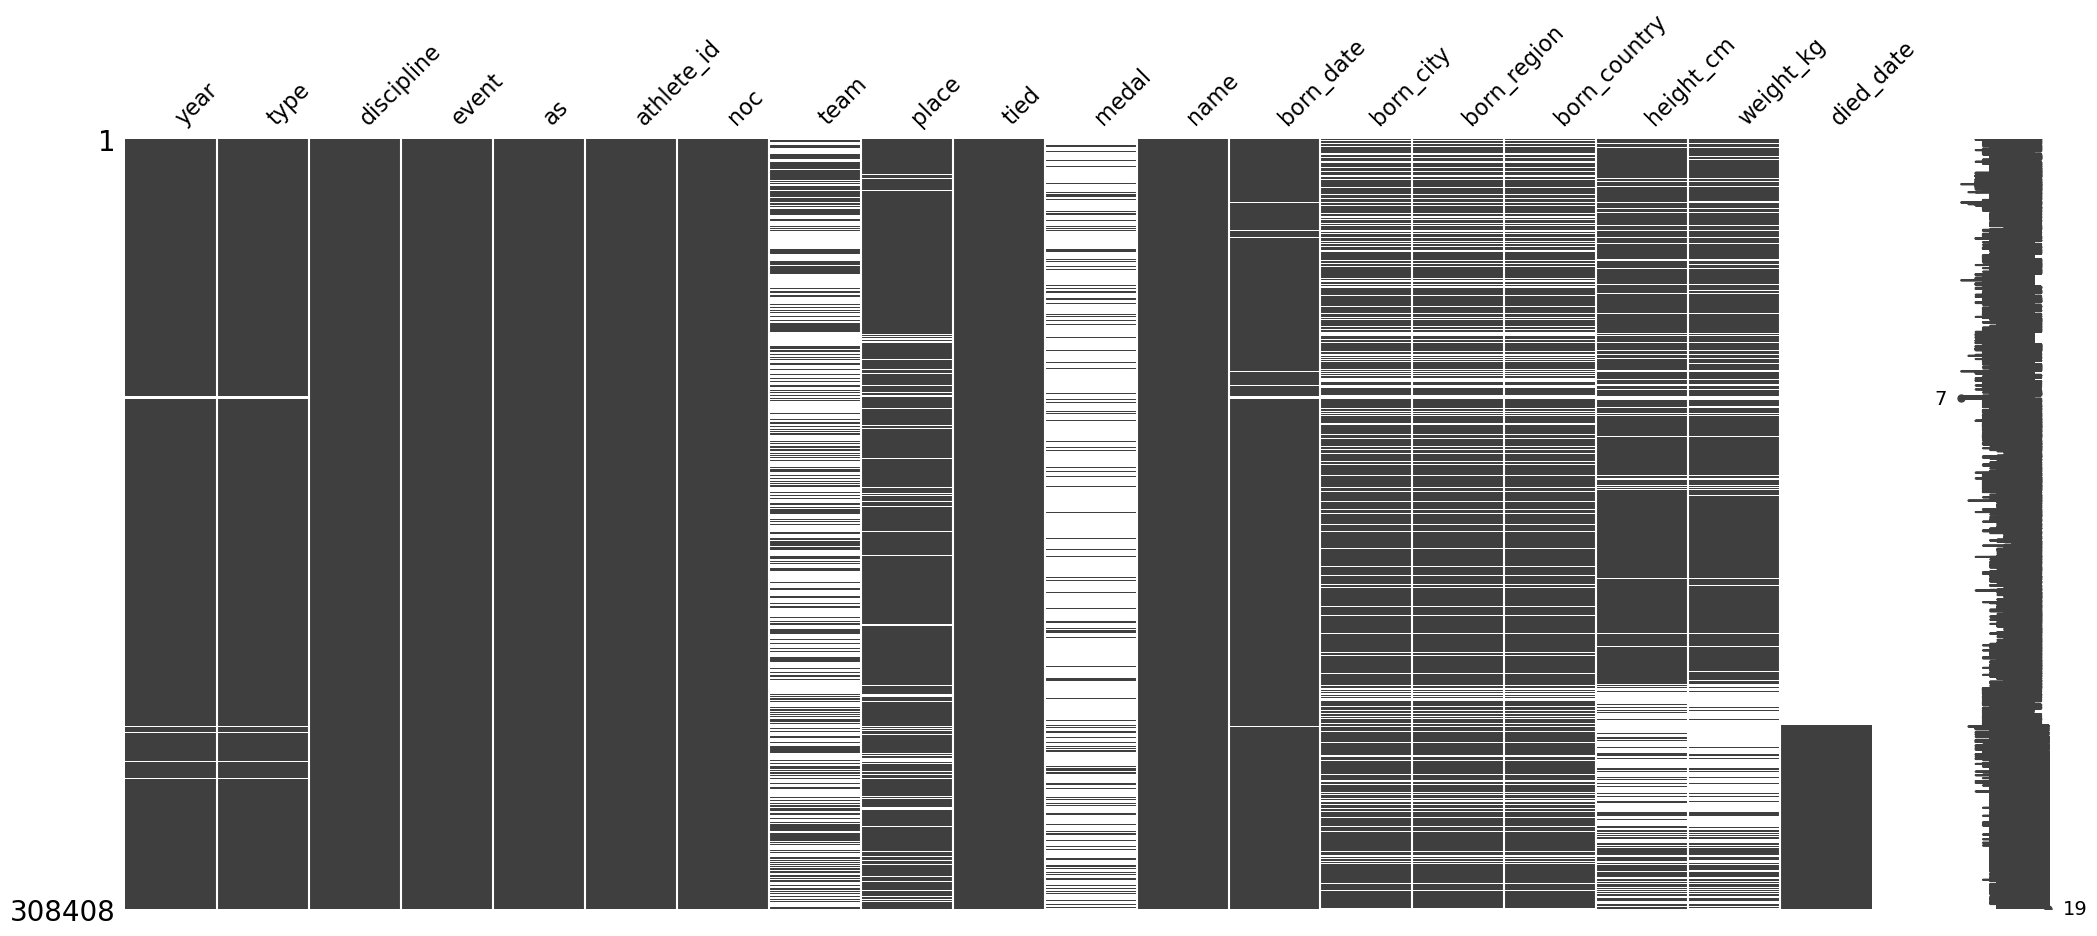

In [21]:
df_sorted = merged_df.sort_values('died_date', na_position='first')  # Ordenar por la columna 'edad'
msno.matrix(df_sorted)
plt.show()

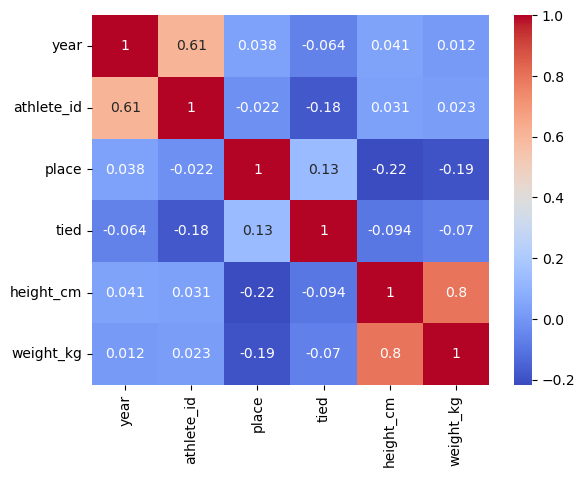

In [22]:
corr = merged_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# ANÁLISIS UNIDIMENSIONAL

## Unidimensional numérico

In [25]:
# valores colormap
TABLEAU_CMP = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', \
               'tab:gray','tab:olive', 'tab:cyan')

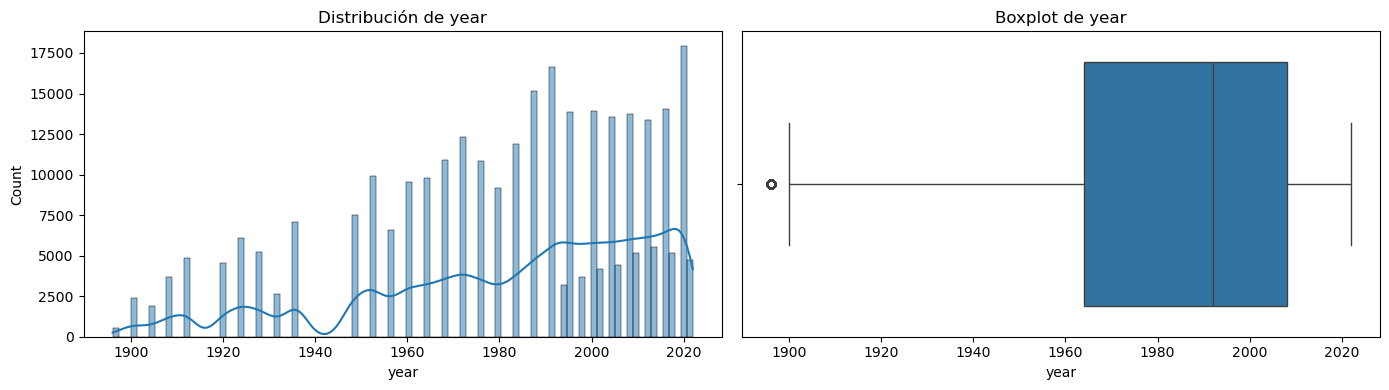

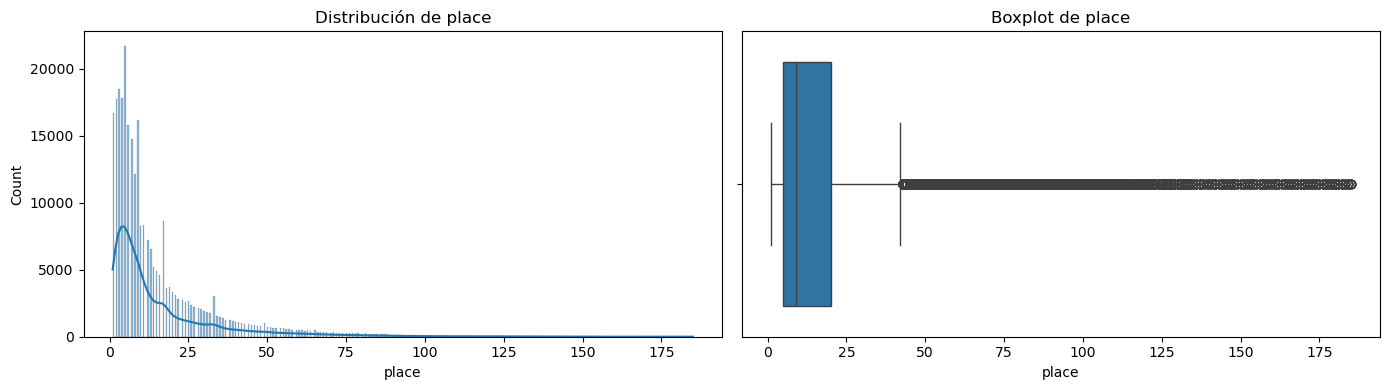

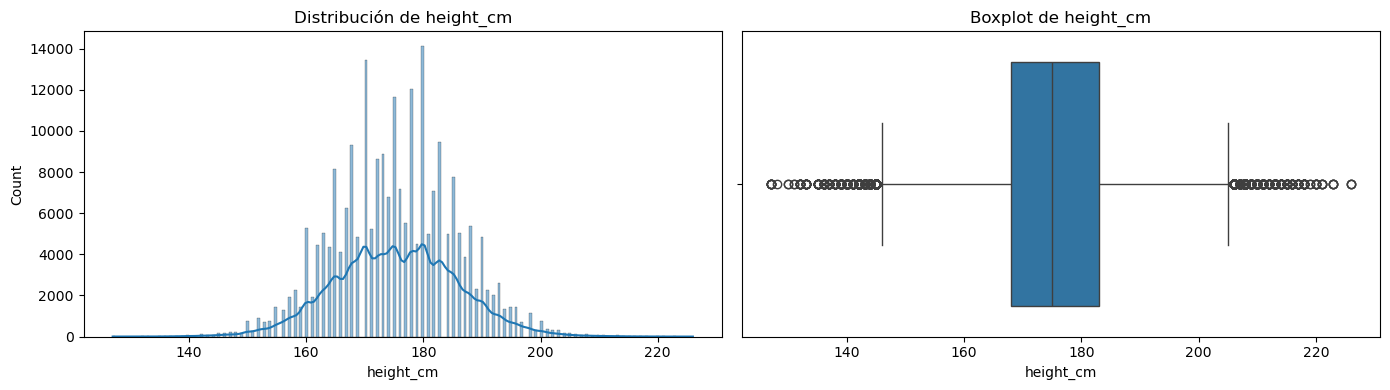

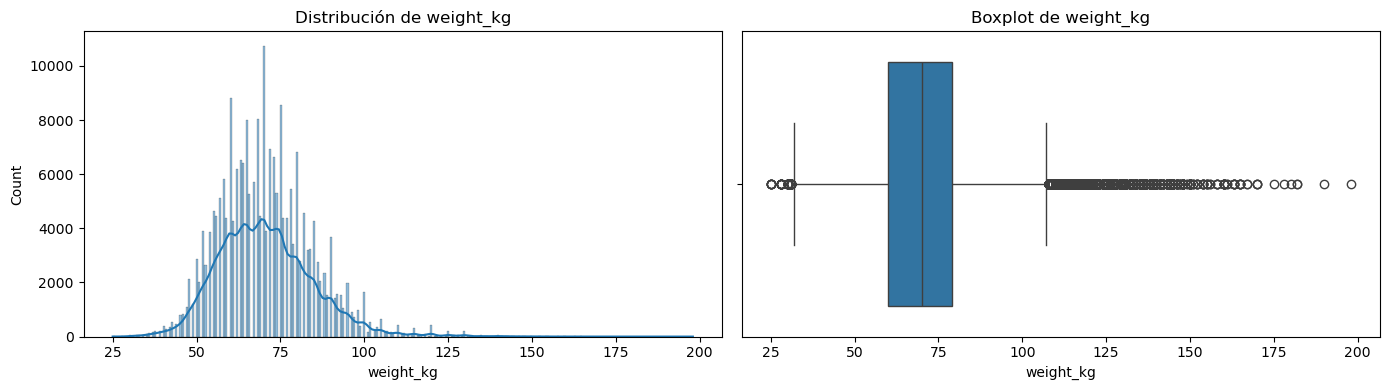

In [26]:
# creamos la grafica
numericas = merged_df.select_dtypes(include=np.number).drop(columns='athlete_id')
categoricas = merged_df.select_dtypes(include='object')

# graficas distribucion y boxplot de cada atributo

for col in numericas.columns:
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    # Histograma con KDE
    sns.histplot(numericas[col], kde=True, ax=axs[0])
    axs[0].set_title(f'Distribución de {col}')
    axs[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=numericas[col], ax=axs[1])
    axs[1].set_title(f'Boxplot de {col}')
    axs[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

## Univariado categórico

In [28]:
# colores = sns.color_palette("husl", len(var_cat))


Valores únicos en type: 2


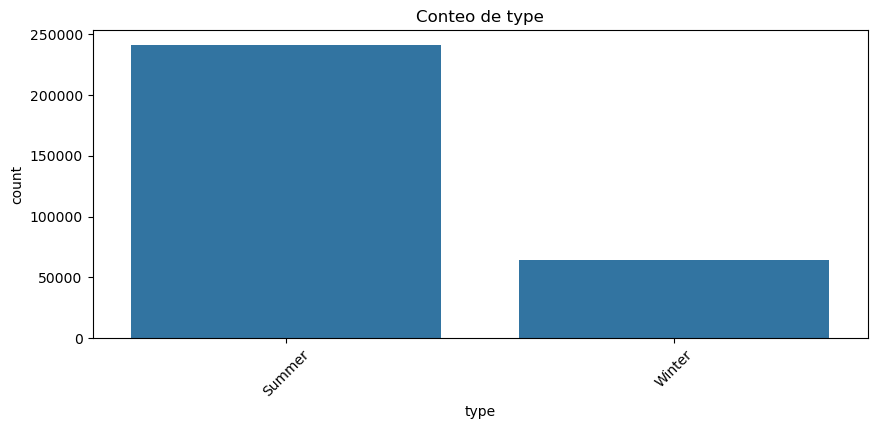


Valores únicos en discipline: 93
Demasiadas categorías para graficar discipline de forma legible.

Valores únicos en event: 1191
Demasiadas categorías para graficar event de forma legible.

Valores únicos en as: 144005
Demasiadas categorías para graficar as de forma legible.

Valores únicos en noc: 230
Demasiadas categorías para graficar noc de forma legible.

Valores únicos en team: 19413
Demasiadas categorías para graficar team de forma legible.

Valores únicos en medal: 3


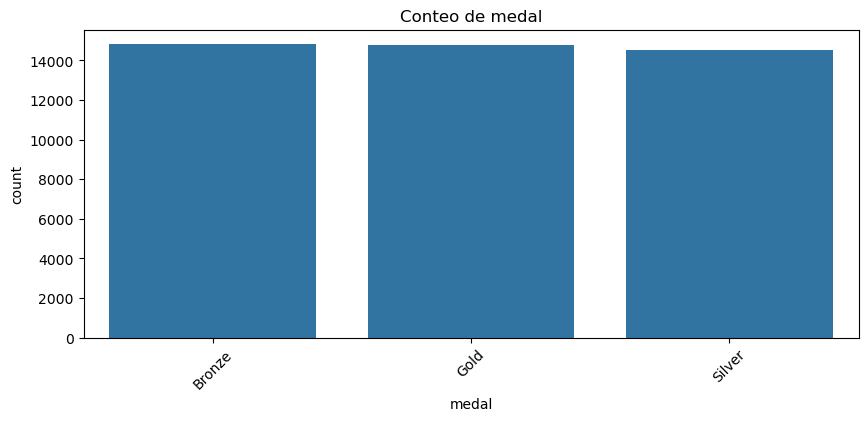


Valores únicos en name: 142547
Demasiadas categorías para graficar name de forma legible.

Valores únicos en born_date: 41257
Demasiadas categorías para graficar born_date de forma legible.

Valores únicos en born_city: 22337
Demasiadas categorías para graficar born_city de forma legible.

Valores únicos en born_region: 2554
Demasiadas categorías para graficar born_region de forma legible.

Valores únicos en born_country: 236
Demasiadas categorías para graficar born_country de forma legible.

Valores únicos en died_date: 20007
Demasiadas categorías para graficar died_date de forma legible.


In [29]:
for col in categoricas.columns:
        print(f"\nValores únicos en {col}: {merged_df[col].nunique()}")
        if merged_df[col].nunique() <= 20:
            plt.figure(figsize=(10,4))
            sns.countplot(data=merged_df, x=col, order=merged_df[col].value_counts().index)
            plt.title(f'Conteo de {col}')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Demasiadas categorías para graficar {col} de forma legible.")

In [31]:
print(merged_df.nunique())

year                37
type                 2
discipline          93
event             1191
as              144005
athlete_id      145262
noc                230
team             19413
place              185
tied                 2
medal                3
name            142547
born_date        41257
born_city        22337
born_region       2554
born_country       236
height_cm           95
weight_kg          141
died_date        20007
dtype: int64


In [32]:
print(merged_df['discipline'].unique())

['Tennis' 'Table Tennis' 'Fencing' 'Badminton' 'Hockey' 'Athletics'
 'Art Competitions' 'Modern Pentathlon' 'Archery' 'Boxing'
 'Softball (Baseball/Softball)' 'Baseball (Baseball/Softball)' 'Sailing'
 'Golf' 'Jeu De Paume' 'Basketball (Basketball)' 'Cycling Road (Cycling)'
 'Handball' 'Australian Rules Football' 'Bobsleigh (Bobsleigh)'
 'Canoe Sprint (Canoeing)' 'Canoe Slalom (Canoeing)'
 'Canoe Marathon (Canoeing)' 'Shooting' 'Rowing' 'Cycling Track (Cycling)'
 'Polo' 'Rugby (Rugby)' 'Equestrian Dressage (Equestrian)'
 'Equestrian Eventing (Equestrian)' 'Equestrian Jumping (Equestrian)'
 'Tug-Of-War' 'Lacrosse' 'Diving (Aquatics)' 'Winter Pentathlon'
 'Equestrian Vaulting (Equestrian)' 'Equestrian Driving (Equestrian)'
 'Cycling Mountain Bike (Cycling)' 'Speed Skating (Skating)'
 'Football (Football)' 'Bicycle Polo (Cycling)'
 'Cross Country Skiing (Skiing)' 'Racquets' 'Cricket' 'Croquet'
 'Motorboating' 'Swimming (Aquatics)' 'Ice Hockey (Ice Hockey)' 'Bandy'
 'Artistic Gymnastics (Gy

## Análisis Bivariado


###  Numérico-numérico

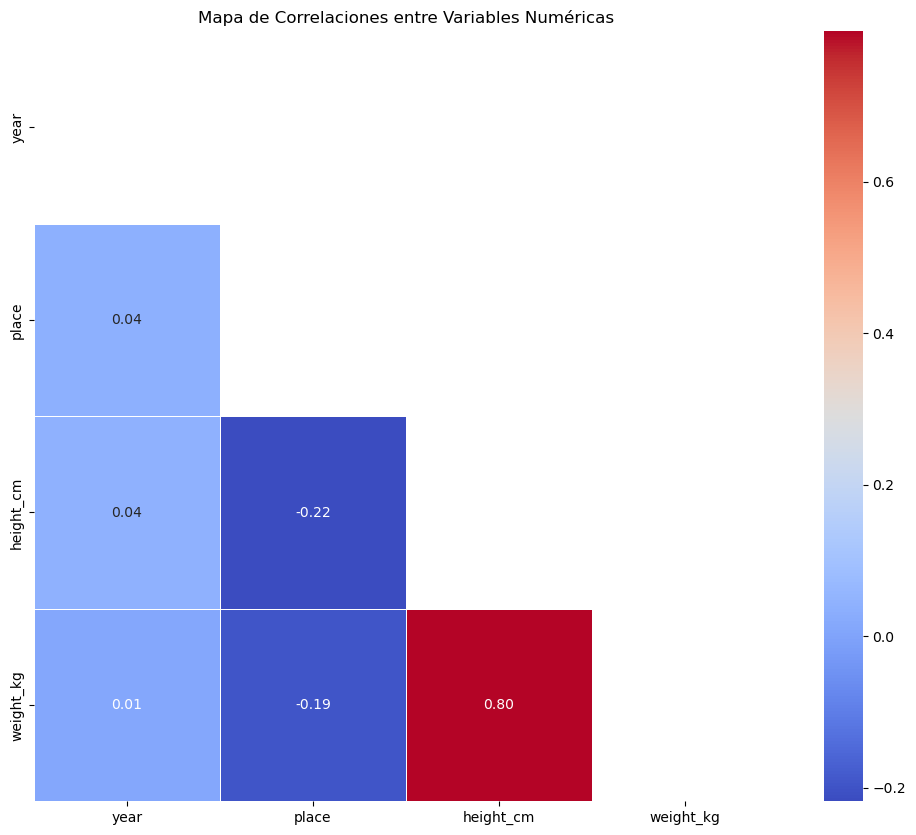

In [35]:
corr = numericas.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlaciones entre Variables Numéricas')
plt.show()

### Categórico-categórico

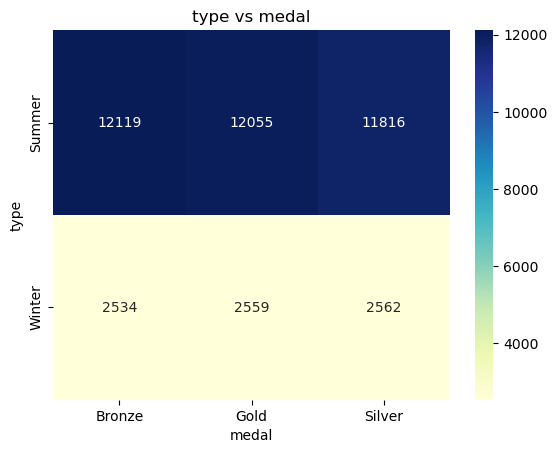

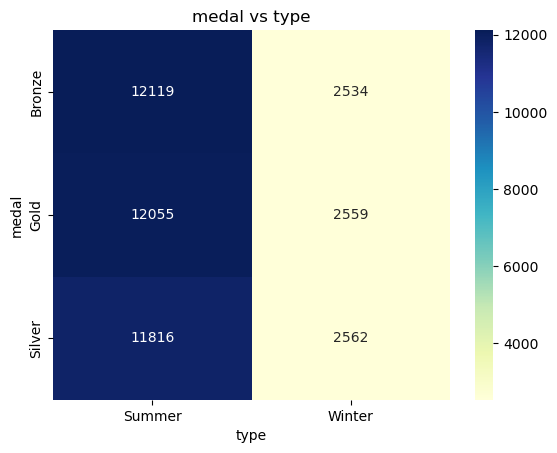

In [37]:
for col1 in categoricas.columns:
    for col2 in categoricas.columns:
        if col1 != col2 and merged_df[col1].nunique() <= 50 and merged_df[col2].nunique() <= 50:
            tabla = pd.crosstab(merged_df[col1], merged_df[col2])
            sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu")
            plt.title(f'{col1} vs {col2}')
            plt.show()


Columnas después de limpiar NaN: ['type', 'discipline', 'event', 'as', 'noc', 'team', 'medal', 'name', 'born_date', 'born_city', 'born_region', 'born_country', 'died_date']
Columnas después de eliminar 'Otros' y NaN: ['type', 'discipline', 'event', 'as', 'noc', 'team', 'medal', 'name', 'born_date', 'born_city', 'born_region', 'born_country', 'died_date']
     type discipline                   event   as  noc team medal name  \
0  Summer        NaN  Singles, Men (Olympic)  NaN  FRA  NaN   NaN  NaN   
1  Summer        NaN                     NaN  NaN  FRA  NaN   NaN  NaN   
2  Summer        NaN  Singles, Men (Olympic)  NaN  FRA  NaN   NaN  NaN   
3  Summer        NaN                     NaN  NaN  FRA  NaN   NaN  NaN   
4  Summer        NaN                     NaN  NaN  FRA  NaN   NaN  NaN   

  born_date born_city born_region born_country died_date  
0       NaN       NaN         NaN          FRA       NaN  
1       NaN       NaN         NaN          FRA       NaN  
2       NaN       NaN

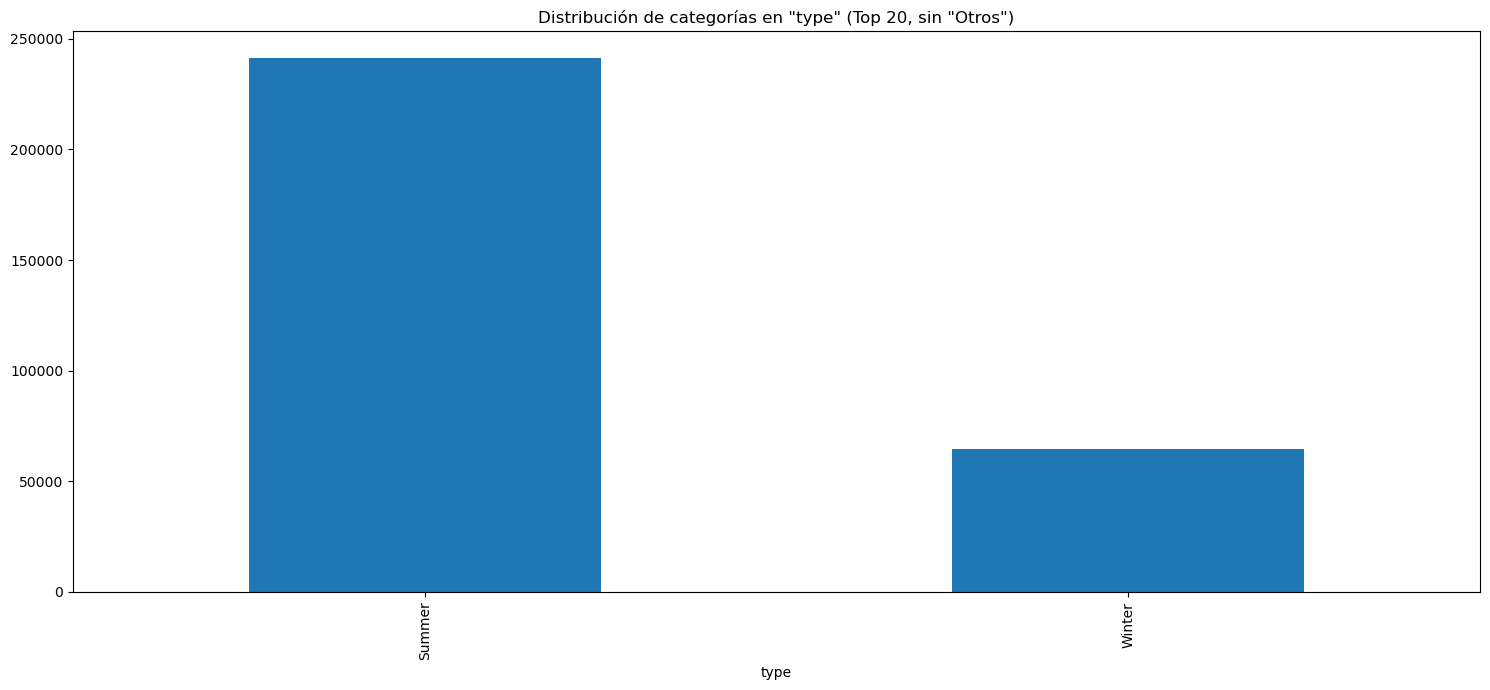

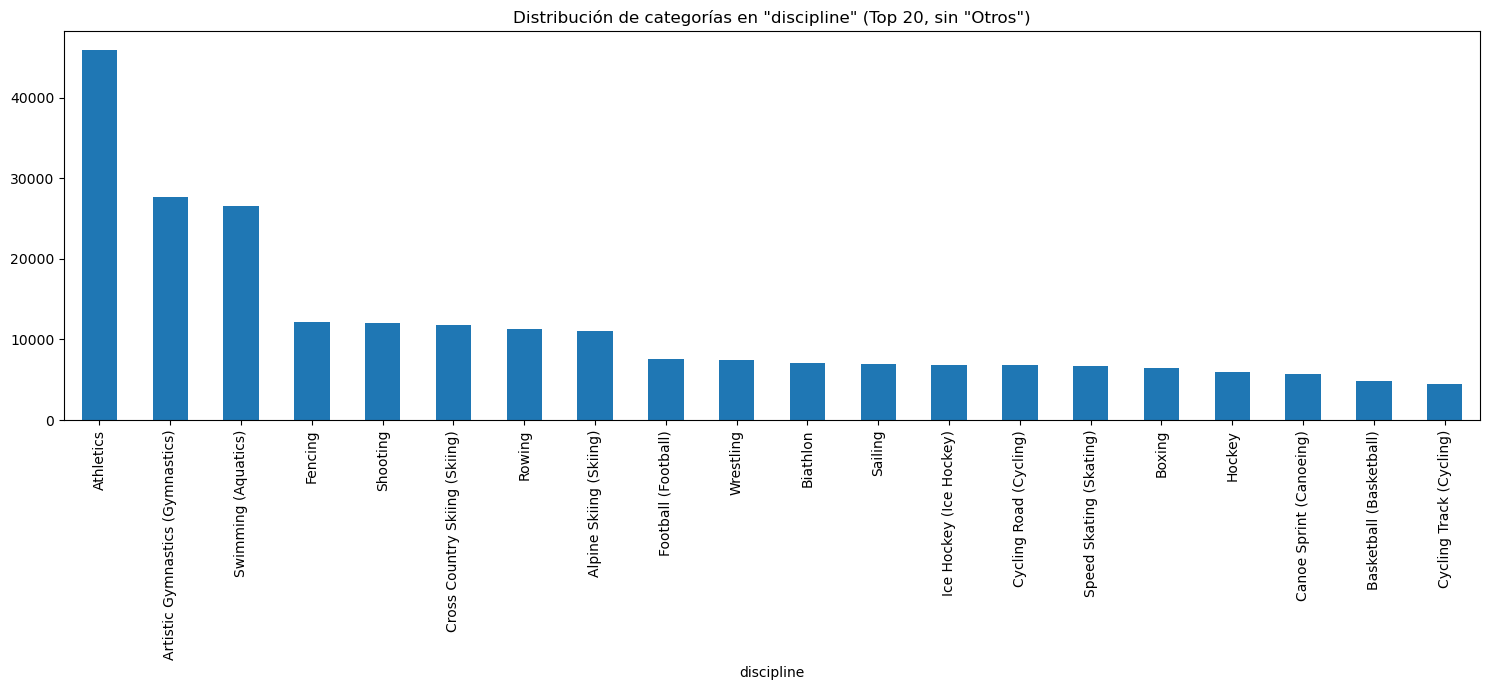

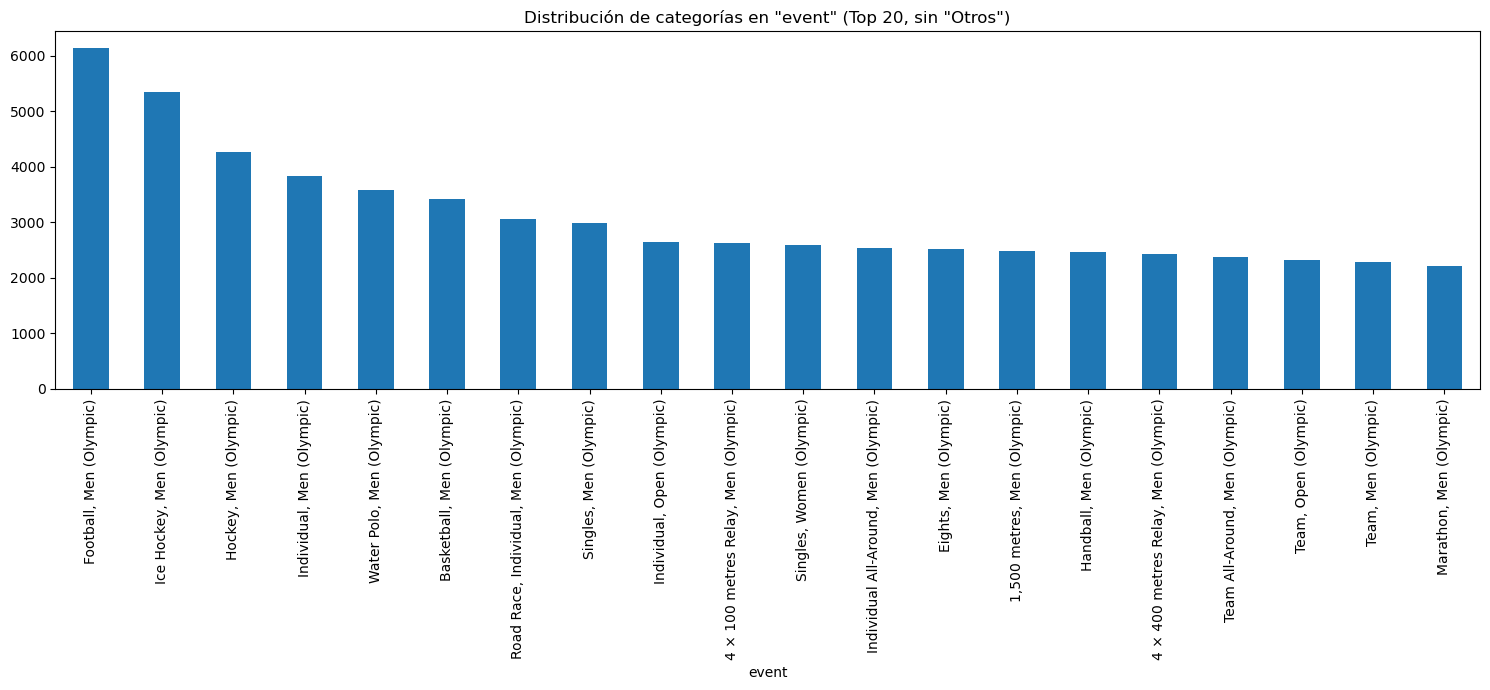

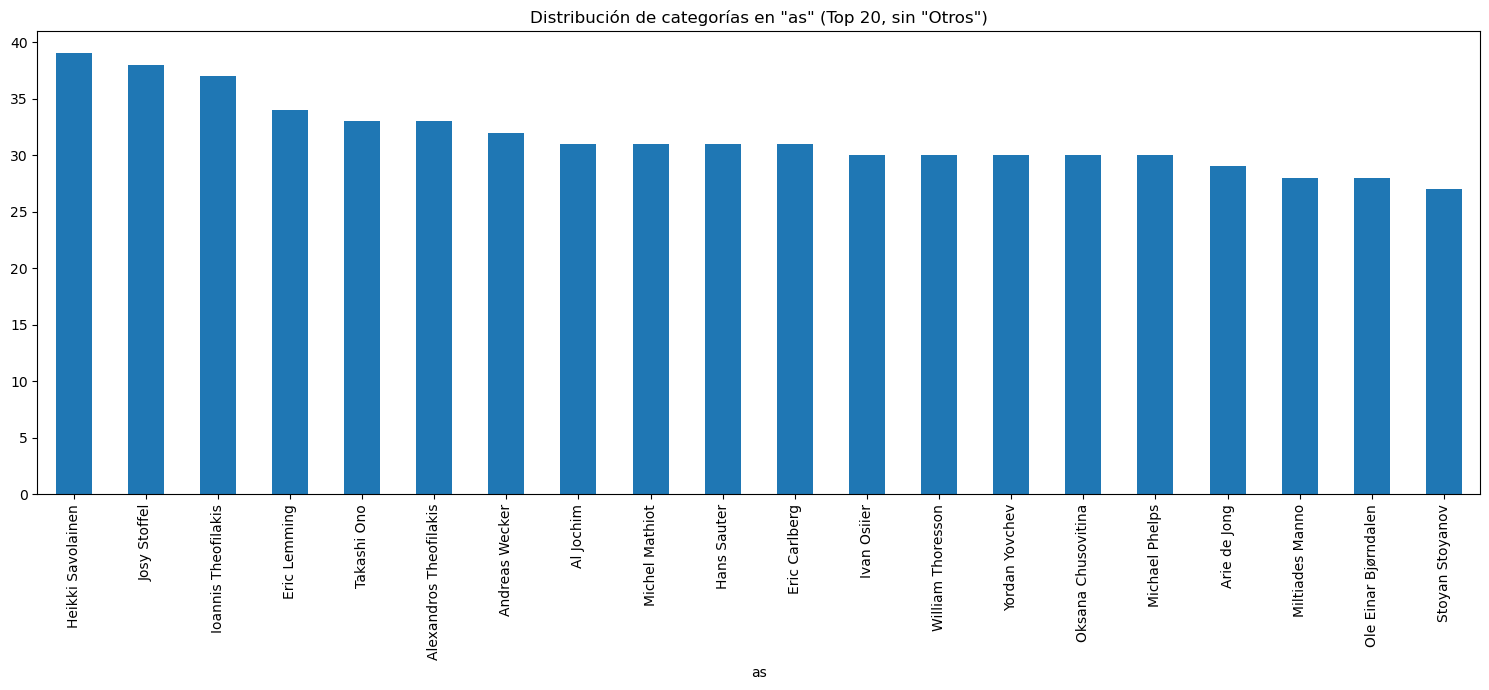

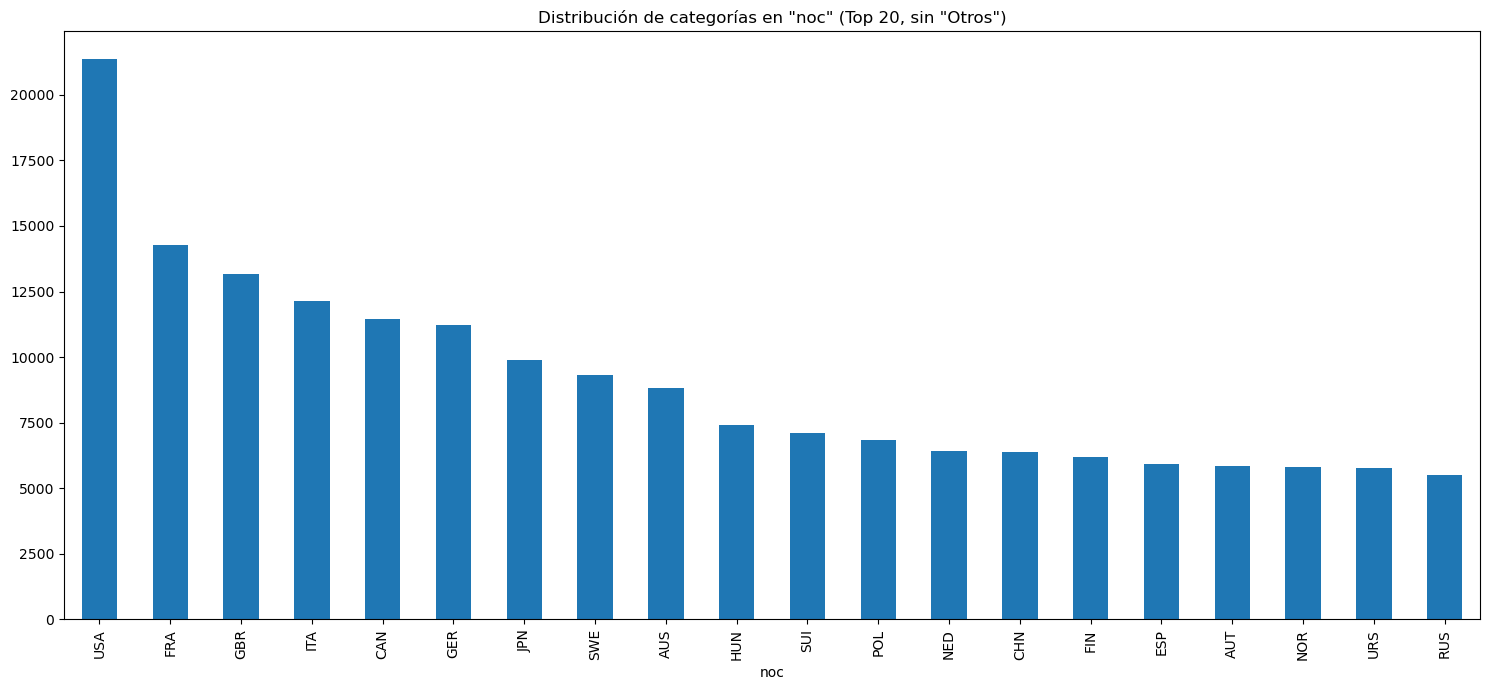

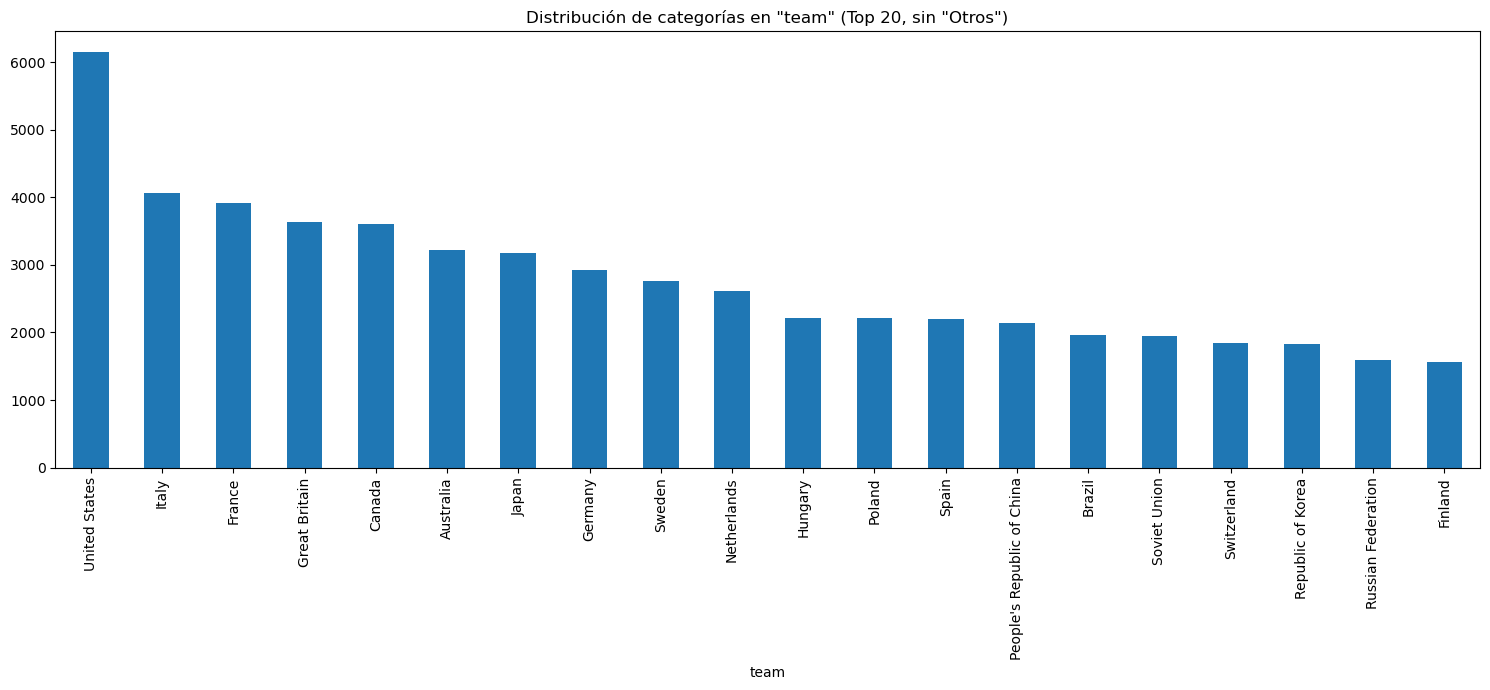

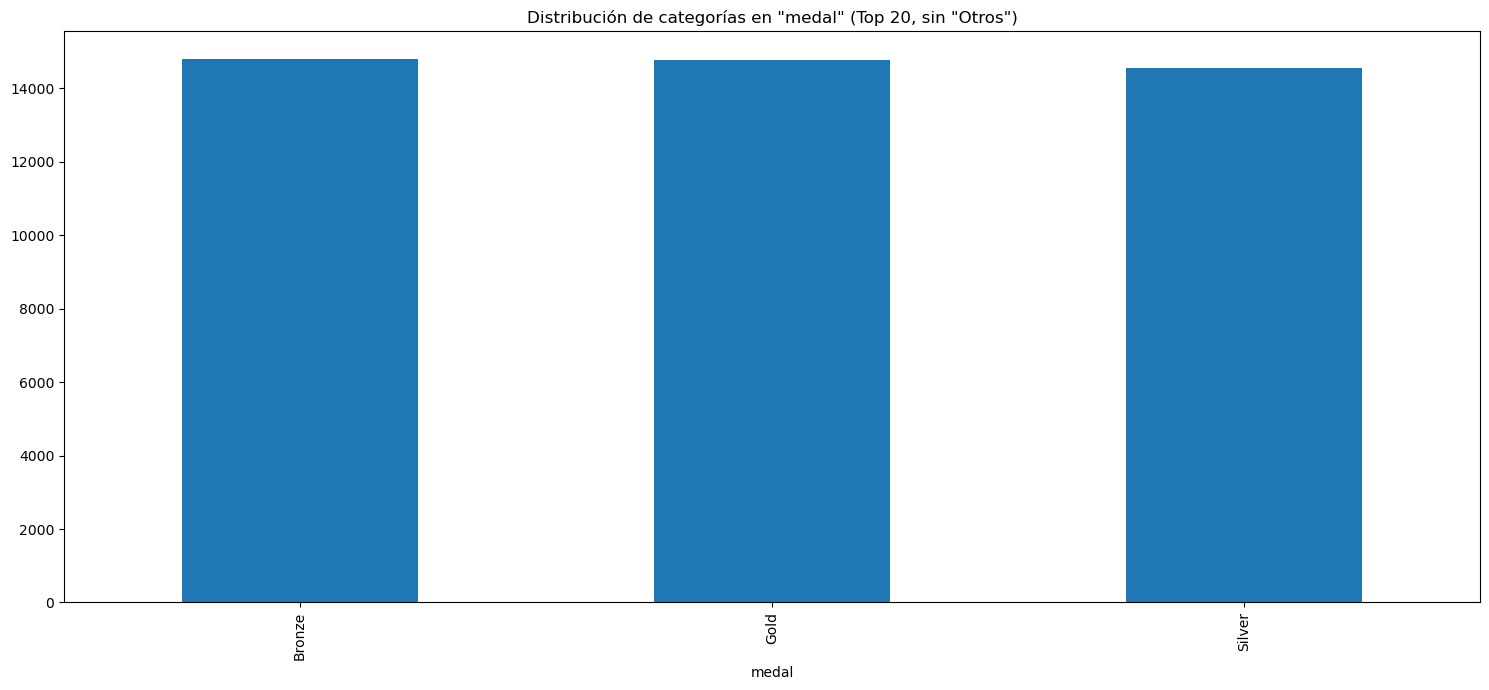

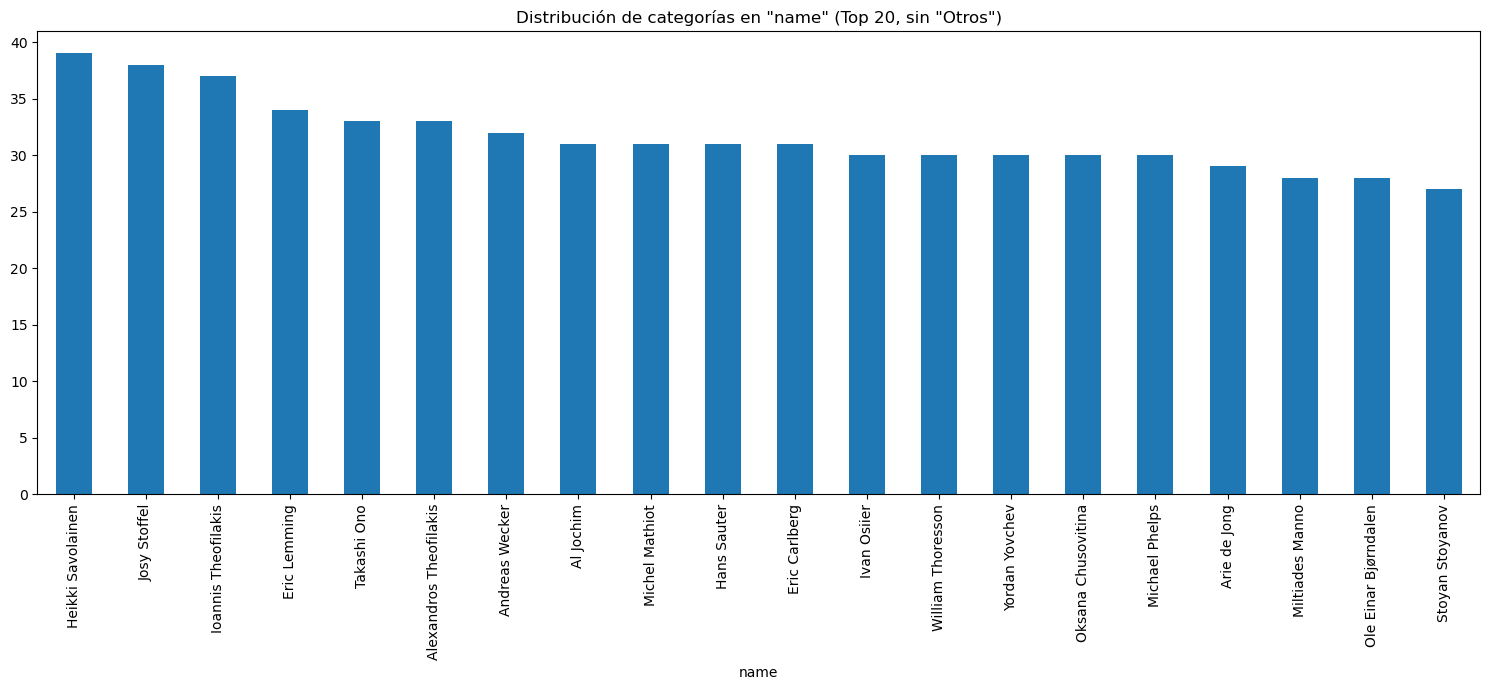

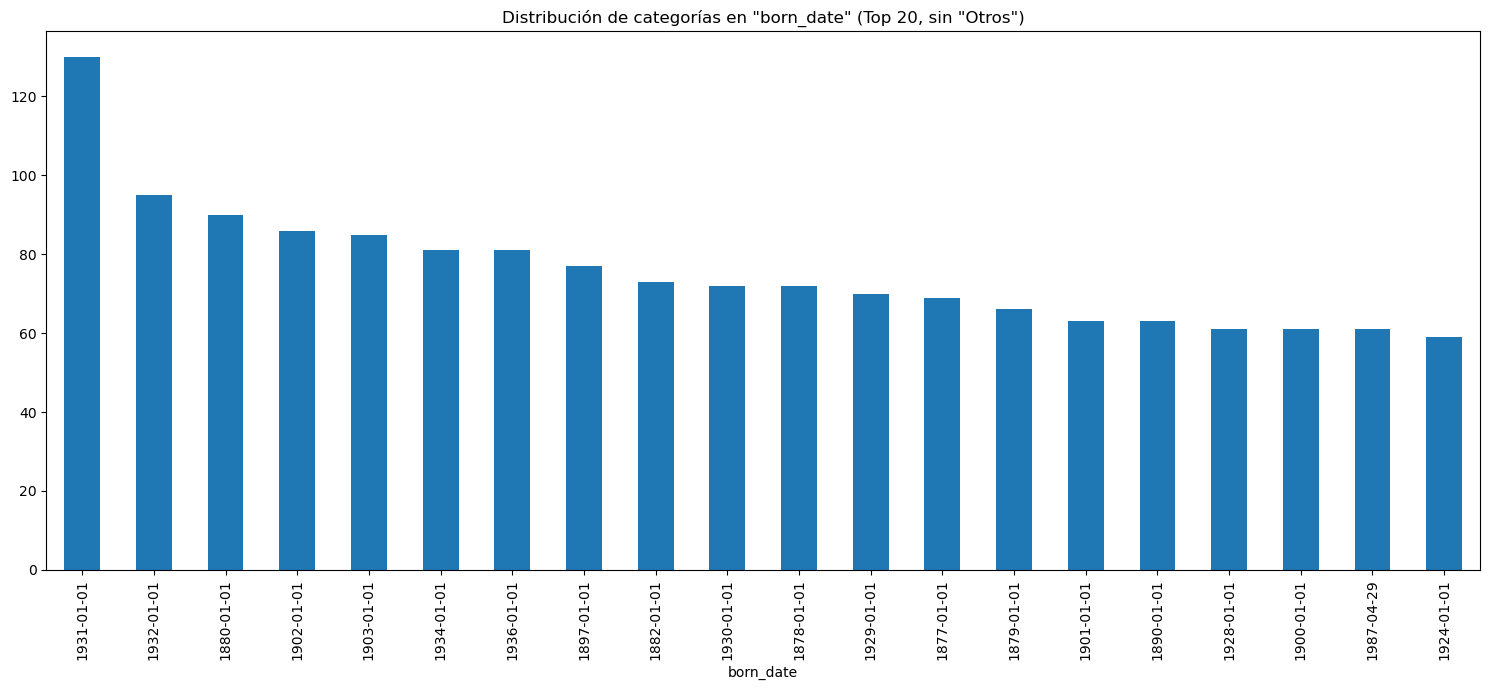

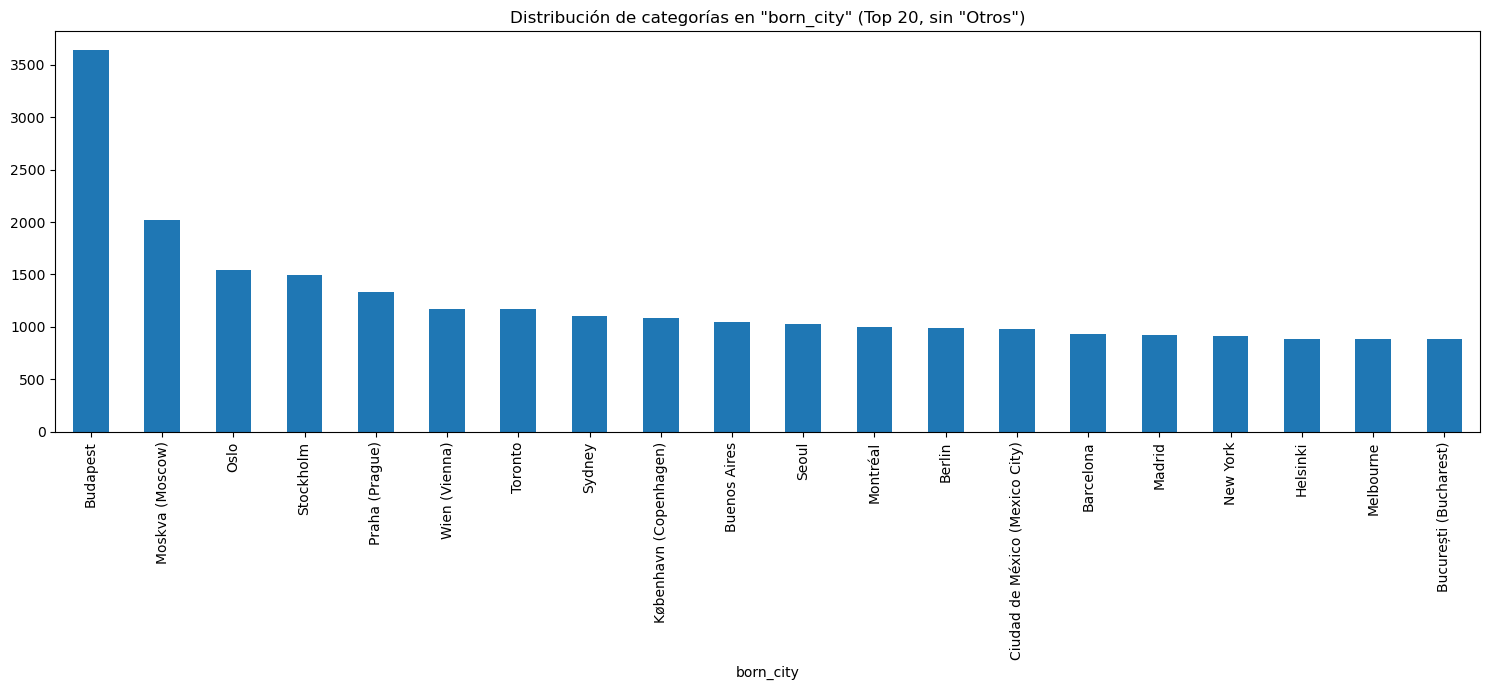

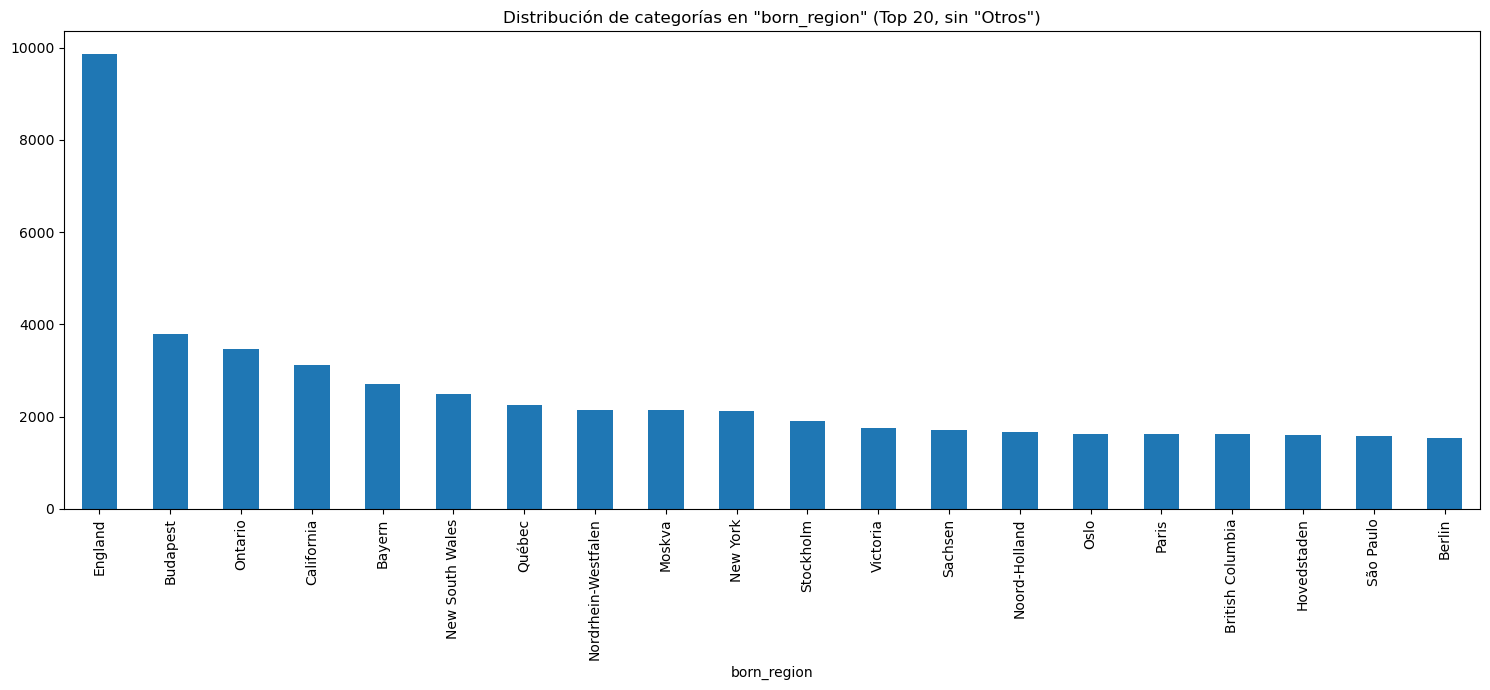

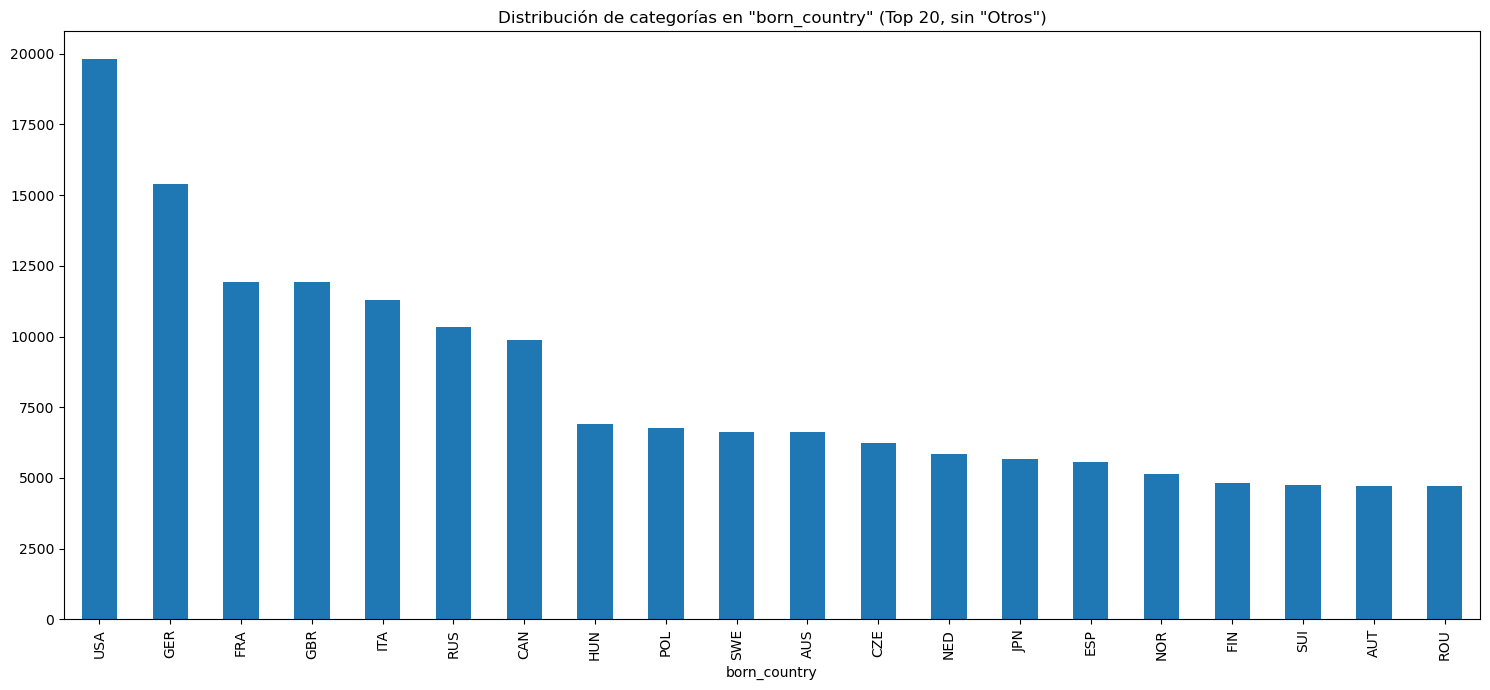

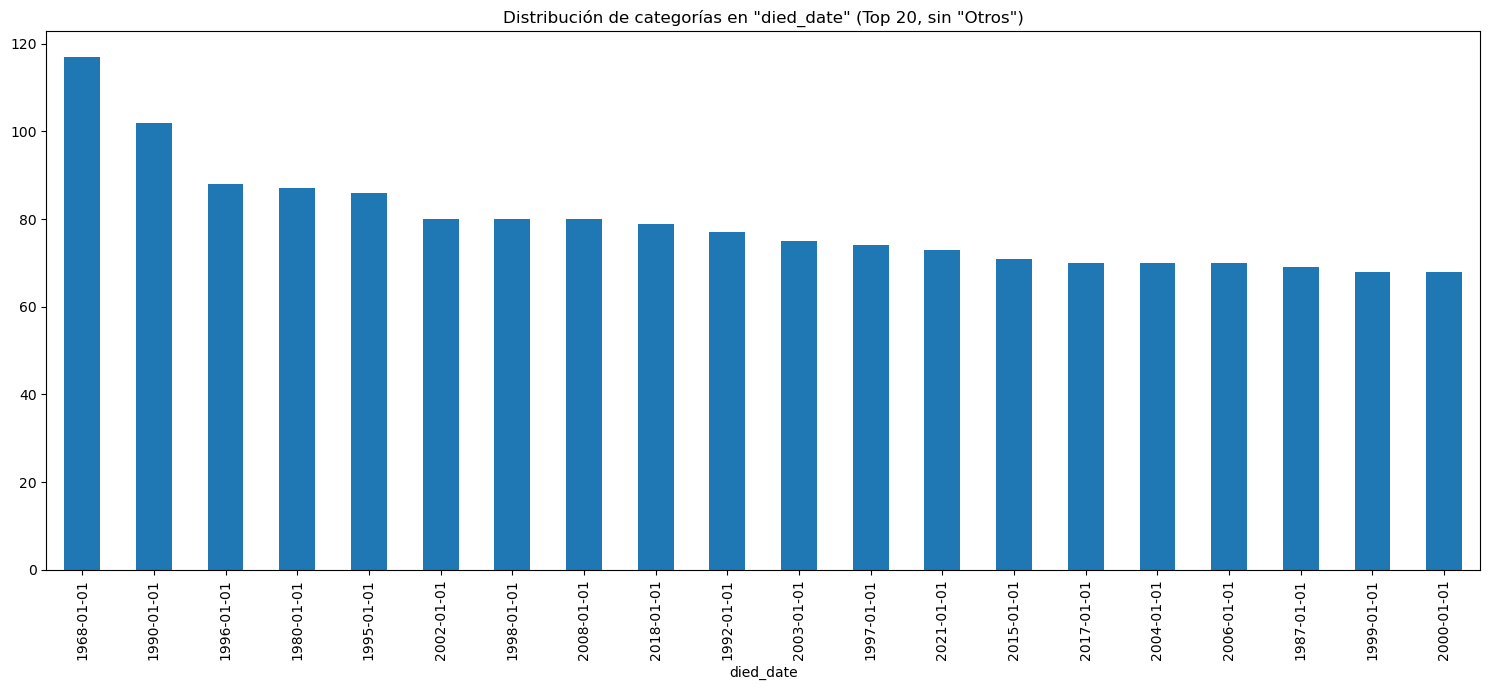

In [38]:
def agrupar_categorias(columna, top_n=10):
    # Obtener las categorías más frecuentes
    top = columna.value_counts().nlargest(top_n).index
    # Filtrar las categorías, manteniendo solo las que están en el top
    columna_filtrada = columna[columna.isin(top)]
    return columna_filtrada

# Aplicar la función de agrupamiento a todas las columnas categóricas
categoricas_filtradas = categoricas.apply(lambda col: agrupar_categorias(col, top_n=20))

# Eliminar columnas que estén completamente vacías o solo tengan NaN
categoricas_filtradas = categoricas_filtradas.dropna(axis=1, how='all')

# Verificar qué columnas quedaron después de eliminar las vacías
print(f"Columnas después de limpiar NaN: {categoricas_filtradas.columns.tolist()}")

# Filtrar "Otros" y eliminar las filas que contienen "Otros"
categoricas_filtradas = categoricas_filtradas.apply(lambda col: col[col != 'Otros'])

# Verificar que las columnas no queden vacías después de filtrar "Otros"
categoricas_filtradas = categoricas_filtradas.dropna(axis=1, how='all')  # Eliminar columnas vacías nuevamente

# Verificamos el contenido después de todas las transformaciones
print(f"Columnas después de eliminar 'Otros' y NaN: {categoricas_filtradas.columns.tolist()}")
print(categoricas_filtradas.head())  # Verificamos algunas filas para revisar los datos

# Graficar solo si hay datos válidos en la columna
for col in categoricas_filtradas.columns:
    if not categoricas_filtradas[col].empty:  # Solo graficamos si la columna no está vacía
        plt.figure(figsize=(15, 7))
        categoricas_filtradas[col].value_counts().plot(kind='bar')
        plt.title(f'Distribución de categorías en "{col}" (Top 20, sin "Otros")')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"La columna '{col}' está vacía después del filtrado y no se graficará.")

# Analisis Bivariado Num-Cat

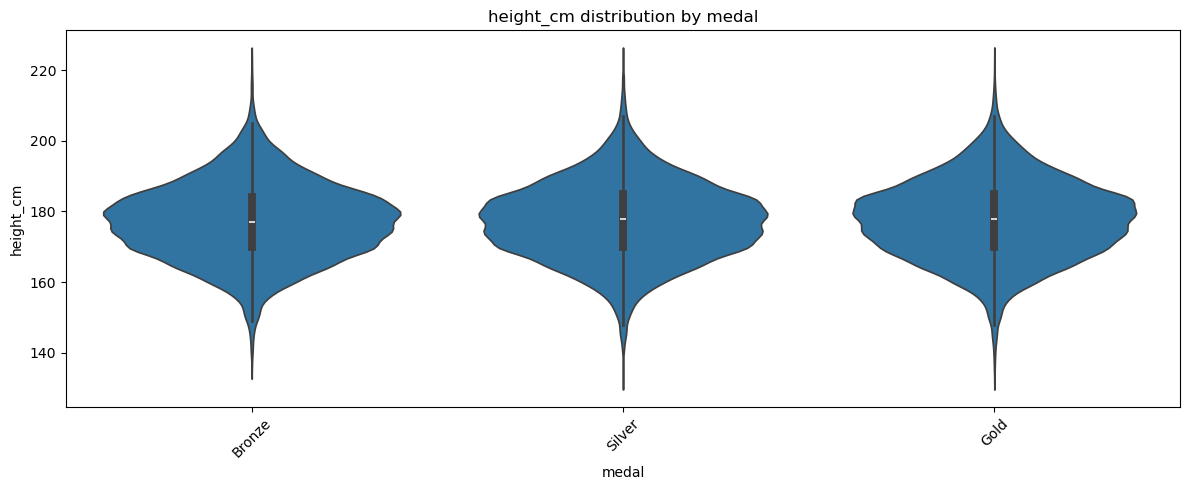

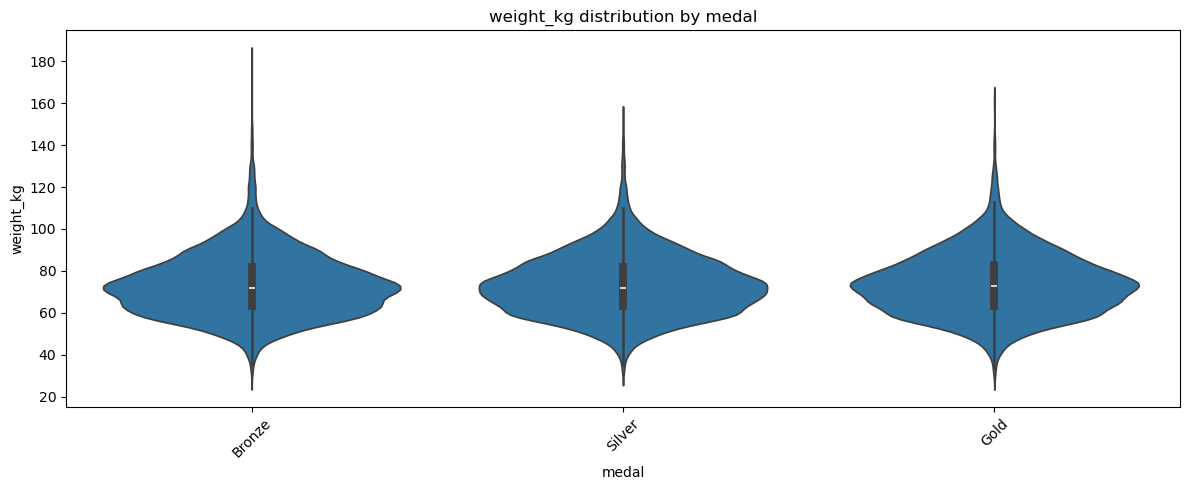

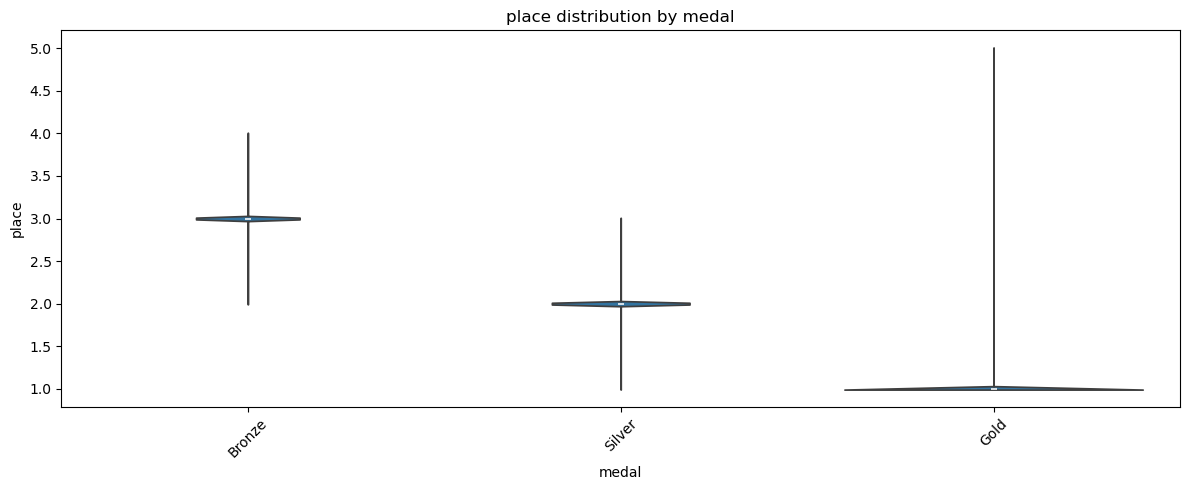

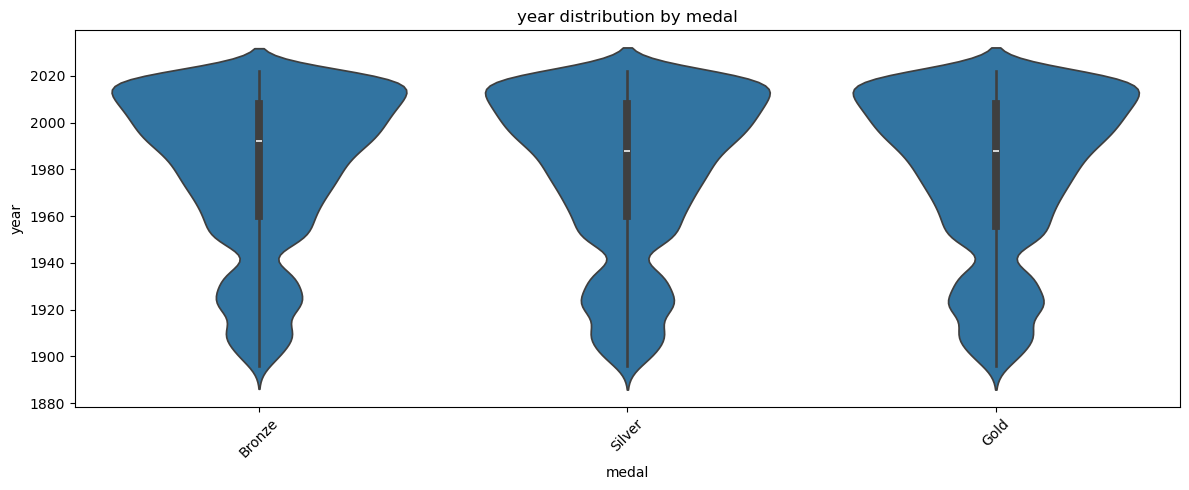

In [40]:
var = 'medal'
top_var = merged_df[var].value_counts().head(10).index
df_filtered = merged_df[merged_df[var].isin(top_var)]

for col in ['height_cm', 'weight_kg', 'place', 'year']:
    plt.figure(figsize=(12, 5))
    sns.violinplot(x=var, y=col, data=df_filtered)
    plt.title(f'{col} distribution by {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [41]:
var_cat

['type',
 'discipline',
 'event',
 'as',
 'noc',
 'team',
 'medal',
 'name',
 'born_date',
 'born_city',
 'born_region',
 'born_country',
 'NOC',
 'died_date']

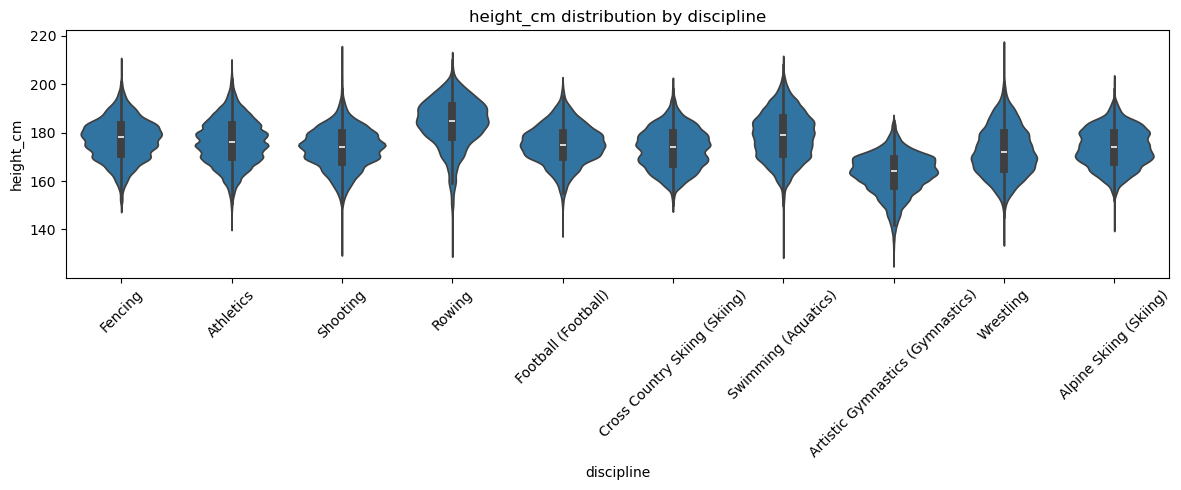

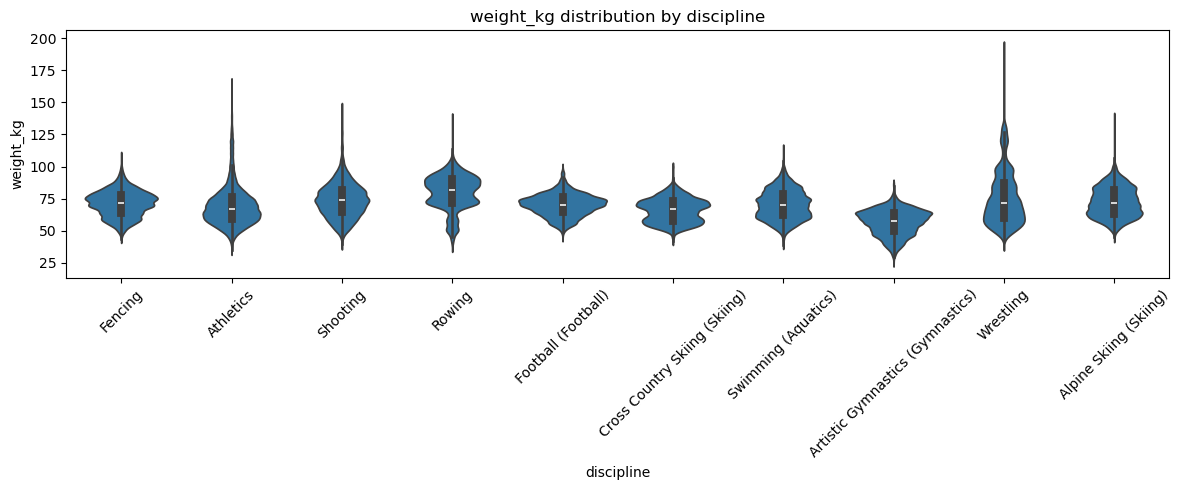

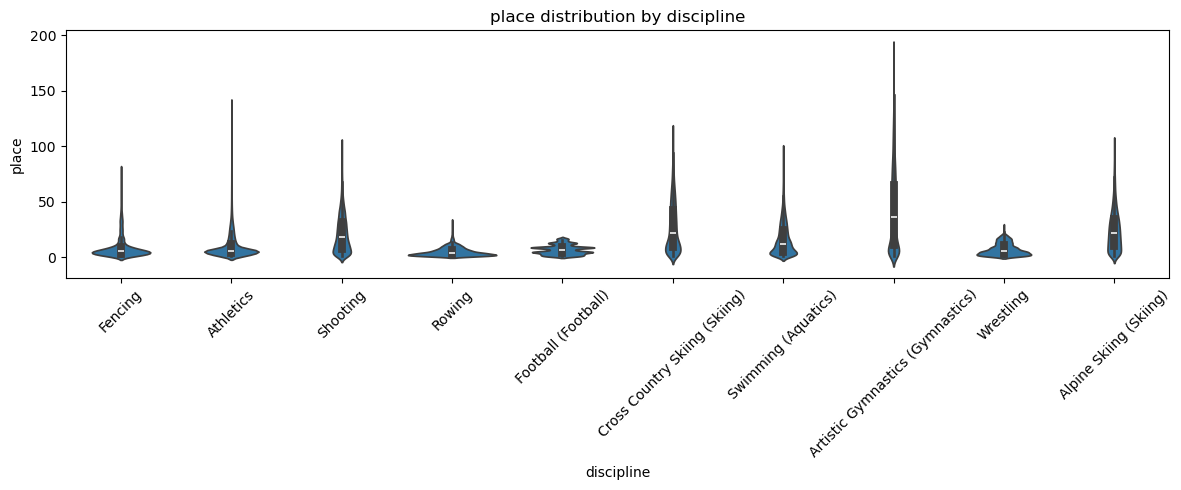

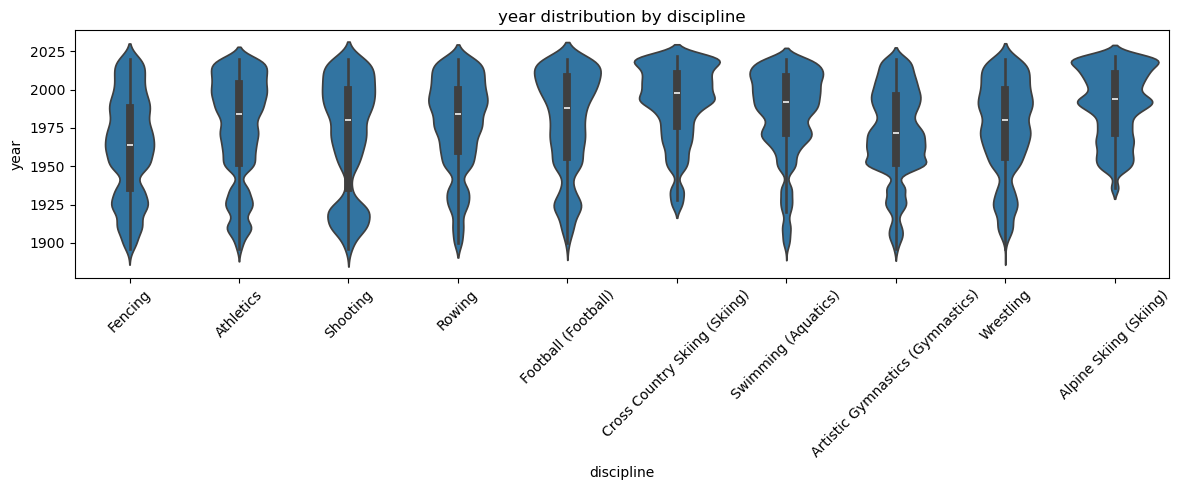

In [42]:
var = 'discipline'
top_var = merged_df[var].value_counts().head(10).index
df_filtered = merged_df[merged_df[var].isin(top_var)]

for col in ['height_cm', 'weight_kg', 'place', 'year']:
    plt.figure(figsize=(12, 5))
    sns.violinplot(x=var, y=col, data=df_filtered)
    plt.title(f'{col} distribution by {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

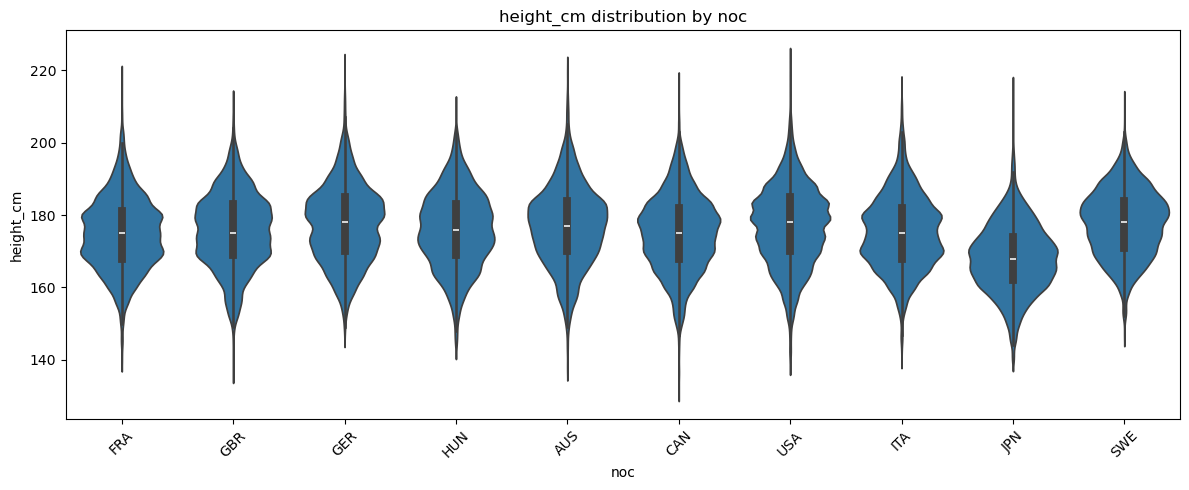

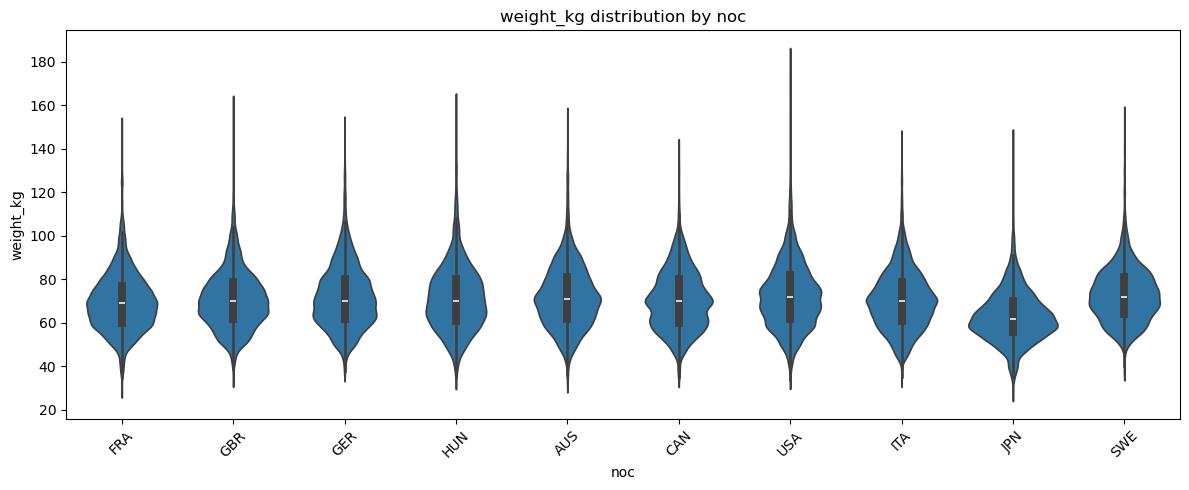

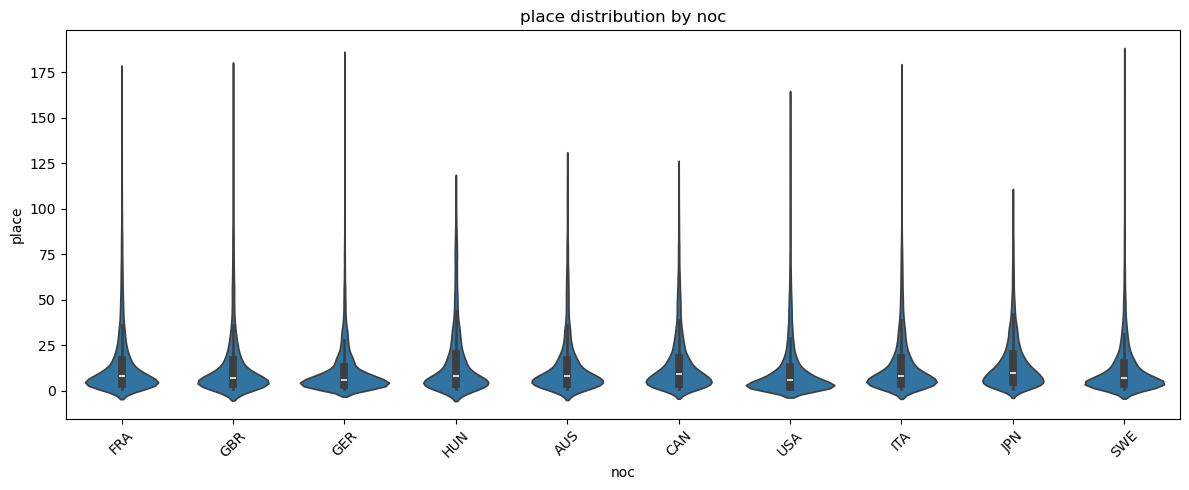

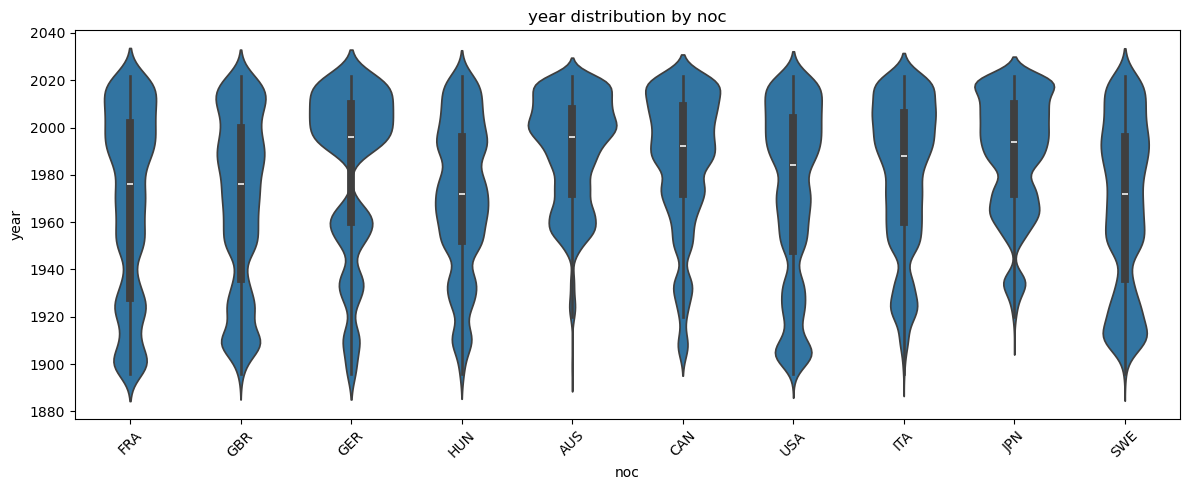

In [43]:
var = 'noc'
top_var = merged_df[var].value_counts().head(10).index
df_filtered = merged_df[merged_df[var].isin(top_var)]

for col in ['height_cm', 'weight_kg', 'place', 'year']:
    plt.figure(figsize=(12, 5))
    sns.violinplot(x=var, y=col, data=df_filtered)
    plt.title(f'{col} distribution by {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [44]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  float64
 1   type          305807 non-null  object 
 2   discipline    308407 non-null  object 
 3   event         308408 non-null  object 
 4   as            308408 non-null  object 
 5   athlete_id    308408 non-null  int64  
 6   noc           308407 non-null  object 
 7   team          121714 non-null  object 
 8   place         283193 non-null  float64
 9   tied          308408 non-null  bool   
 10  medal         44139 non-null   object 
 11  name          308408 non-null  object 
 12  born_date     305692 non-null  object 
 13  born_city     246890 non-null  object 
 14  born_region   246890 non-null  object 
 15  born_country  246890 non-null  object 
 16  height_cm     236910 non-null  float64
 17  weight_kg     227290 non-null  float64
 18  died

# DATA CLEANING

## Imputar en faltantes de columna Medals por "No Medals"

In [47]:
merged_df['medal'] = merged_df['medal'].fillna('No Medal')

In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  float64
 1   type          305807 non-null  object 
 2   discipline    308407 non-null  object 
 3   event         308408 non-null  object 
 4   as            308408 non-null  object 
 5   athlete_id    308408 non-null  int64  
 6   noc           308407 non-null  object 
 7   team          121714 non-null  object 
 8   place         283193 non-null  float64
 9   tied          308408 non-null  bool   
 10  medal         308408 non-null  object 
 11  name          308408 non-null  object 
 12  born_date     305692 non-null  object 
 13  born_city     246890 non-null  object 
 14  born_region   246890 non-null  object 
 15  born_country  246890 non-null  object 
 16  height_cm     236910 non-null  float64
 17  weight_kg     227290 non-null  float64
 18  died

## Eliminar registros donde el valor en la columna 'year' son faltantes

Aproxiimadamente un 1%

In [50]:
merged_df = merged_df.dropna(subset=['year'])  # Elimina filas donde esa columna tenga NaN

merged_df['year'] = merged_df['year'].astype(int)

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305807 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  int64  
 1   type          305807 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305807 non-null  object 
 4   as            305807 non-null  object 
 5   athlete_id    305807 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          120830 non-null  object 
 8   place         281519 non-null  float64
 9   tied          305807 non-null  bool   
 10  medal         305807 non-null  object 
 11  name          305807 non-null  object 
 12  born_date     303630 non-null  object 
 13  born_city     245242 non-null  object 
 14  born_region   245242 non-null  object 
 15  born_country  245242 non-null  object 
 16  height_cm     236354 non-null  float64
 17  weight_kg     226849 non-null  float64
 18  died_date

## Cambiamos el tipo de dato a la columna 'place' (float -> int)

In [53]:
merged_df['place'] = merged_df['place'].fillna(999).astype(int)

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305807 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  int64  
 1   type          305807 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305807 non-null  object 
 4   as            305807 non-null  object 
 5   athlete_id    305807 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          120830 non-null  object 
 8   place         305807 non-null  int64  
 9   tied          305807 non-null  bool   
 10  medal         305807 non-null  object 
 11  name          305807 non-null  object 
 12  born_date     303630 non-null  object 
 13  born_city     245242 non-null  object 
 14  born_region   245242 non-null  object 
 15  born_country  245242 non-null  object 
 16  height_cm     236354 non-null  float64
 17  weight_kg     226849 non-null  float64
 18  died_date

## Imputamos los valores faltantes de las columnas 'height_cm' y 'weight_cm'

In [56]:
merged_df['height_cm'] = merged_df['height_cm'].fillna(merged_df['height_cm'].median())

In [57]:
merged_df['weight_kg'] = merged_df['weight_kg'].fillna(merged_df['weight_kg'].median())

In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305807 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  int64  
 1   type          305807 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305807 non-null  object 
 4   as            305807 non-null  object 
 5   athlete_id    305807 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          120830 non-null  object 
 8   place         305807 non-null  int64  
 9   tied          305807 non-null  bool   
 10  medal         305807 non-null  object 
 11  name          305807 non-null  object 
 12  born_date     303630 non-null  object 
 13  born_city     245242 non-null  object 
 14  born_region   245242 non-null  object 
 15  born_country  245242 non-null  object 
 16  height_cm     305807 non-null  float64
 17  weight_kg     305807 non-null  float64
 18  died_date

## Imputamos los valores faltantes de la columna 'team' con el valor 'no team'

In [60]:
merged_df['team'] = merged_df['team'].fillna('no team')

In [61]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305807 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305807 non-null  int64  
 1   type          305807 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305807 non-null  object 
 4   as            305807 non-null  object 
 5   athlete_id    305807 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          305807 non-null  object 
 8   place         305807 non-null  int64  
 9   tied          305807 non-null  bool   
 10  medal         305807 non-null  object 
 11  name          305807 non-null  object 
 12  born_date     303630 non-null  object 
 13  born_city     245242 non-null  object 
 14  born_region   245242 non-null  object 
 15  born_country  245242 non-null  object 
 16  height_cm     305807 non-null  float64
 17  weight_kg     305807 non-null  float64
 18  died_date

## Eliminar registros nulos en la columna 'discipline'

In [63]:
merged_df = merged_df.dropna(subset=['discipline'])

In [64]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305806 entries, 0 to 308406
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          305806 non-null  int64  
 1   type          305806 non-null  object 
 2   discipline    305806 non-null  object 
 3   event         305806 non-null  object 
 4   as            305806 non-null  object 
 5   athlete_id    305806 non-null  int64  
 6   noc           305806 non-null  object 
 7   team          305806 non-null  object 
 8   place         305806 non-null  int64  
 9   tied          305806 non-null  bool   
 10  medal         305806 non-null  object 
 11  name          305806 non-null  object 
 12  born_date     303629 non-null  object 
 13  born_city     245241 non-null  object 
 14  born_region   245241 non-null  object 
 15  born_country  245241 non-null  object 
 16  height_cm     305806 non-null  float64
 17  weight_kg     305806 non-null  float64
 18  died_date

## Comprobacion y eliminacion de registros duplicados

In [66]:
merged_df.duplicated().sum()

126

In [67]:
merged_df = merged_df.drop_duplicates()

## Cambiar el tipo de dato de la columna 'born_date'

In [69]:
merged_df['born_date'] = pd.to_datetime(merged_df['born_date'])

In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305680 entries, 0 to 308406
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          305680 non-null  int64         
 1   type          305680 non-null  object        
 2   discipline    305680 non-null  object        
 3   event         305680 non-null  object        
 4   as            305680 non-null  object        
 5   athlete_id    305680 non-null  int64         
 6   noc           305680 non-null  object        
 7   team          305680 non-null  object        
 8   place         305680 non-null  int64         
 9   tied          305680 non-null  bool          
 10  medal         305680 non-null  object        
 11  name          305680 non-null  object        
 12  born_date     303521 non-null  datetime64[ns]
 13  born_city     245151 non-null  object        
 14  born_region   245151 non-null  object        
 15  born_country  245151 n

## Eliminar columnas 'born_city', 'born_region' 'as' (duplicada con 'name') y 'died_date'

In [72]:
merged_df.drop(columns=['born_city', 'born_region', 'died_date', 'as'], inplace=True)

In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305680 entries, 0 to 308406
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          305680 non-null  int64         
 1   type          305680 non-null  object        
 2   discipline    305680 non-null  object        
 3   event         305680 non-null  object        
 4   athlete_id    305680 non-null  int64         
 5   noc           305680 non-null  object        
 6   team          305680 non-null  object        
 7   place         305680 non-null  int64         
 8   tied          305680 non-null  bool          
 9   medal         305680 non-null  object        
 10  name          305680 non-null  object        
 11  born_date     303521 non-null  datetime64[ns]
 12  born_country  245151 non-null  object        
 13  height_cm     305680 non-null  float64       
 14  weight_kg     305680 non-null  float64       
dtypes: bool(1), datetime64

In [74]:
merged_df.describe()

year     athlete_id          place  \
count  305680.000000  305680.000000  305680.000000   
mean     1982.263884   72740.441301      94.021558   
min      1896.000000       1.000000       1.000000   
25%      1964.000000   34389.750000       5.000000   
50%      1992.000000   73667.500000      10.000000   
75%      2008.000000  107257.000000      26.000000   
max      2022.000000  148985.000000     999.000000   
std        30.963575   41374.915946     266.108673   

                           born_date      height_cm      weight_kg  
count                         303521  305680.000000  305680.000000  
mean   1957-06-13 14:57:18.989723968     175.266344      70.406382  
min              1828-10-25 00:00:00     127.000000      25.000000  
25%              1939-04-07 00:00:00     170.000000      64.000000  
50%              1965-07-01 00:00:00     175.000000      70.000000  
75%              1981-08-19 00:00:00     180.000000      75.000000  
max              2009-01-01 00:00:00     226.000000     198.000000  
std                              NaN       9.195792      12.207651

## Eliminar registros nulos en la columna 'born_date'

In [76]:
merged_df = merged_df.dropna(subset=['born_date'])

In [77]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303521 entries, 0 to 308406
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          303521 non-null  int64         
 1   type          303521 non-null  object        
 2   discipline    303521 non-null  object        
 3   event         303521 non-null  object        
 4   athlete_id    303521 non-null  int64         
 5   noc           303521 non-null  object        
 6   team          303521 non-null  object        
 7   place         303521 non-null  int64         
 8   tied          303521 non-null  bool          
 9   medal         303521 non-null  object        
 10  name          303521 non-null  object        
 11  born_date     303521 non-null  datetime64[ns]
 12  born_country  245047 non-null  object        
 13  height_cm     303521 non-null  float64       
 14  weight_kg     303521 non-null  float64       
dtypes: bool(1), datetime64

In [78]:
merged_df['born_country'].describe()

count     245047
unique       236
top          USA
freq       19674
Name: born_country, dtype: object

## Imputar valores faltantes en 'born_country' con los valores que contenga la columna 'noc'

In [80]:
merged_df['born_country'].fillna(merged_df['noc'], inplace=True)

In [81]:
merged_df['born_country'].describe()

count     303521
unique       258
top          USA
freq       21203
Name: born_country, dtype: object

In [82]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303521 entries, 0 to 308406
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          303521 non-null  int64         
 1   type          303521 non-null  object        
 2   discipline    303521 non-null  object        
 3   event         303521 non-null  object        
 4   athlete_id    303521 non-null  int64         
 5   noc           303521 non-null  object        
 6   team          303521 non-null  object        
 7   place         303521 non-null  int64         
 8   tied          303521 non-null  bool          
 9   medal         303521 non-null  object        
 10  name          303521 non-null  object        
 11  born_date     303521 non-null  datetime64[ns]
 12  born_country  303521 non-null  object        
 13  height_cm     303521 non-null  float64       
 14  weight_kg     303521 non-null  float64       
dtypes: bool(1), datetime64

In [83]:
duplicated2 = merged_df.duplicated().sum()
print(duplicated2)

0


## Hacer split a la columna 'event' para separar en columnas diferentes el sexo, la categoria de competicion y la subcategoria

In [85]:
# Extraer género desde la columna 'event'
merged_df['gender'] = merged_df['event'].str.extract(r'\b(Man|Men|Women|Woman|Boys|Girls|Boy|Girl|Mixed)\b', flags=re.IGNORECASE, expand=False)

# Normalizar
merged_df['gender'] = merged_df['gender'].str.capitalize()

# Funcion para imputar los valores extraidos a solamente 3 categorias: Man, Woman & Mixed
def normalizar_genero(g):
    g = str(g).strip().lower()
    prefix = g[:3]  # Tomar solo los primeros 3 caracteres

    if prefix in ['man', 'men', 'boy']:
        return 'man'
    elif prefix in ['wom', 'gir']:
        return 'woman'
    # elif prefix == 'mix':
    #     return 'mixed'
    else:
        return 'mixed'

#Aplicar la función
merged_df['gender'] = merged_df['gender'].apply(normalizar_genero)

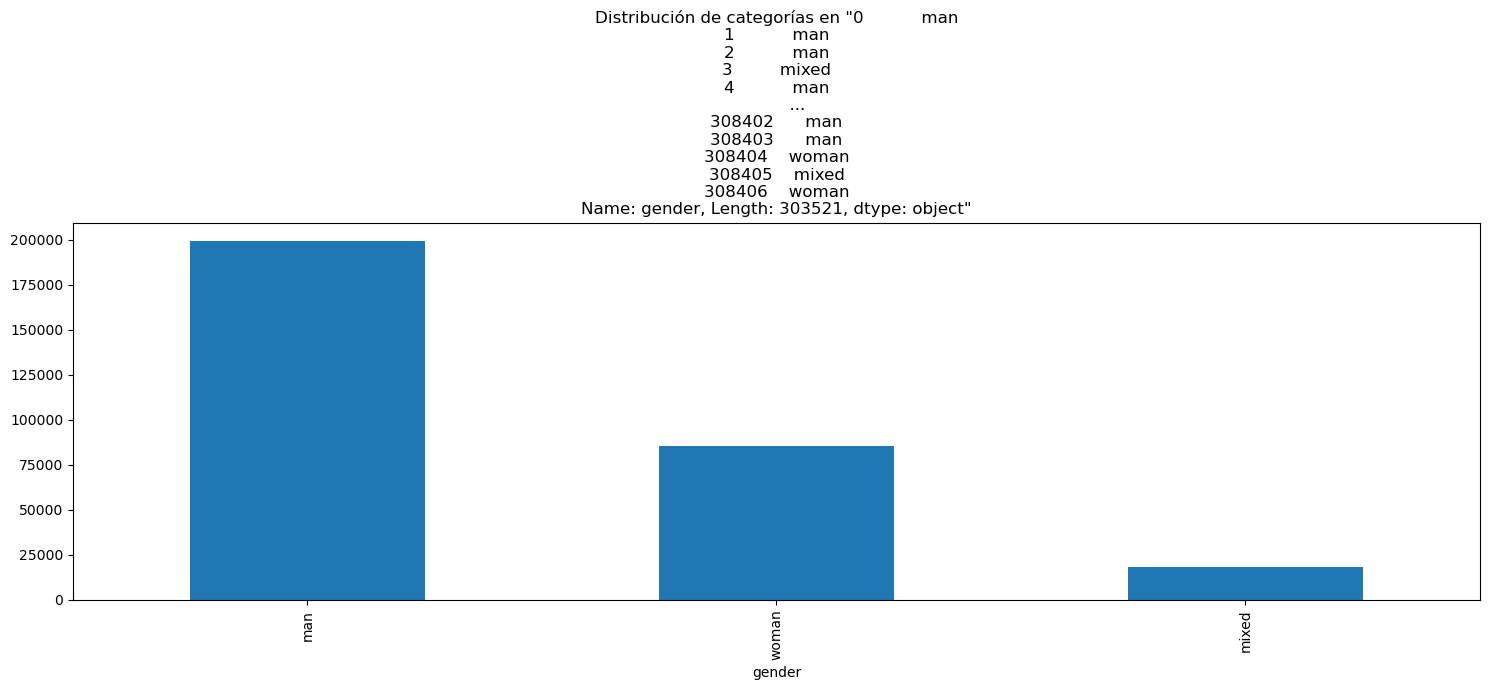

In [86]:
# Grafica para visualizar el resultado final de la columna 'gender'
plt.figure(figsize=(15, 7))
merged_df['gender'].value_counts().plot(kind='bar')
plt.title(f'Distribución de categorías en "{merged_df['gender']}"')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303521 entries, 0 to 308406
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          303521 non-null  int64         
 1   type          303521 non-null  object        
 2   discipline    303521 non-null  object        
 3   event         303521 non-null  object        
 4   athlete_id    303521 non-null  int64         
 5   noc           303521 non-null  object        
 6   team          303521 non-null  object        
 7   place         303521 non-null  int64         
 8   tied          303521 non-null  bool          
 9   medal         303521 non-null  object        
 10  name          303521 non-null  object        
 11  born_date     303521 non-null  datetime64[ns]
 12  born_country  303521 non-null  object        
 13  height_cm     303521 non-null  float64       
 14  weight_kg     303521 non-null  float64       
 15  gender        303521 n

# Reaplicamos graficas para ver el resultado del dataset post-cleaning

### Verificacion de nulls

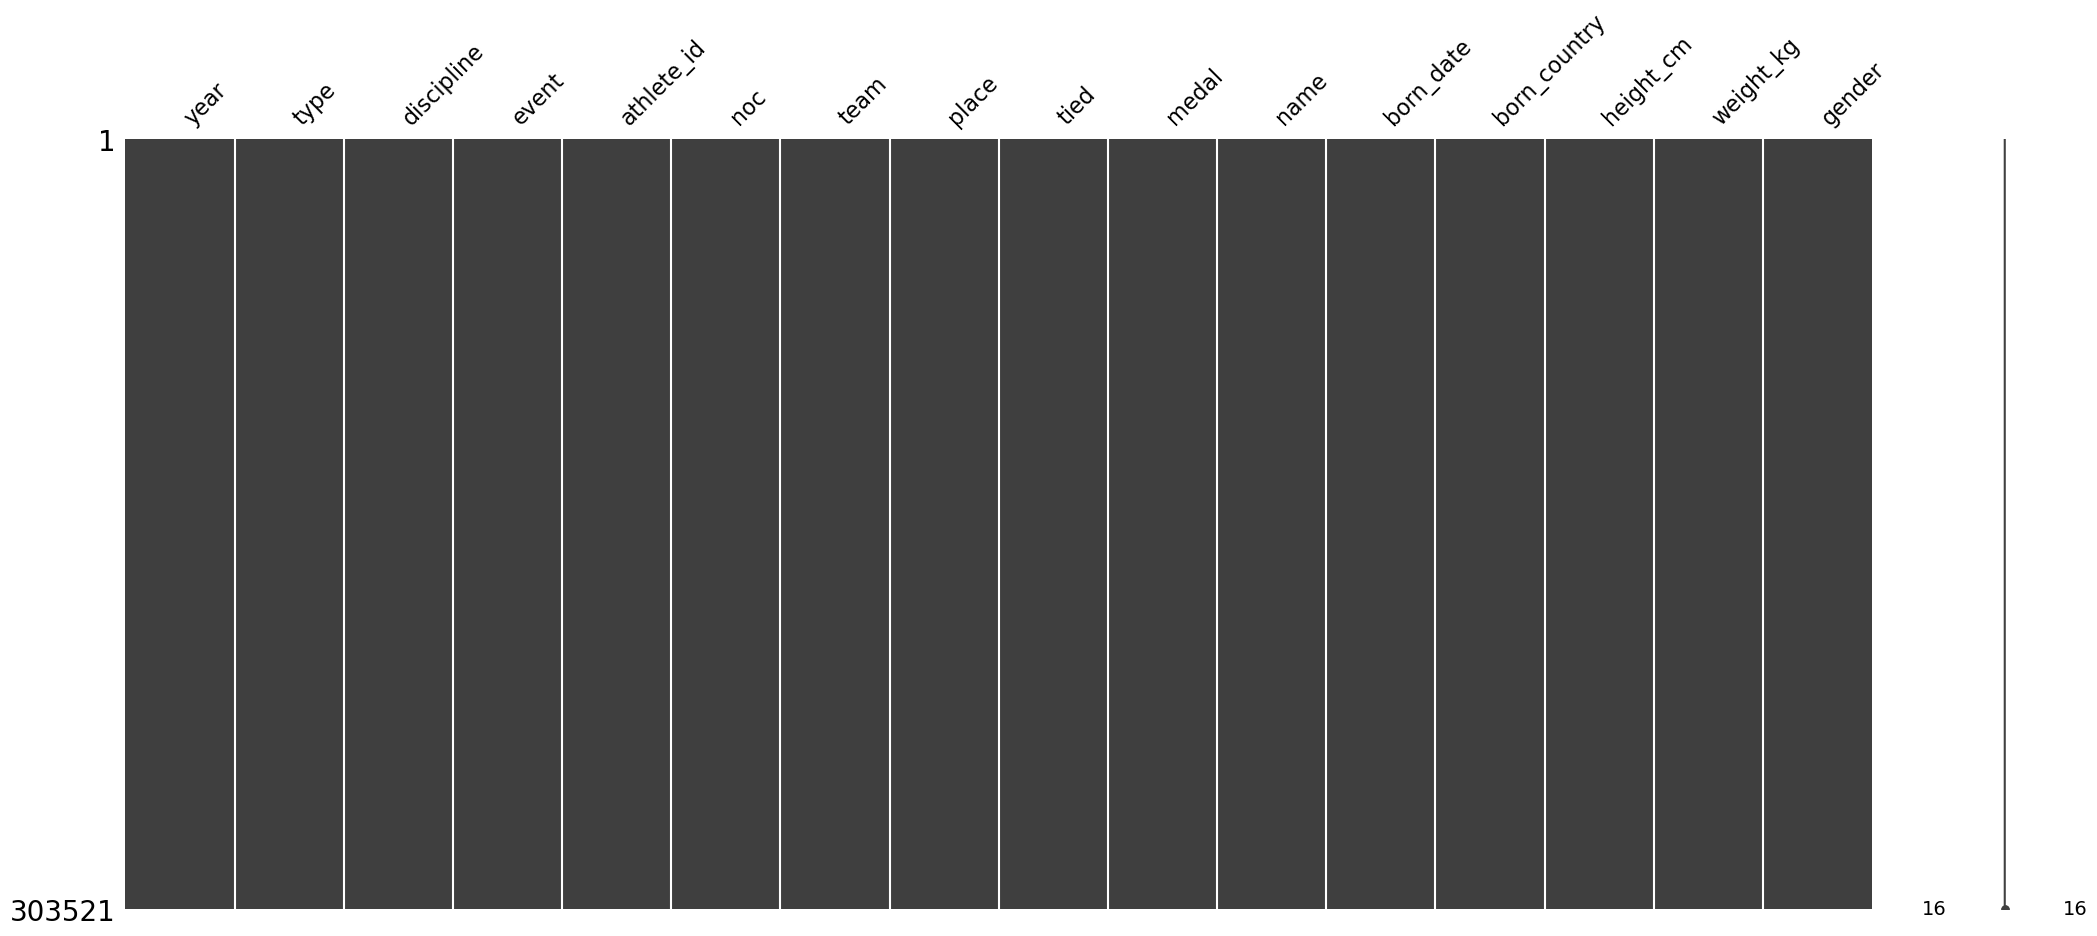

In [90]:
# Verificacion de nulls
df_sorted = merged_df.sort_values('medal', na_position='first')  # Ordenar por la columna 'edad'
msno.matrix(df_sorted)
plt.show()

### Heatmap con variables numericas

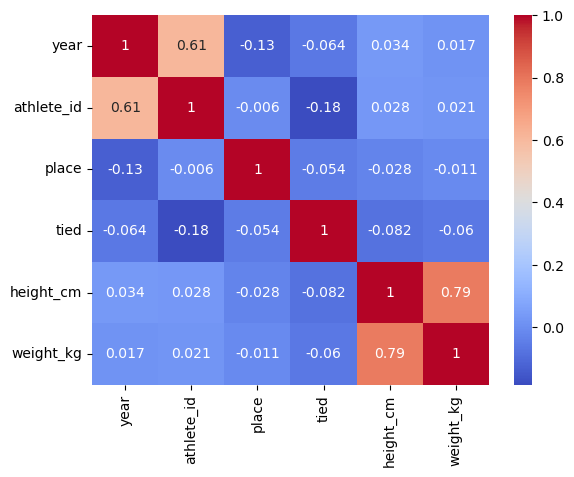

In [92]:
# Heatmap con variables numericas
corr = merged_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Analisis Univariado Numérico

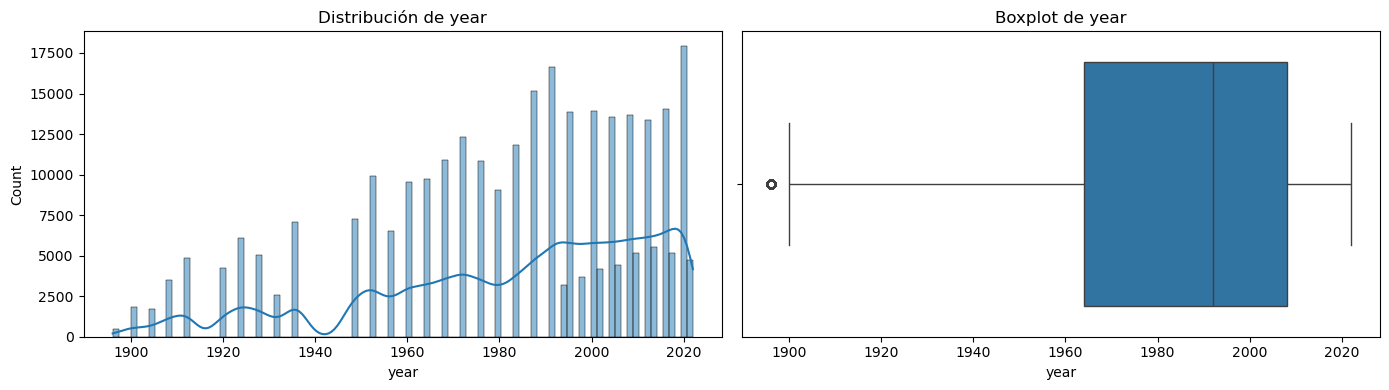

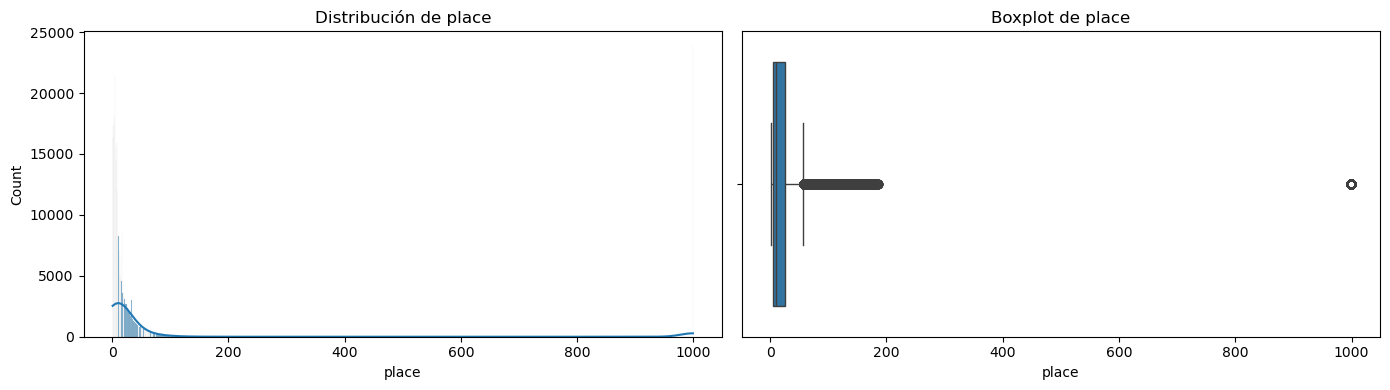

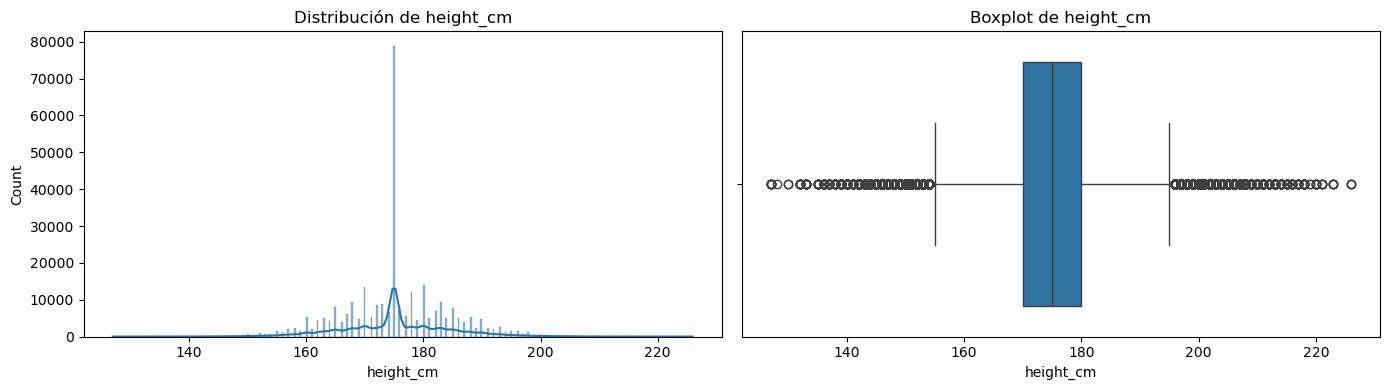

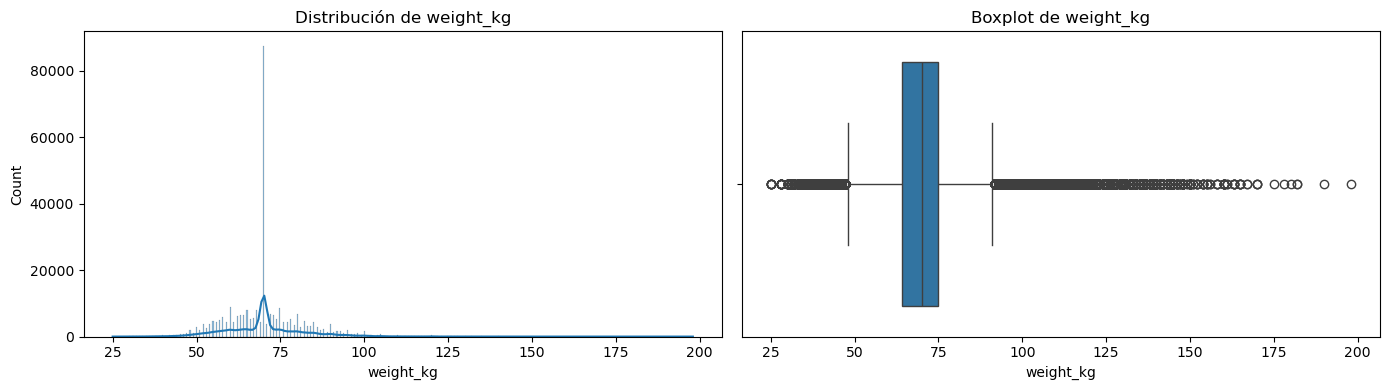

In [94]:
# Analisis Univariado Numérico
# creamos la grafica
numericas = merged_df.select_dtypes(include=np.number).drop(columns='athlete_id')
categoricas = merged_df.select_dtypes(include='object')

# graficas distribucion y boxplot de cada atributo

for col in numericas.columns:
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    # Histograma con KDE
    sns.histplot(numericas[col], kde=True, ax=axs[0])
    axs[0].set_title(f'Distribución de {col}')
    axs[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=numericas[col], ax=axs[1])
    axs[1].set_title(f'Boxplot de {col}')
    axs[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


Valores únicos en type: 2


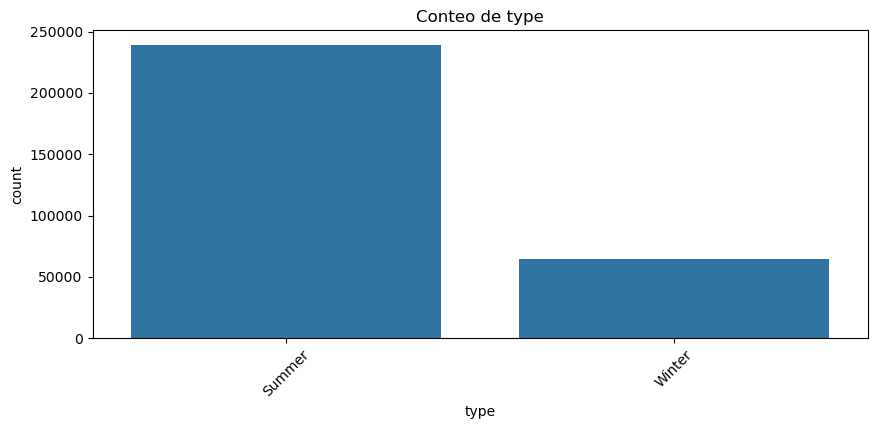


Valores únicos en discipline: 93
Demasiadas categorías para graficar discipline de forma legible.

Valores únicos en event: 1120
Demasiadas categorías para graficar event de forma legible.

Valores únicos en noc: 229
Demasiadas categorías para graficar noc de forma legible.

Valores únicos en team: 19077
Demasiadas categorías para graficar team de forma legible.

Valores únicos en medal: 4


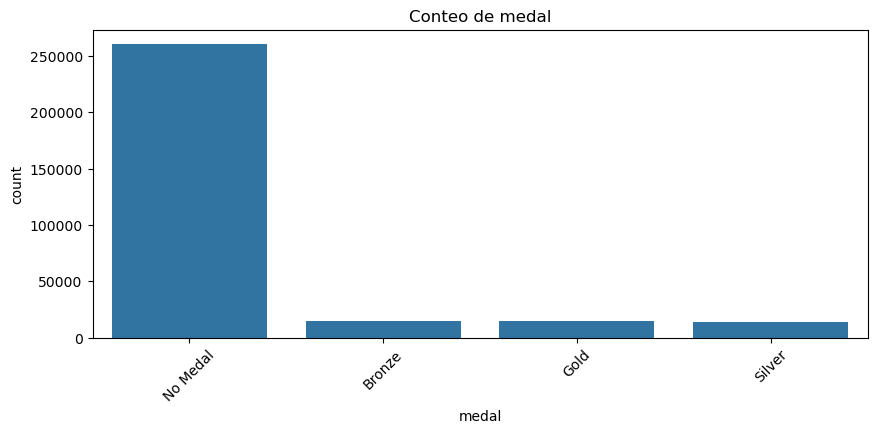


Valores únicos en name: 140465
Demasiadas categorías para graficar name de forma legible.

Valores únicos en born_country: 258
Demasiadas categorías para graficar born_country de forma legible.

Valores únicos en gender: 3


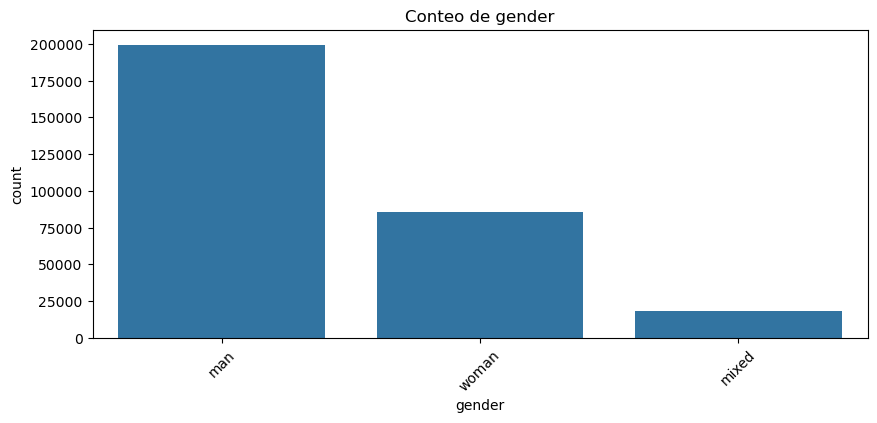

In [95]:
# Analisis Univariado Categórico
for col in categoricas.columns:
        print(f"\nValores únicos en {col}: {merged_df[col].nunique()}")
        if merged_df[col].nunique() <= 20:
            plt.figure(figsize=(10,4))
            sns.countplot(data=merged_df, x=col, order=merged_df[col].value_counts().index)
            plt.title(f'Conteo de {col}')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Demasiadas categorías para graficar {col} de forma legible.")

Columnas después de limpiar NaN: ['type', 'discipline', 'event', 'noc', 'team', 'medal', 'name', 'born_country', 'gender']
Columnas después de eliminar 'Otros' y NaN: ['type', 'discipline', 'event', 'noc', 'team', 'medal', 'name', 'born_country', 'gender']
     type discipline                   event  noc     team     medal name  \
0  Summer        NaN  Singles, Men (Olympic)  FRA  no team  No Medal  NaN   
1  Summer        NaN                     NaN  FRA      NaN  No Medal  NaN   
2  Summer        NaN  Singles, Men (Olympic)  FRA  no team  No Medal  NaN   
3  Summer        NaN                     NaN  FRA      NaN  No Medal  NaN   
4  Summer        NaN                     NaN  FRA      NaN  No Medal  NaN   

  born_country gender  
0          FRA    man  
1          FRA    man  
2          FRA    man  
3          FRA  mixed  
4          FRA    man  


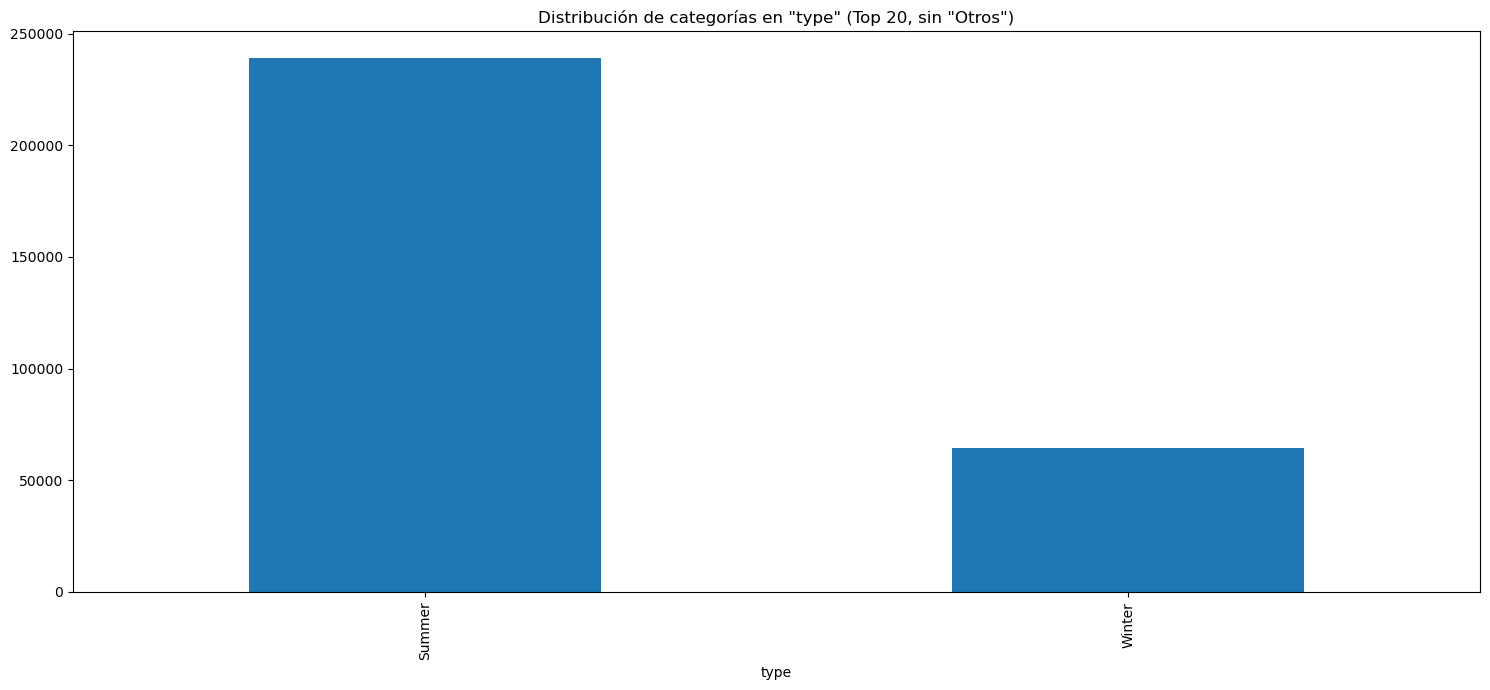

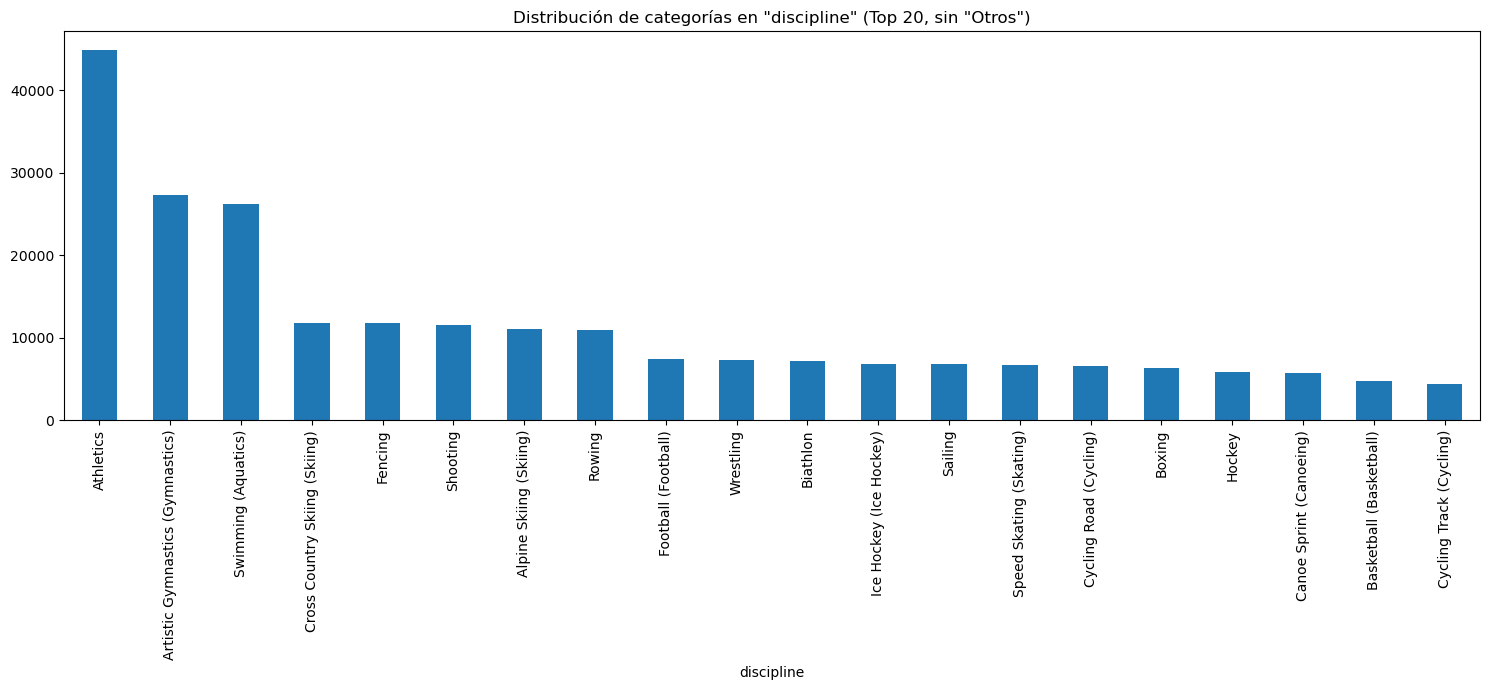

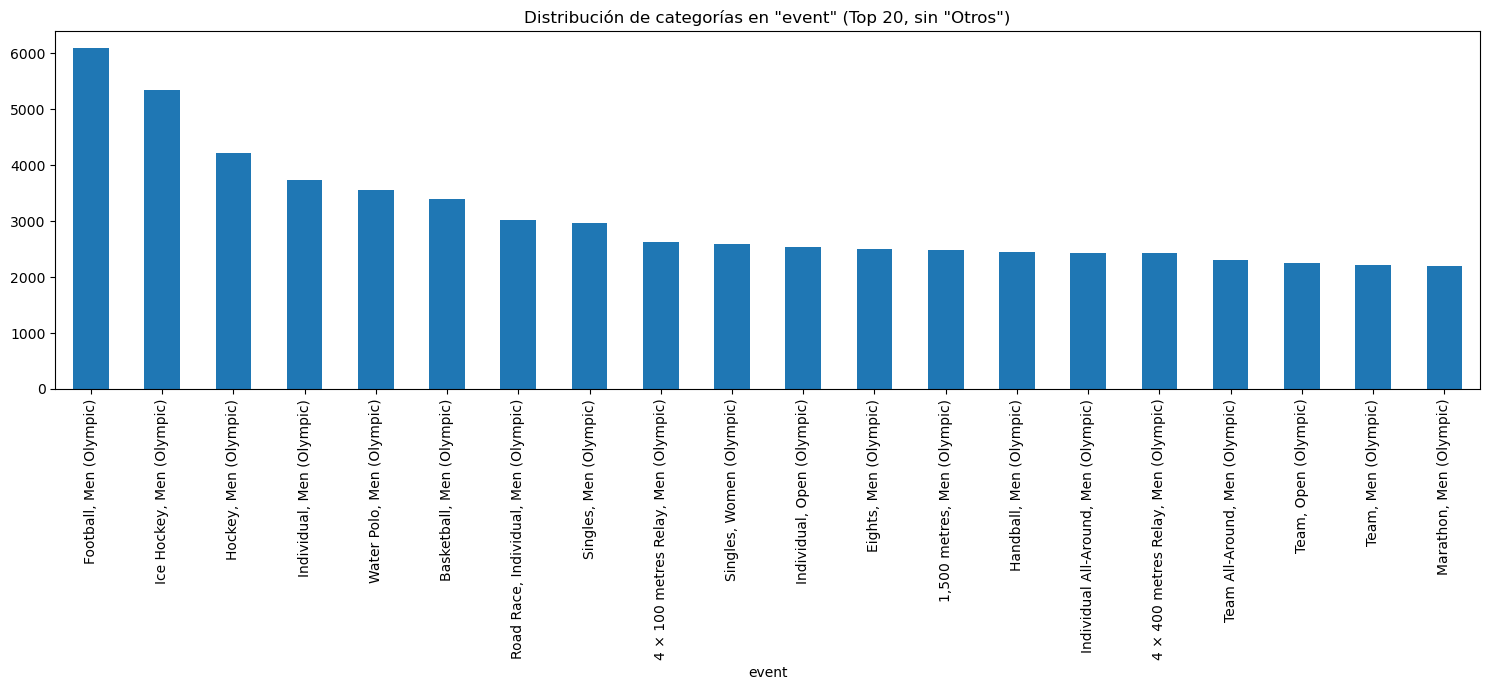

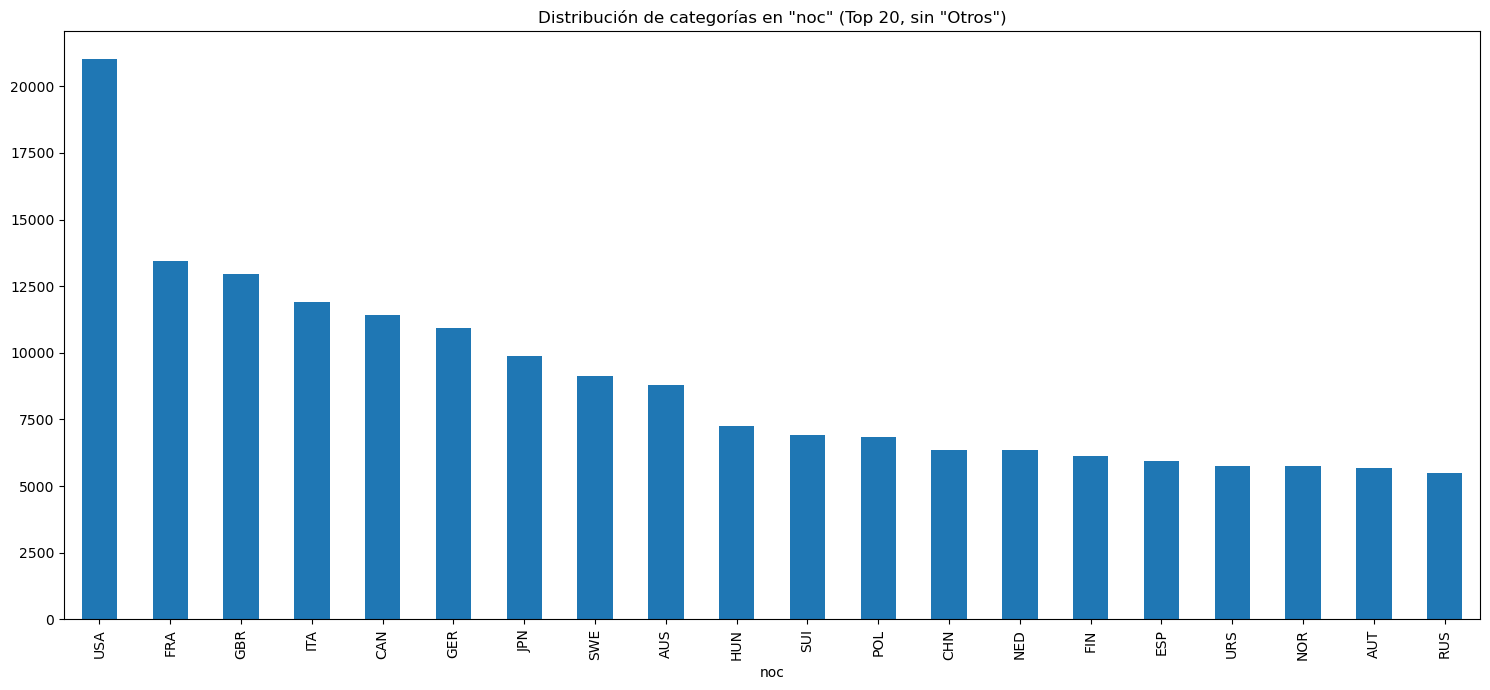

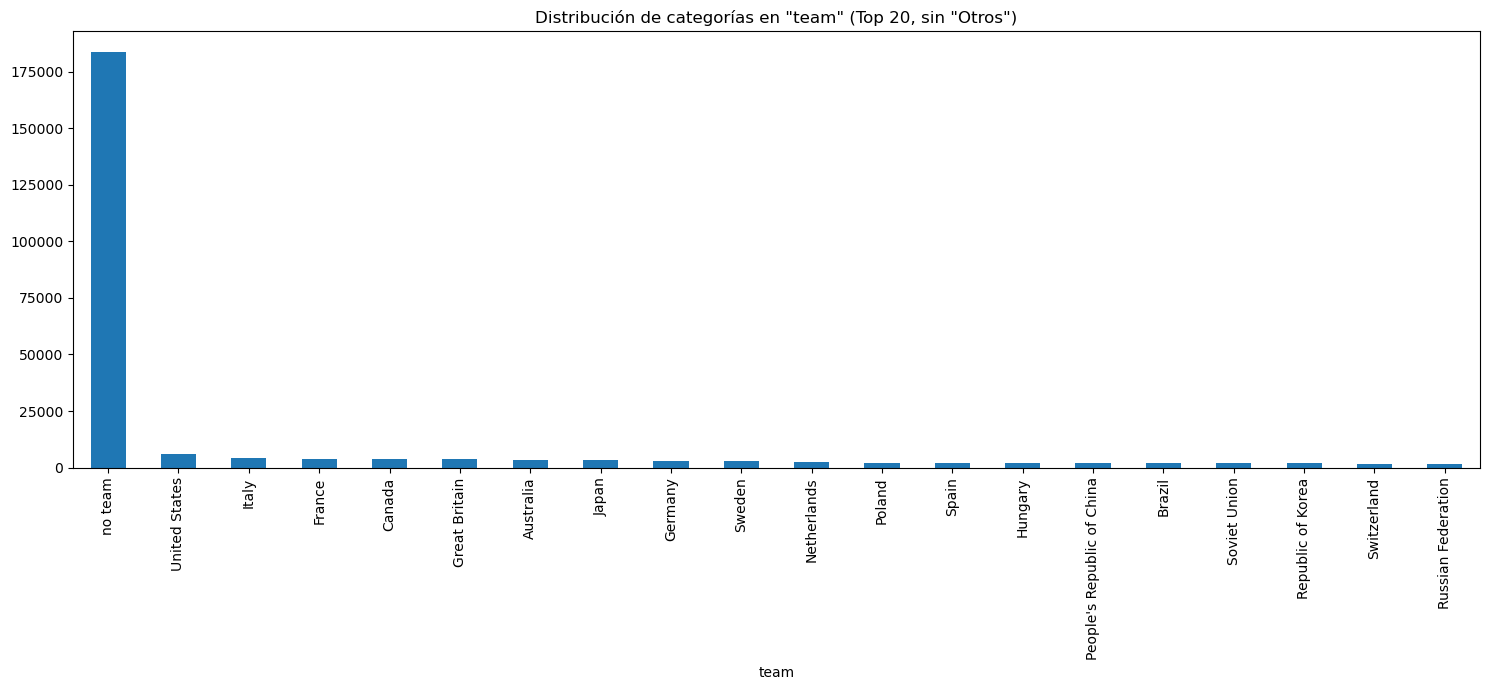

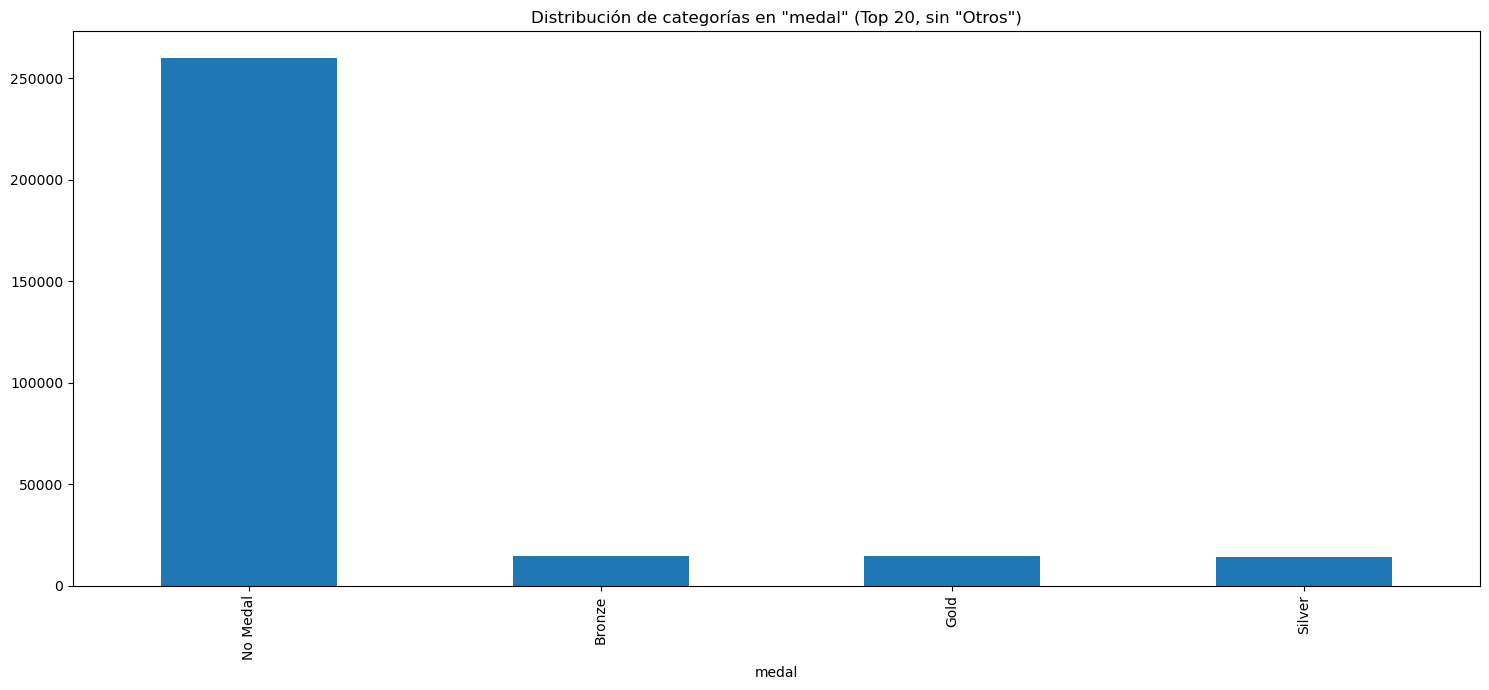

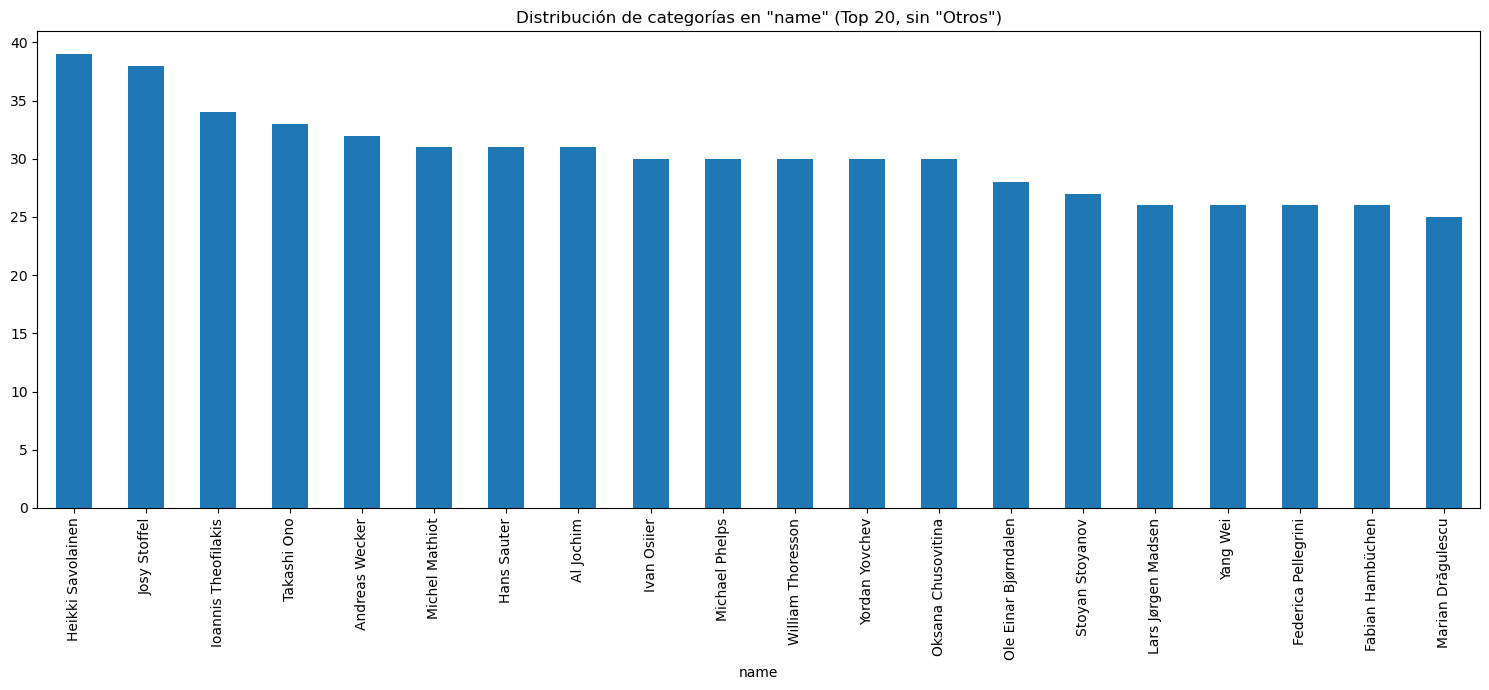

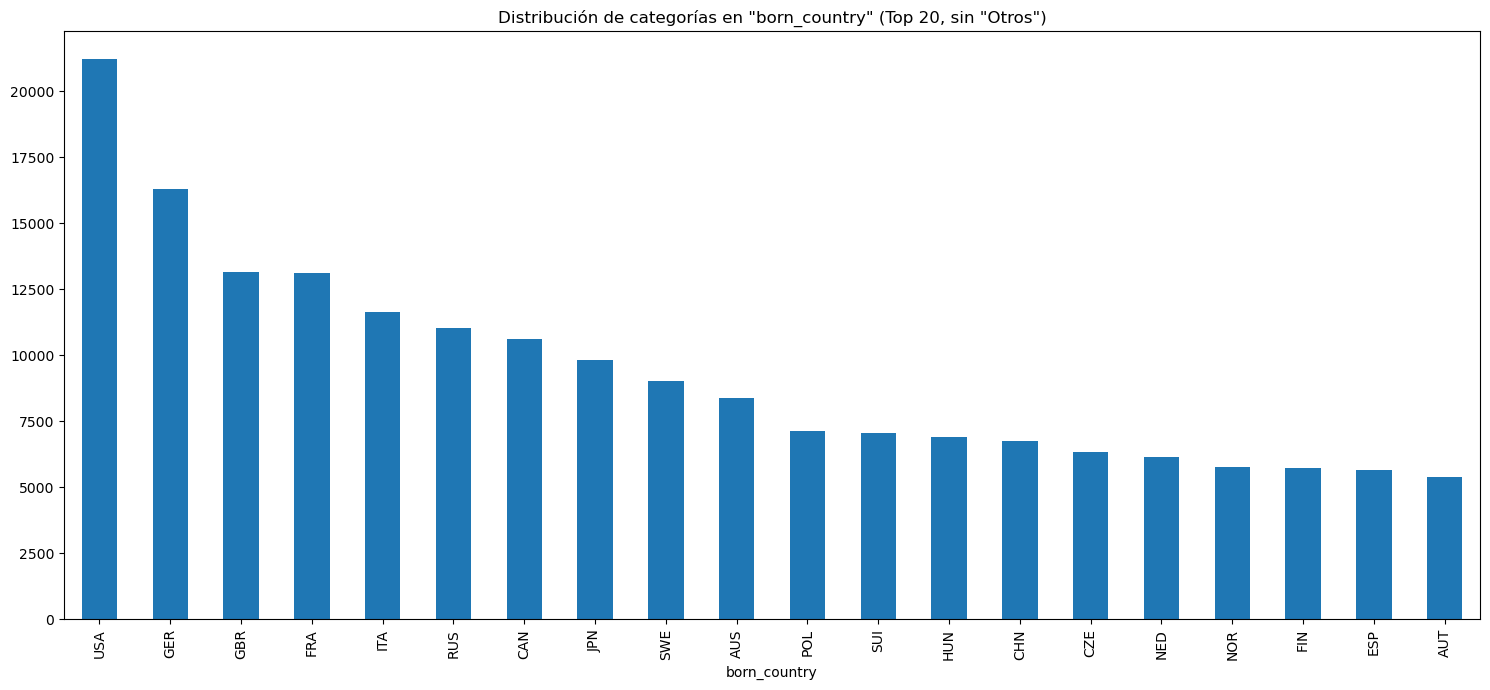

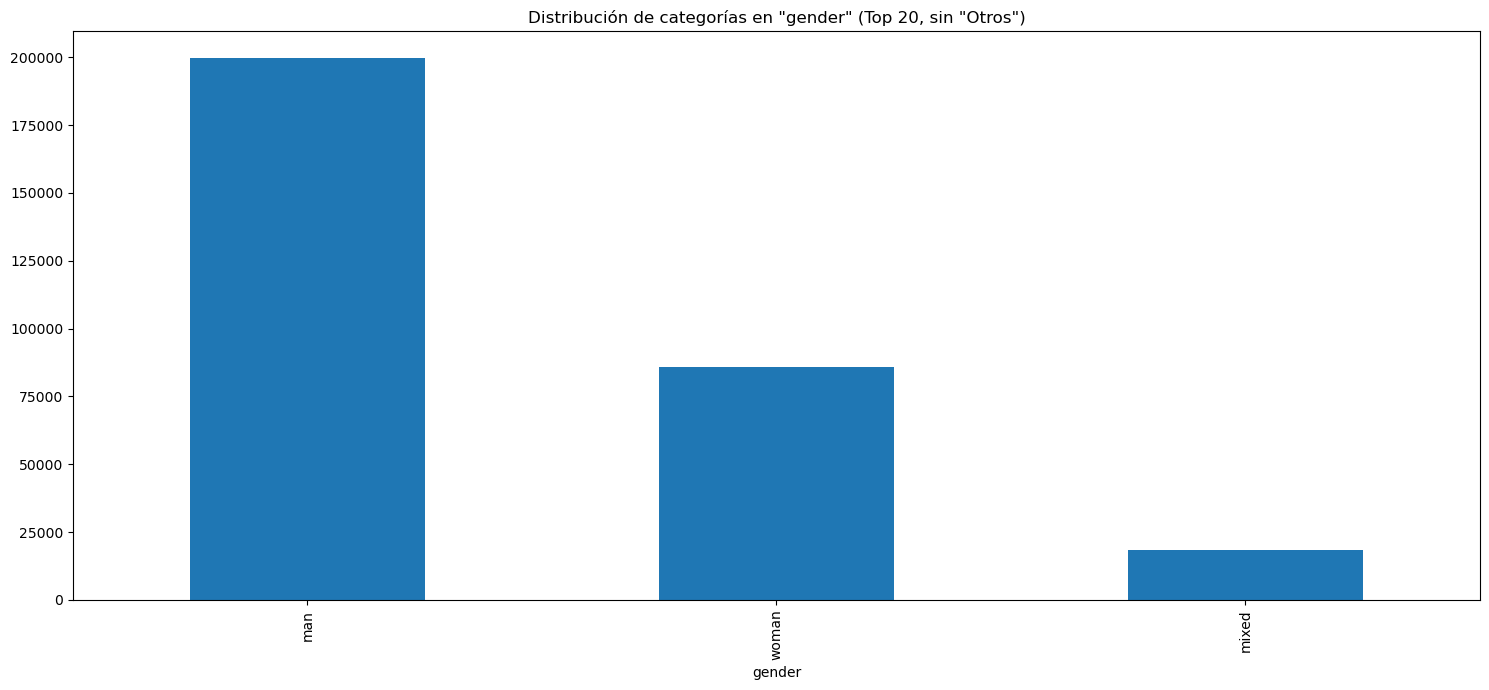

In [96]:
# Continuación
def agrupar_categorias(columna, top_n=10):
    # Obtener las categorías más frecuentes
    top = columna.value_counts().nlargest(top_n).index
    # Filtrar las categorías, manteniendo solo las que están en el top
    columna_filtrada = columna[columna.isin(top)]
    return columna_filtrada

# Aplicar la función de agrupamiento a todas las columnas categóricas
categoricas_filtradas = categoricas.apply(lambda col: agrupar_categorias(col, top_n=20))

# Eliminar columnas que estén completamente vacías o solo tengan NaN
categoricas_filtradas = categoricas_filtradas.dropna(axis=1, how='all')

# Verificar qué columnas quedaron después de eliminar las vacías
print(f"Columnas después de limpiar NaN: {categoricas_filtradas.columns.tolist()}")

# Filtrar "Otros" y eliminar las filas que contienen "Otros"
categoricas_filtradas = categoricas_filtradas.apply(lambda col: col[col != 'Otros'])

# Verificar que las columnas no queden vacías después de filtrar "Otros"
categoricas_filtradas = categoricas_filtradas.dropna(axis=1, how='all')  # Eliminar columnas vacías nuevamente

# Verificamos el contenido después de todas las transformaciones
print(f"Columnas después de eliminar 'Otros' y NaN: {categoricas_filtradas.columns.tolist()}")
print(categoricas_filtradas.head())  # Verificamos algunas filas para revisar los datos

# Graficar solo si hay datos válidos en la columna
for col in categoricas_filtradas.columns:
    if not categoricas_filtradas[col].empty:  # Solo graficamos si la columna no está vacía
        plt.figure(figsize=(15, 7))
        categoricas_filtradas[col].value_counts().plot(kind='bar')
        plt.title(f'Distribución de categorías en "{col}" (Top 20, sin "Otros")')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"La columna '{col}' está vacía después del filtrado y no se graficará.")

## Analisis Bivariado

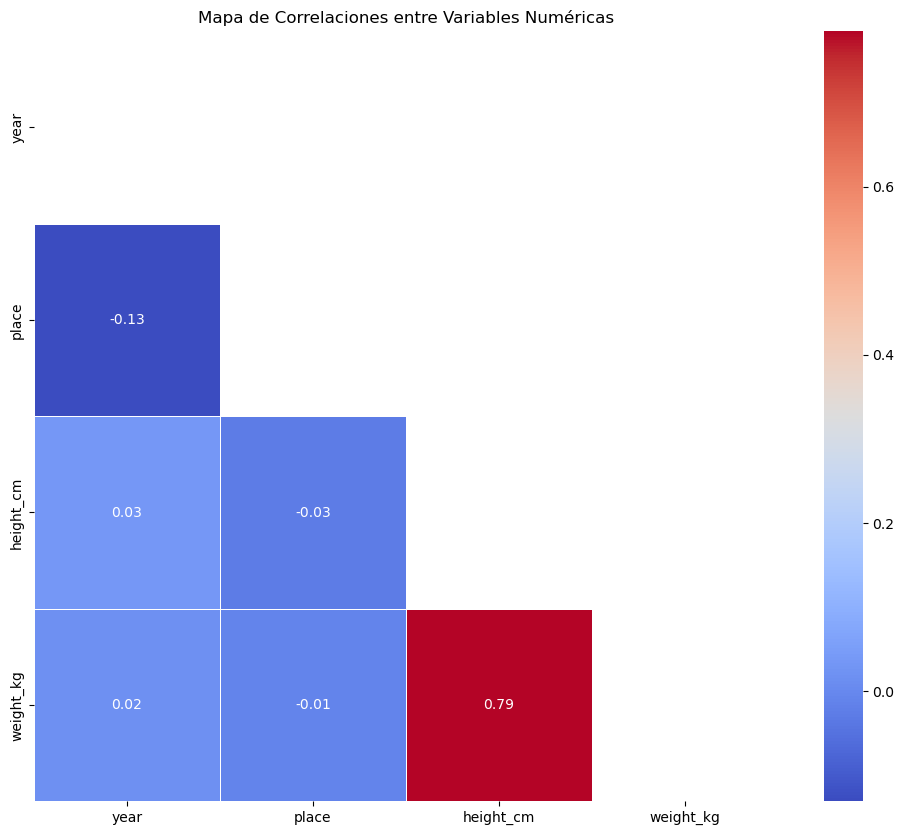

In [98]:
# Analisis bivariado numérico-numérico
corr = numericas.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlaciones entre Variables Numéricas')
plt.show()

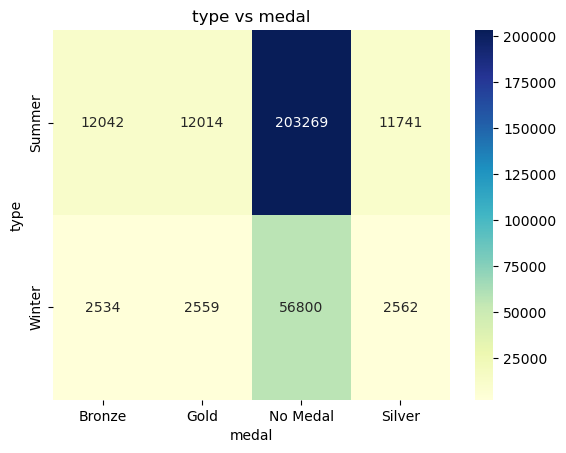

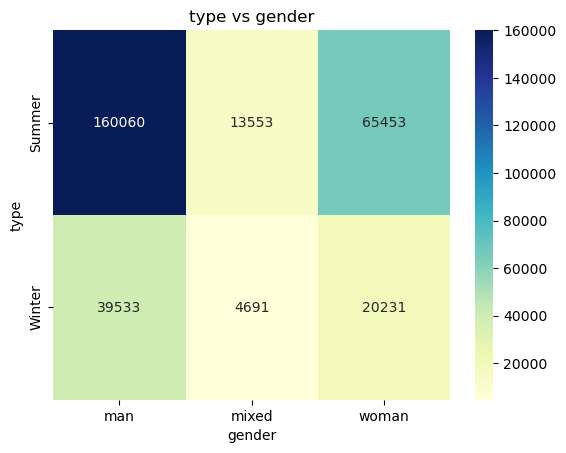

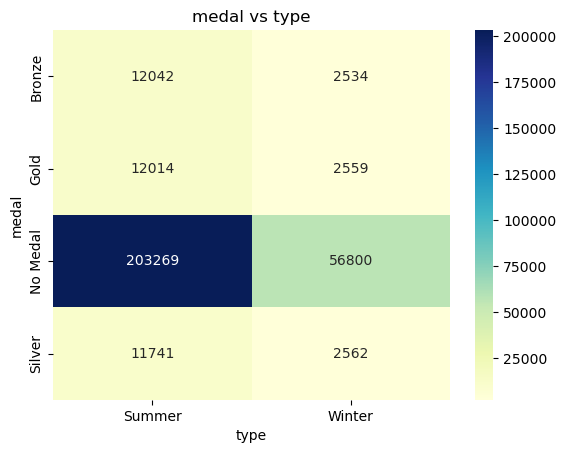

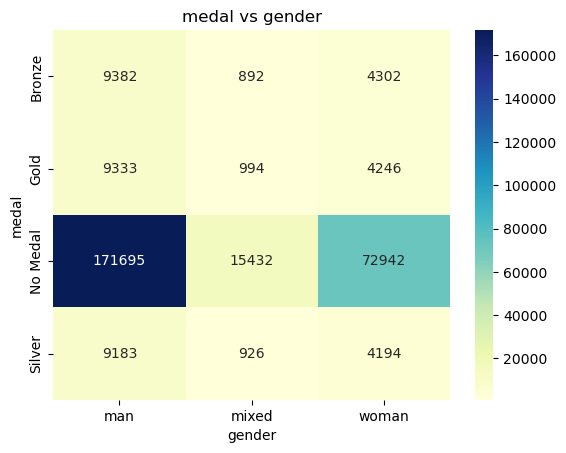

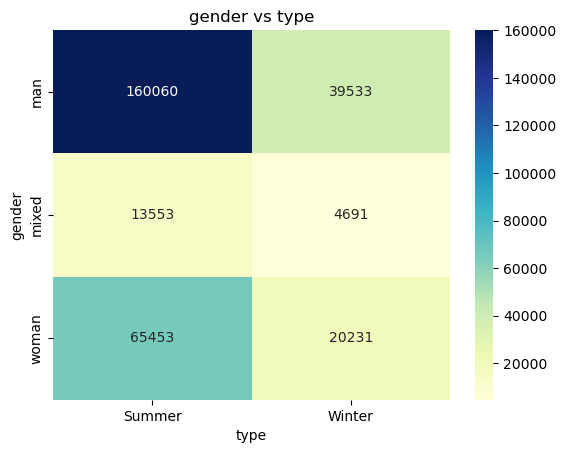

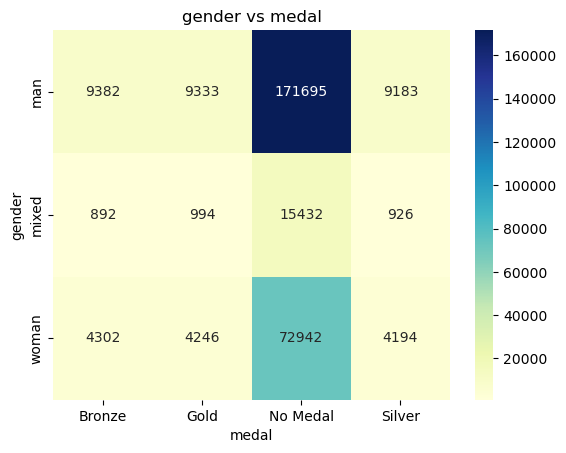

In [99]:
# Analisis bivariado categórico-categórico
for col1 in categoricas.columns:
    for col2 in categoricas.columns:
        if col1 != col2 and merged_df[col1].nunique() <= 50 and merged_df[col2].nunique() <= 50:
            tabla = pd.crosstab(merged_df[col1], merged_df[col2])
            sns.heatmap(tabla, annot=True, fmt="d", cmap="YlGnBu")
            plt.title(f'{col1} vs {col2}')
            plt.show()

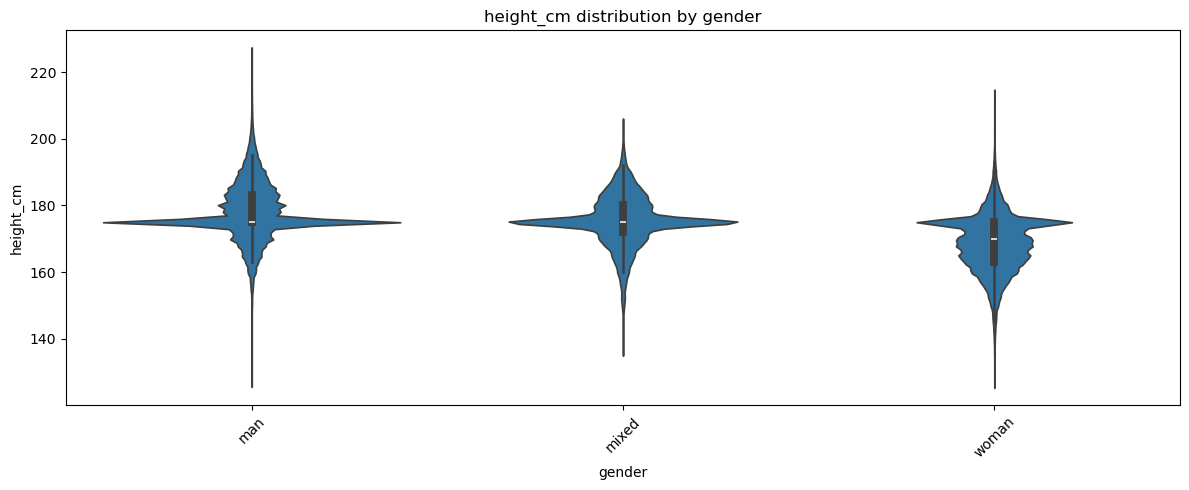

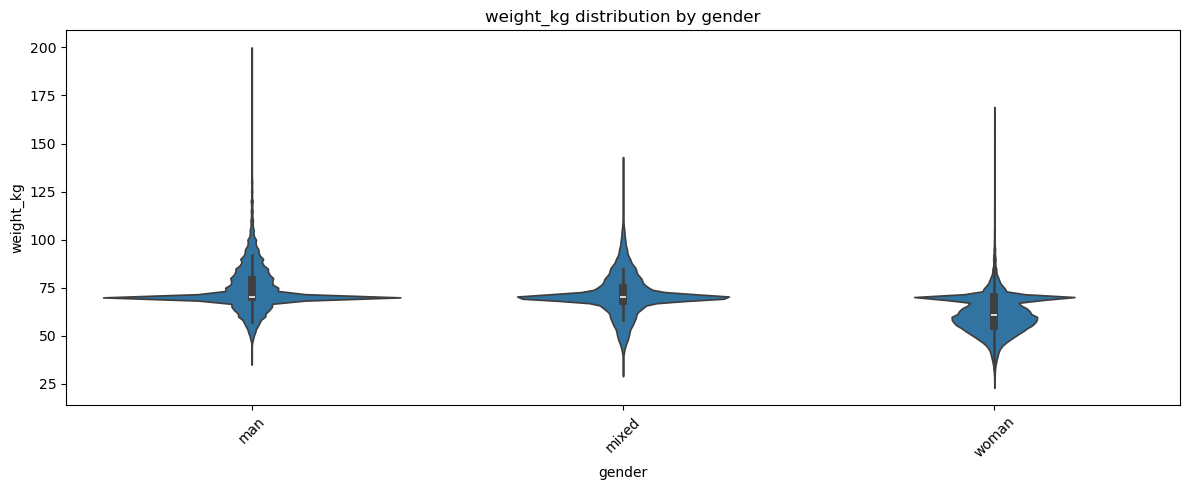

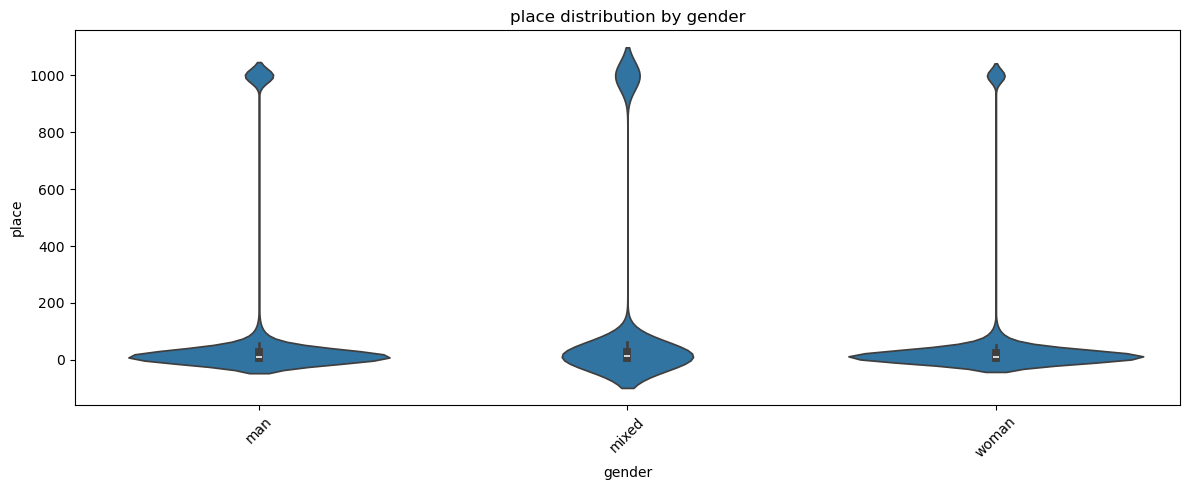

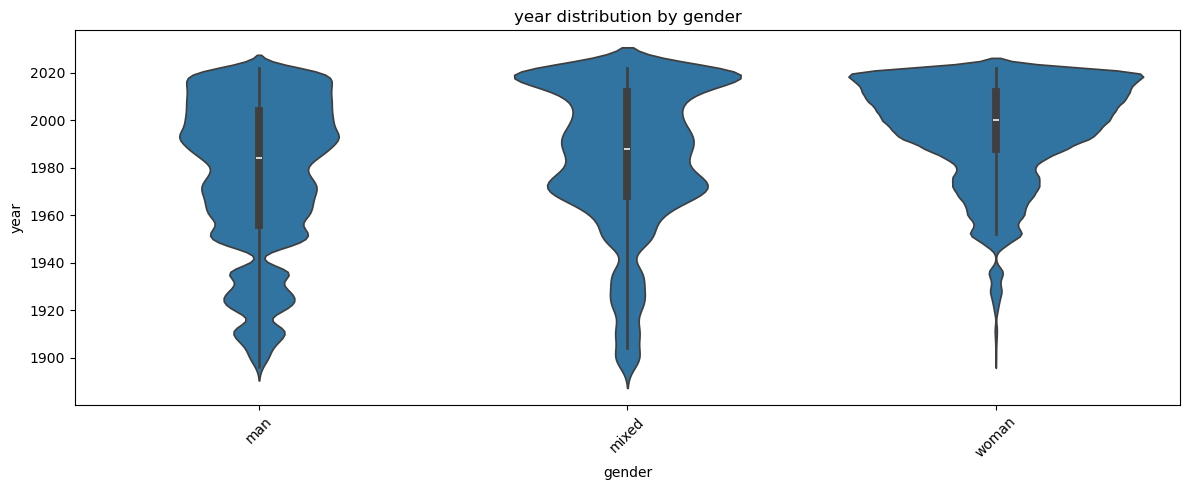

In [100]:
# Analisis bivariado numerico-categorico
var = 'gender'
top_var = merged_df[var].value_counts().head(10).index
df_filtered = merged_df[merged_df[var].isin(top_var)]

for col in ['height_cm', 'weight_kg', 'place', 'year']:
    plt.figure(figsize=(12, 5))
    sns.violinplot(x=var, y=col, data=df_filtered)
    plt.title(f'{col} distribution by {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Analisis Multivariado

In [102]:
# # Si tienes variables categóricas, conviértelas a numéricas para poder calcular la correlación
# df_encoded = pd.get_dummies(merged_df, drop_first=True)

# # Calcular la matriz de correlación
# corr = df_encoded.corr()

# # Crear el heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": .8})
# plt.title("Mapa de Calor de Correlaciones", fontsize=16)
# plt.tight_layout()
# plt.show()

In [103]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303521 entries, 0 to 308406
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          303521 non-null  int64         
 1   type          303521 non-null  object        
 2   discipline    303521 non-null  object        
 3   event         303521 non-null  object        
 4   athlete_id    303521 non-null  int64         
 5   noc           303521 non-null  object        
 6   team          303521 non-null  object        
 7   place         303521 non-null  int64         
 8   tied          303521 non-null  bool          
 9   medal         303521 non-null  object        
 10  name          303521 non-null  object        
 11  born_date     303521 non-null  datetime64[ns]
 12  born_country  303521 non-null  object        
 13  height_cm     303521 non-null  float64       
 14  weight_kg     303521 non-null  float64       
 15  gender        303521 n

In [104]:
print(merged_df.nunique())

year                37
type                 2
discipline          93
event             1120
athlete_id      143127
noc                229
team             19077
place              186
tied                 2
medal                4
name            140465
born_date        41131
born_country       258
height_cm           94
weight_kg          141
gender               3
dtype: int64


In [105]:
# merged_df = pd.DataFrame

# year_df['born_date']

merged_df['age'] = merged_df['year'] - merged_df['born_date'].dt.year

In [106]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303521 entries, 0 to 308406
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          303521 non-null  int64         
 1   type          303521 non-null  object        
 2   discipline    303521 non-null  object        
 3   event         303521 non-null  object        
 4   athlete_id    303521 non-null  int64         
 5   noc           303521 non-null  object        
 6   team          303521 non-null  object        
 7   place         303521 non-null  int64         
 8   tied          303521 non-null  bool          
 9   medal         303521 non-null  object        
 10  name          303521 non-null  object        
 11  born_date     303521 non-null  datetime64[ns]
 12  born_country  303521 non-null  object        
 13  height_cm     303521 non-null  float64       
 14  weight_kg     303521 non-null  float64       
 15  gender        303521 n

In [107]:
merged_df.head(20)

year    type    discipline                     event  athlete_id  noc  \
0   1912  Summer        Tennis    Singles, Men (Olympic)           1  FRA   
1   1912  Summer        Tennis    Doubles, Men (Olympic)           1  FRA   
2   1920  Summer        Tennis    Singles, Men (Olympic)           1  FRA   
3   1920  Summer        Tennis  Doubles, Mixed (Olympic)           1  FRA   
4   1920  Summer        Tennis    Doubles, Men (Olympic)           1  FRA   
5   1996  Summer        Tennis    Singles, Men (Olympic)           2  FRA   
6   1996  Summer        Tennis    Doubles, Men (Olympic)           2  FRA   
7   1924  Summer        Tennis    Singles, Men (Olympic)           3  FRA   
8   1924  Summer        Tennis  Doubles, Mixed (Olympic)           3  FRA   
9   1924  Summer        Tennis    Doubles, Men (Olympic)           3  FRA   
10  1920  Summer        Tennis    Singles, Men (Olympic)           4  FRA   
11  1920  Summer        Tennis    Doubles, Men (Olympic)           4  FRA   
12  1924  Summer        Tennis    Doubles, Men (Olympic)           4  FRA   
13  1912  Summer        Tennis    Singles, Men (Olympic)           5  FRA   
14  1912  Summer        Tennis  Doubles, Mixed (Olympic)           5  FRA   
15  1912  Summer        Tennis    Doubles, Men (Olympic)           5  FRA   
16  1992  Summer  Table Tennis    Singles, Men (Olympic)           6  FRA   
17  1992  Summer  Table Tennis    Doubles, Men (Olympic)           6  FRA   
18  1992  Summer  Table Tennis    Doubles, Men (Olympic)           7  FRA   
19  1996  Summer  Table Tennis    Singles, Men (Olympic)           7  FRA   

                        team  place   tied     medal                   name  \
0                    no team     17   True  No Medal  Jean-François Blanchy   
1             Jean Montariol    999  False  No Medal  Jean-François Blanchy   
2                    no team     32   True  No Medal  Jean-François Blanchy   
3            Jeanne Vaussard      8   True  No Medal  Jean-François Blanchy   
4            Jacques Brugnon      4  False  No Medal  Jean-François Blanchy   
5                    no team     17   True  No Medal         Arnaud Boetsch   
6            Guillaume Raoux     17   True  No Medal         Arnaud Boetsch   
7                    no team      4  False  No Medal           Jean Borotra   
8         Marguerite Billout     15   True  No Medal           Jean Borotra   
9               René Lacoste      3  False    Bronze           Jean Borotra   
10                   no team      9   True  No Medal        Jacques Brugnon   
11     Jean-François Blanchy      4  False  No Medal        Jacques Brugnon   
12              Henri Cochet      2  False    Silver        Jacques Brugnon   
13                   no team     17   True  No Medal           Albert Canet   
14      Marguerite Broquedis      3  False    Bronze           Albert Canet   
15  Édouard Mény de Marangue      3  False    Bronze           Albert Canet   
16                   no team     33   True  No Medal      Nicolas Chatelain   
17             Patrick Chila     17   True  No Medal      Nicolas Chatelain   
18         Nicolas Chatelain     17   True  No Medal          Patrick Chila   
19                   no team      9   True  No Medal          Patrick Chila   

    born_date born_country  height_cm  weight_kg gender  age  
0  1886-12-12          FRA      175.0       70.0    man   26  
1  1886-12-12          FRA      175.0       70.0    man   26  
2  1886-12-12          FRA      175.0       70.0    man   34  
3  1886-12-12          FRA      175.0       70.0  mixed   34  
4  1886-12-12          FRA      175.0       70.0    man   34  
5  1969-04-01          FRA      183.0       76.0    man   27  
6  1969-04-01          FRA      183.0       76.0    man   27  
7  1898-08-13          FRA      183.0       76.0    man   26  
8  1898-08-13          FRA      183.0       76.0  mixed   26  
9  1898-08-13          FRA      183.0       76.0    man   26  
10 1895-05-11          FRA      1

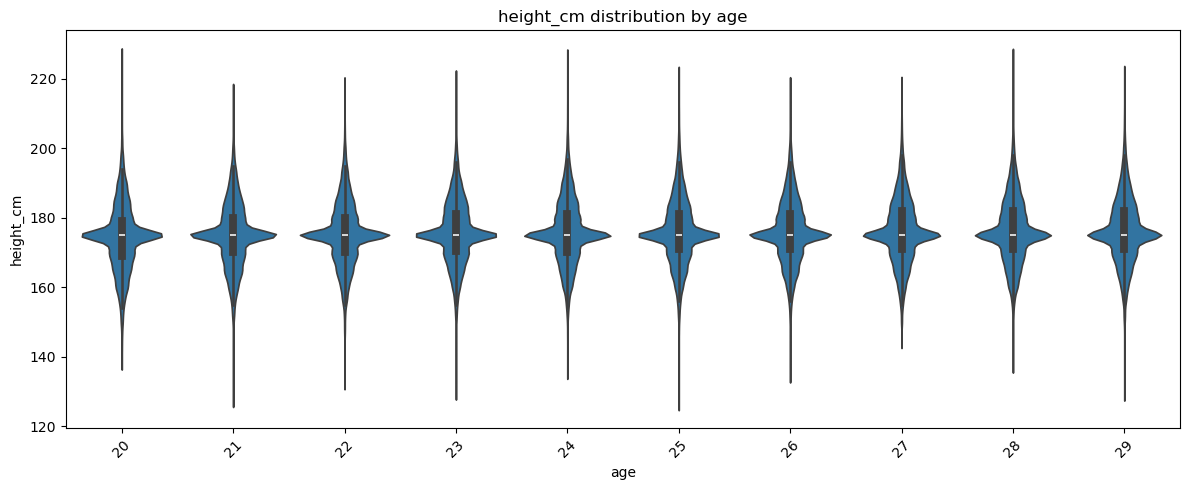

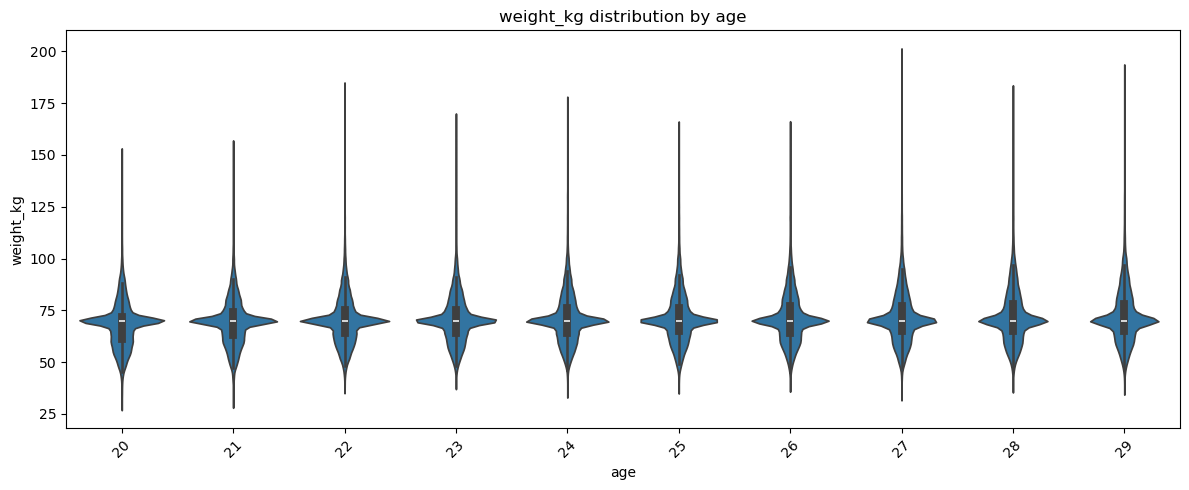

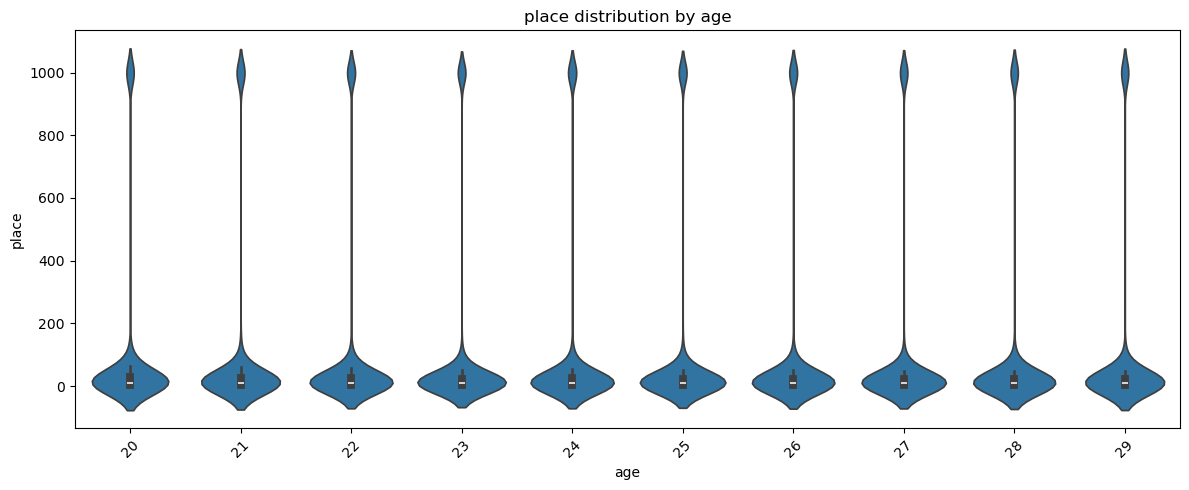

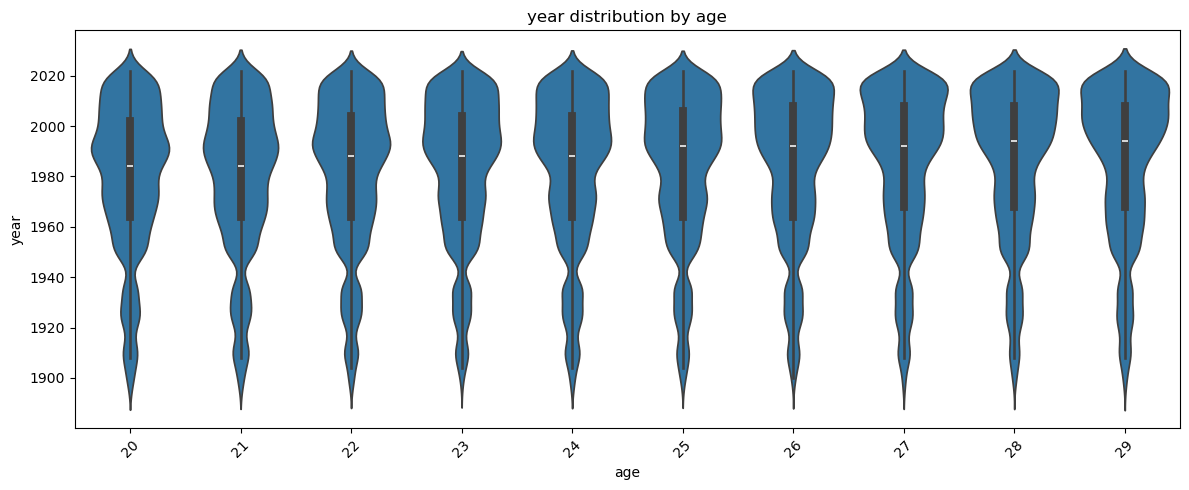

In [108]:
# Analisis bivariado numerico-categorico
var = 'age'
top_var = merged_df[var].value_counts().head(10).index
df_filtered = merged_df[merged_df[var].isin(top_var)]

for col in ['height_cm', 'weight_kg', 'place', 'year']:
    plt.figure(figsize=(12, 5))
    sns.violinplot(x=var, y=col, data=df_filtered)
    plt.title(f'{col} distribution by {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

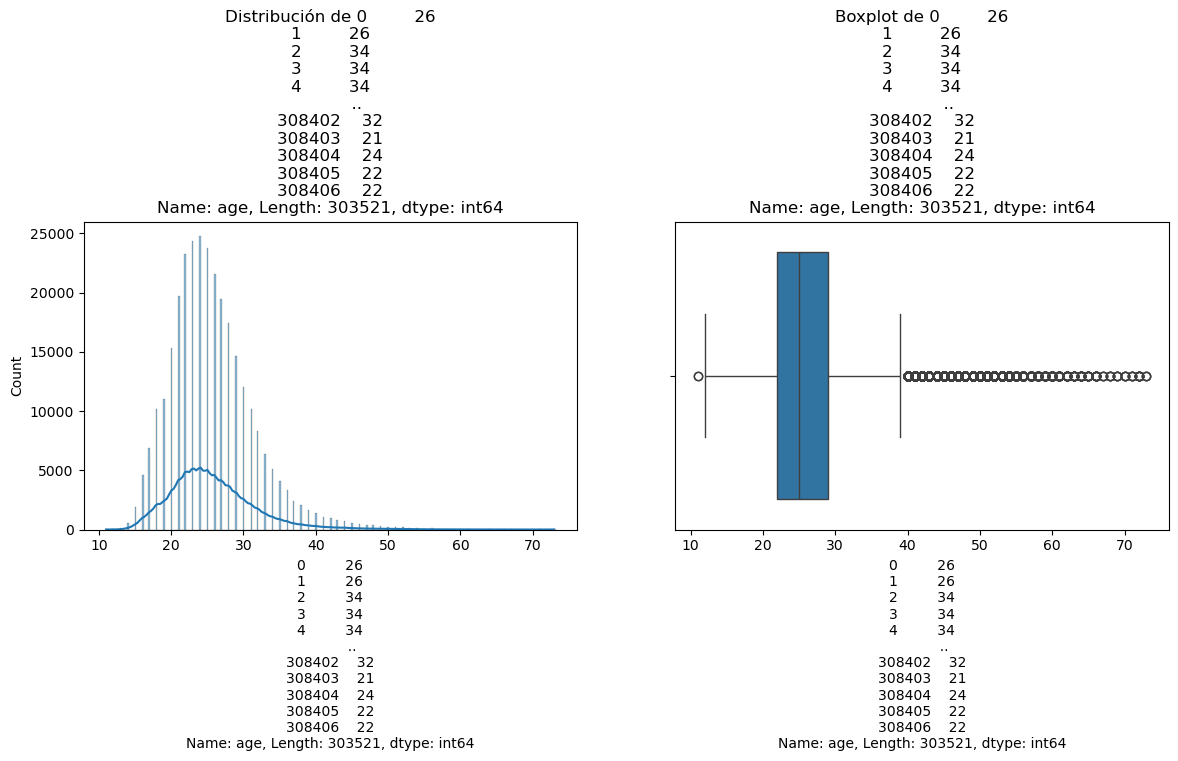

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Histograma con KDE
sns.histplot(merged_df['age'], kde=True, ax=axs[0])
axs[0].set_title(f'Distribución de {merged_df['age']}')
axs[0].set_xlabel(merged_df['age'])

# Boxplot
sns.boxplot(x=merged_df['age'], ax=axs[1])
axs[1].set_title(f'Boxplot de {merged_df['age']}')
axs[1].set_xlabel(merged_df['age'])

plt.tight_layout()
plt.show()

In [110]:
merged_df.describe()

year     athlete_id          place  \
count  303521.000000  303521.000000  303521.000000   
mean     1982.665147   72971.881020      93.444954   
min      1896.000000       1.000000       1.000000   
25%      1964.000000   34697.000000       5.000000   
50%      1992.000000   74041.000000      10.000000   
75%      2008.000000  107379.000000      26.000000   
max      2022.000000  148985.000000     999.000000   
std        30.610776   41371.646534     265.220426   

                           born_date      height_cm      weight_kg  \
count                         303521  303521.000000  303521.000000   
mean   1957-06-13 14:57:18.989723968     175.270294      70.409728   
min              1828-10-25 00:00:00     127.000000      25.000000   
25%              1939-04-07 00:00:00     170.000000      64.000000   
50%              1965-07-01 00:00:00     175.000000      70.000000   
75%              1981-08-19 00:00:00     180.000000      75.000000   
max              2009-01-01 00:00:00     226.000000     198.000000   
std                              NaN       9.225240      12.248505   

                 age  
count  303521.000000  
mean       25.692944  
min        11.000000  
25%        22.000000  
50%        25.000000  
75%        29.000000  
max        73.000000  
std         5.923085

In [111]:
# age, weight, height, type, gender, noc, discipline, medals
# print(merged_df.nunique())

# multivar_df = merged_df[['age', 'type', 'gender', 'medal', 'weight_kg', 'height_cm']]

# Filtramos registros que tienen medalla válida
multivar_df = merged_df[merged_df['medal'].str.lower().isin(['gold', 'silver', 'bronze'])][['age', 'type', 'gender', 'medal', 'weight_kg', 'height_cm']]


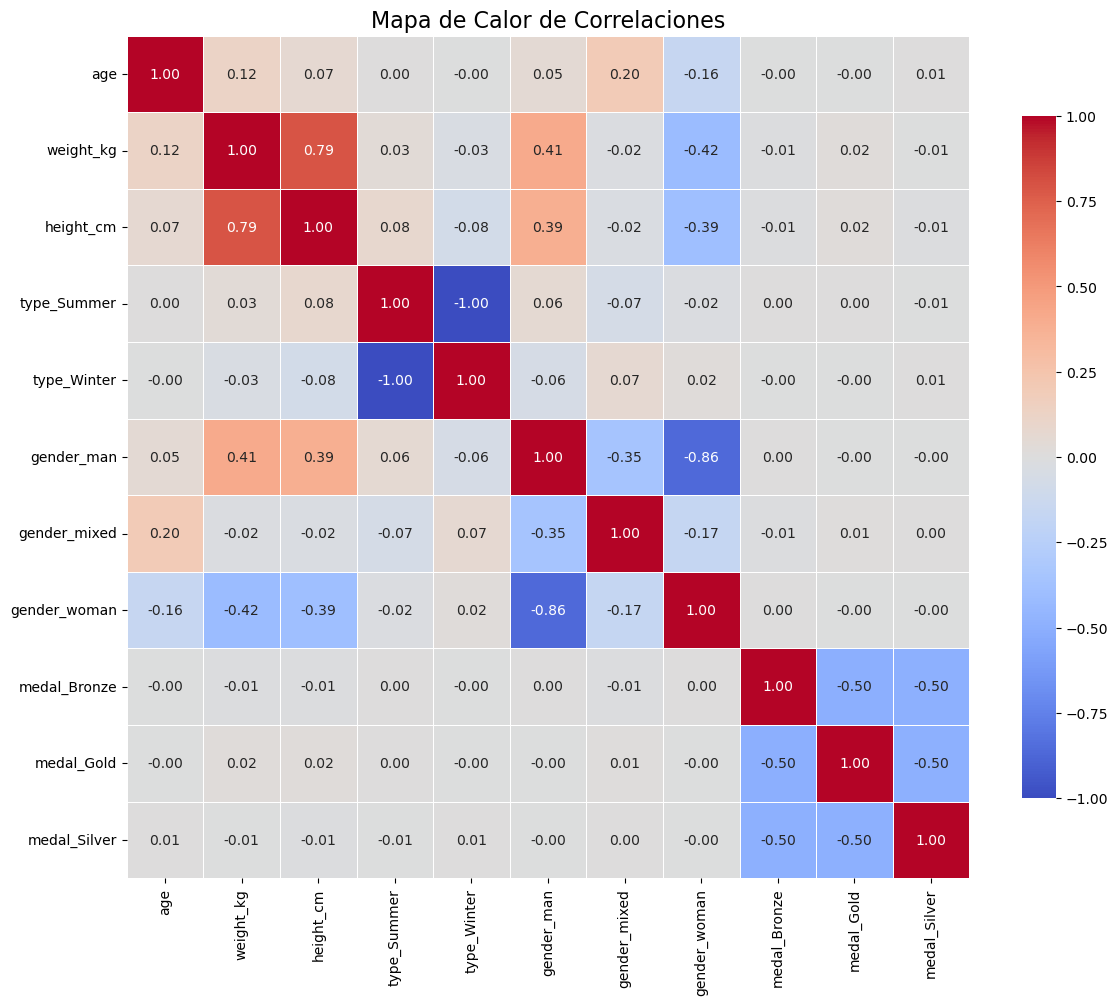

In [112]:
# # # Si tienes variables categóricas, conviértelas a numéricas para poder calcular la correlación
df_encoded = pd.get_dummies(multivar_df, drop_first=False)



# Calcular la matriz de correlación
corr = df_encoded.corr()

# Crear el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Mapa de Calor de Correlaciones", fontsize=16)
plt.tight_layout()
plt.show()

In [114]:
# year                37
# type                 2
# discipline          93
# event             1120
# athlete_id      143127
# noc                229
# team             19077
# place              186
# tied                 2
# medal                4
# name            140465
# born_date        41131
# born_country       258
# height_cm           94
# weight_kg          141
# gender               3

In [120]:
## ssubdividir discipline:

## Define un diccionario de agrupación:

agrupaciones = {
'Cycling': [
    'Cycling Road (Cycling)', 'Cycling Track (Cycling)', 'Cycling Mountain Bike (Cycling)',
    'Cycling BMX Racing (Cycling)', 'Cycling BMX Freestyle (Cycling)', 'Bicycle Polo (Cycling)'
],
'Aquatics': [
    'Swimming (Aquatics)', 'Diving (Aquatics)', 'Water Polo (Aquatics)',
    'Artistic Swimming (Aquatics)', 'Marathon Swimming (Aquatics)'
],
'Gymnastics': [
    'Artistic Gymnastics (Gymnastics)', 'Rhythmic Gymnastics (Gymnastics)',
    'Trampolining (Gymnastics)'
],
'Equestrian': [
    'Equestrian Dressage (Equestrian)', 'Equestrian Eventing (Equestrian)',
    'Equestrian Jumping (Equestrian)', 'Equestrian Vaulting (Equestrian)',
    'Equestrian Driving (Equestrian)'
],
'Skating': [
    'Figure Skating (Skating)', 'Short Track Speed Skating (Skating)',
    'Speed Skating (Skating)'
],
'Skiing & Snow': [
    'Alpine Skiing (Skiing)', 'Cross Country Skiing (Skiing)', 'Freestyle Skiing (Skiing)',
    'Military Ski Patrol (Skiing)', 'Nordic Combined (Skiing)', 'Ski Jumping (Skiing)',
    'Snowboarding (Skiing)', 'Speed Skiing (Skiing)', 'Ski Mountaineering'
],
'Combat Sports': [
    'Boxing', 'Judo', 'Wrestling', 'Taekwondo', 'Karate', 'Savate'
],
'Team Sports': [
    'Basketball (Basketball)', '3x3 Basketball (Basketball)', 'Volleyball (Volleyball)',
    'Beach Volleyball (Volleyball)', 'Handball', 'Football (Football)', 'Hockey',
    'Hockey 5s', 'Ice Hockey (Ice Hockey)', '3-on-3 Ice Hockey (Ice Hockey)', 'Bandy',
    'Polo', 'Lacrosse', 'Rugby (Rugby)', 'Rugby Sevens (Rugby)', 'Australian Rules Football'
],
'Raquet Sports': [
    'Tennis', 'Table Tennis', 'Badminton', 'Jeu De Paume', 'Racquets'
],
'Martial Arts': ['Glíma'],
'Shooting & Archery': ['Shooting', 'Archery'],
'Weight & Strength': ['Weightlifting'],
'Climbing & Extreme': ['Sport Climbing', 'Skateboarding (Roller Sports)', 'Roller Skating (Roller Sports)'],
'Artistic & Cultural': ['Art Competitions'],
'Equipped Sports': ['Modern Pentathlon', 'Triathlon', 'Canoe Sprint (Canoeing)',
                    'Canoe Slalom (Canoeing)', 'Canoe Marathon (Canoeing)', 'Rowing',
                    'Sailing', 'Bobsleigh (Bobsleigh)', 'Skeleton (Bobsleigh)', 'Luge'],
'Winter Mixed Events': ['Winter Pentathlon', 'Biathlon'],
'Motor & Air': ['Motorboating', 'Ballooning (Air Sports)'],
'Baseball & Softball': ['Baseball (Baseball/Softball)', 'Softball (Baseball/Softball)'],
'Other': [
    'Golf', 'Tug-Of-War', 'Croquet', 'Cricket', 'Basque pelota',
    'Mixed Sports', 'Roque', 'Unknown', 'nan'
]
}


## Crear una función para aplicar esa agrupación:
def agrupar_disciplina(discipline):
    if pd.isna(discipline):
        return 'Unknown'
    for grupo, lista in agrupaciones.items():
        if discipline in lista:
            return grupo
        return 'Other'

In [122]:
merged_df['discipline_grouped'] = merged_df['discipline'].apply(agrupar_disciplina)


In [124]:
merged_df.head()


year    type discipline                     event  athlete_id  noc  \
0  1912  Summer     Tennis    Singles, Men (Olympic)           1  FRA   
1  1912  Summer     Tennis    Doubles, Men (Olympic)           1  FRA   
2  1920  Summer     Tennis    Singles, Men (Olympic)           1  FRA   
3  1920  Summer     Tennis  Doubles, Mixed (Olympic)           1  FRA   
4  1920  Summer     Tennis    Doubles, Men (Olympic)           1  FRA   

              team  place   tied     medal                   name  born_date  \
0          no team     17   True  No Medal  Jean-François Blanchy 1886-12-12   
1   Jean Montariol    999  False  No Medal  Jean-François Blanchy 1886-12-12   
2          no team     32   True  No Medal  Jean-François Blanchy 1886-12-12   
3  Jeanne Vaussard      8   True  No Medal  Jean-François Blanchy 1886-12-12   
4  Jacques Brugnon      4  False  No Medal  Jean-François Blanchy 1886-12-12   

  born_country  height_cm  weight_kg gender  age discipline_grouped  
0          FRA      175.0       70.0    man   26              Other  
1          FRA      175.0       70.0    man   26              Other  
2          FRA      175.0       70.0    man   34              Other  
3          FRA      175.0       70.0  mixed   34              Other  
4          FRA      175.0       70.0    man   34              Other

In [130]:
merged_df['discipline_grouped'].unique()

array(['Other', 'Cycling'], dtype=object)